In questo notebook verrà analizzato un dataset contenente i dati di vendita di uno store di abbigliamento
femminile vintage, Modcloth, di Los Angeles. L'analisi vedrà la trasformazione delle unità di misura nelle corispettive
italiane, e poi verranno fatte delle considerazioni finali.
L'obiettivo di queto studio, infatti,è di stilare una strategia di assortimento per un e-commerce di abiti di seconda mano.

In [187]:
import pandas as pd
import os
"""
Script di Caricamento ed Esplorazione Iniziale del Dataset NDJSON

Questo script esegue una prima analisi esplorativa su un dataset in formato NDJSON.

Funzionalità:
1. Utilizza percorsi dinamici basati su `os.getcwd()` per garantire compatibilità su qualsiasi macchina, 
   evitando la modifica manuale dei percorsi file.
2. Carica il file specificato ("modcloth_final_data.json") nel formato NDJSON, in cui ogni riga rappresenta un JSON separato.
3. Stampa:
   - Le dimensioni complessive del dataset (righe, colonne)
   - L’elenco completo delle colonne
   - Le prime righe del dataset per una prima occhiata al contenuto
   - Il numero di valori mancanti per ciascuna colonna, utile per identificare eventuali problemi di qualità 
     dei dati

Nota:
- Se stai lavorando in un ambiente Jupyter, `display(df.head())` offre una visualizzazione più leggibile.
- In altri ambienti, puoi sostituire `display()` con `print(df.head())`.

Autore: [Giuseppe Russo]  
Ultima modifica: [4/06/2025]
"""
file_name = "modcloth_final_data.json"
file_path = os.path.join(os.getcwd(), file_name)

data = pd.read_json(file_path, lines=True)
df = pd.DataFrame(data)

# Informazioni generali
print("Dimensioni del dataset:", df.shape)
print("Colonne presenti:", df.columns.tolist())
print("\n Prime righe del dataset:")
display(df.head(15))

# Valori nulli
print("\n Valori mancanti per colonna:")
print(df.isnull().sum())

Dimensioni del dataset: (82790, 18)
Colonne presenti: ['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size', 'shoe width', 'review_summary', 'review_text']

 Prime righe del dataset:


item_id  waist  size  quality cup size  hips  bra size category bust  \
0    123373   29.0     7      5.0        d  38.0      34.0      new   36   
1    123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2    123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3    123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4    123373    NaN    18      5.0        b   NaN      36.0      new  NaN   
5    123373   27.0    11      5.0        c  41.0      36.0      new  NaN   
6    123373   26.0     5      1.0        b   NaN      32.0      new  NaN   
7    123373    NaN    11      5.0        d  42.0      38.0      new  NaN   
8    123373    NaN    30      4.0        d  50.0      42.0      new  NaN   
9    123373    NaN    13      5.0     dd/e  41.0      36.0      new   39   
10   123373    NaN    24      4.0        d  49.0      40.0      new  NaN   
11   123373    NaN    33      5.0    ddd/f  60.0      44.0      new  NaN   
12   123373    NaN     5      5.0        c   NaN      34.0      new  NaN   
13   123373    NaN     7      4.0     dd/e   NaN      34.0      new  NaN   
14   123373    NaN     3      5.0        b  36.0      34.0      new  NaN   

      height           user_name         length    fit  user_id  shoe size  \
0    5ft 6in               Emily     just right  small   991571        NaN   
1    5ft 2in    sydneybraden2001     just right  small   587883        NaN   
2    5ft 7in               Ugggh  slightly long  small   395665        9.0   
3        NaN        alexmeyer626     just right    fit   875643        NaN   
4    5ft 2in          dberrones1  slightly long  small   944840        NaN   
5    5ft 4in         Doreenajane     just right  small   162012        NaN   
6    5ft 3in         barbiejenks     just right  large   114843        NaN   
7    5ft 5in           brettloie     just right  small    58869        8.5   
8   5ft 10in      francescaviola     just right  small   279568       11.0   
9    5ft 6in        laurenpolzin     just right    fit   950172        9.0   
10   5ft 6in            micorson     just right  small   205796        NaN   
11   5ft 4in             tera.oh     just right  small   422613        NaN   
12   5ft 5in            kmj11492     just right    fit    42840        NaN   
13   5ft 5in  katherineoliviaman     just right    fit   767255        NaN   
14   5ft 3in            stacy233     just right    fit   510154        NaN   

   shoe width review_summary review_text  
0         NaN            NaN         NaN  
1         NaN            NaN         NaN  
2         NaN            NaN         NaN  
3         NaN            NaN         NaN  
4         NaN            NaN         NaN  
5         NaN            NaN         NaN  
6         NaN            NaN         NaN  
7         NaN            NaN         NaN  
8        wide            NaN         NaN  
9         NaN            NaN         NaN  
10        NaN            NaN         NaN  
11        NaN            NaN         NaN  
12        NaN            NaN         NaN  
13        NaN            NaN         NaN  
14        NaN            NaN         NaN


 Valori mancanti per colonna:
item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64


Innanzitutto è importante analizzare il dataset. 
Leggendo la descrizione di Kaggle e dando un'occhiata alle varie colonne, si capisce che il dataset
è impostato principalmente sui dati che riguardano l'acquirente: le misure e le taglie delle varie 
parti del corpo, i feedback autoriportati sulla vestibilità e qualità, la recensione scritta.
Gli unici dati che si possono considerare oggettivi e indispensabili al momento dell'acquisto sembrano la categoria e la taglia. 
Inoltre, si può notare come 'item_id' non sia univoco: lo stesso numero di serie si ripete in tutte le prime 15 voci. 
Si può interpretare che lo stesso articolo fosse presente in stock in questo e-commerce, e che l'id non tiene conto 
delle taglie dell'articolo. Di conseguenza, 'item_id' non è una primary key. 
Potrebbe essere univoca la combinazione 'item_id'-'user_id'?

In [188]:
"""
Analisi delle Frequenze e dei Duplicati nel Dataset

Questo script esamina la frequenza di interazioni tra utenti e articoli, e verifica la presenza di possibili
duplicati di recensioni per le stesse combinazioni utente-articolo.

Funzionamento:
1. Calcola e visualizza la frequenza con cui ogni user_id compare nel dataset.
2. Calcola e visualizza la frequenza con cui ogni item_id compare nel dataset.
3. Isola un item_id specifico (ad es. 123373) per analizzarne il numero di occorrenze.
4. Identifica le combinazioni duplicate di item_id e user_id, e visualizza solo quelle con più di una occorrenza.

Obiettivo:
Verificare la qualità del dataset in relazione a possibili duplicazioni sistematiche e 
comprendere le dinamiche di interazione tra utenti e articoli, utile per definire 
strategie di pulizia e modellazione.

Autore: Giuseppe Russo  
Ultima modifica: 10/06/2025
"""

# Conteggio delle occorrenze per user_id
user_id_counts = df['user_id'].value_counts().sort_values(ascending=False)
display(user_id_counts)
print("\n")
# Conteggio delle occorrenze per item_id
item_id_counts = df['item_id'].value_counts().sort_values(ascending=False)
display(item_id_counts)

# Conteggio specifico per un determinato item_id (es. 123373)
esempio = 123373
count_specifico = item_id_counts.get(esempio)
print(f"\nL'item {esempio} occorre {count_specifico} volte." )
print("\n")

# Individua combinazioni duplicate di item_id e user_id
duplicates = df.groupby(['item_id', 'user_id']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]  # Filtra solo quelle con count > 1
print("Combinazioni duplicate di item_id e user_id:")
display(duplicates)

user_id
754084    27
684924    25
207153    23
305119    22
352484    22
          ..
60946      1
311965     1
124884     1
244251     1
78305      1
Name: count, Length: 47958, dtype: int64

item_id
539980    2008
668696    1555
397005    1506
175771    1438
407134    1437
          ... 
572387       1
455251       1
210267       1
573879       1
388348       1
Name: count, Length: 1378, dtype: int64


L'item 123373 occorre 53 volte.


Combinazioni duplicate di item_id e user_id:


item_id  user_id  count
1210    126885    67002      2
1238    126885    94385      2
1312    126885   223182      2
1517    126885   597292      2
1652    126885   826087      2
...        ...      ...    ...
81014   806479    63974      2
81437   806479   678626      2
81479   806479   756267      2
81851   806856   315616      2
82176   806856   858162      2

[382 rows x 3 columns]

Si può notare come un utente abbia rilasciato 27 (numero più alto) feedback, quindi si può dedurre abbia 
compiuto 27 acquisti da questo negozio virtuale. Ma è molto eloquente anche che un numero di serie di un item
si ripeta fino a 2008 volte in questo dataset. 
Infine abbiamo la risposta alla domanda precente, ovvero "no", la combinazione 'item_id'-'user_id' 
non è univoca. è molto strano notare che ci sono 382 combinazioni che si ripetono tutte 2 sole volte.
Possono essere dei duplicati, degli errori commessi in fase di raccolta dati?

In [189]:
import numpy as np

"""
Verifica dei Duplicati Perfetti nel Dataset

Questo script identifica e analizza le coppie duplicate di recensioni nel dataset,
cioè i casi in cui uno stesso utente (user_id) ha recensito più volte lo stesso articolo (item_id).

Funzionamento:
1. Normalizza i dati per confrontarli correttamente:
   - Rimuove gli spazi vuoti.
   - Converte tutti i valori in stringhe.
   - Ignora valori NaN.
2. Raggruppa il dataset per coppia (item_id, user_id) e seleziona solo i gruppi che si ripetono più di una volta.
3. Controlla se i gruppi duplicati sono effettivamente identici in tutte le colonne, escludendo l’indice.
4. Conta e visualizza il numero di gruppi che **non sono copie perfette**, suggerendo che potrebbero trattarsi di recensioni distinte (es. doppio acquisto).

Obiettivo:
Distinguere tra duplicati reali (dati ridondanti da rimuovere) e recensioni legittime ripetute
(come l’acquisto dello stesso capo in due momenti diversi).

Autore: Giuseppe Russo  
Ultima modifica: 10/06/2025
"""

cols_to_check = df.columns

# Funzione per confrontare ogni gruppo ignorando indice, tipo e spazi
def is_group_duplicated(group):
    sub_df = group[cols_to_check].copy()

    # Normalizza: rimuove spazi e converte tutto in stringa
    sub_df = sub_df.map(lambda x: str(x).strip() if not pd.isnull(x) else np.nan)

    return sub_df.drop_duplicates().shape[0] == 1

duplicate_groups = df.groupby(['item_id', 'user_id']).filter(lambda x: len(x) > 1)

# Raggruppa e verifica se sono davvero duplicati
non_perfect_duplicates = (
    duplicate_groups.groupby(['item_id', 'user_id'])
    .filter(lambda group: not is_group_duplicated(group))
)

n_differenti = non_perfect_duplicates[['item_id', 'user_id']].drop_duplicates().shape[0]
print(f"\nNumero di gruppi davvero non identici: {n_differenti}")


Numero di gruppi davvero non identici: 5


Di conseguenza si può notare che solo 5 non sono completamente identiche tra di loro, e queste adesso saranno 
analizzate singolarmente. Le altre 377 non possiedono elementi oggettivi per dire che sono recensioni distinte,
probabilmente sono dei duplicati dovuti ad errori nella fase di inserimento dati.
è altamente improbabile che un utente acquisti due volte lo stesso articolo della stessa taglia e questo vega 
registrato senza alcuna variazione.
Queste copie sono una percentuale decisamente esigua sul totale, ma fallano leggermente il conto totale.

In [190]:
"""
Esplorazione delle Combinazioni (item_id, user_id) Non Perfettamente Duplicati

Questo script visualizza in dettaglio tutte le righe associate alle combinazioni 
(item_id, user_id) che non risultano duplicate, quindinon perfettamente identiche nelle altre voci.

Funzionamento:
1. Estrae l'elenco unico delle combinazioni (item_id, user_id) non identiche.
2. Per ciascuna combinazione, stampa a video tutte le righe corrispondenti presenti nel dataset.
3. Evidenzia visivamente eventuali differenze nei valori delle colonne (es. review_text, rating...).

Obiettivo:
Analizzare a fondo i casi in cui lo stesso utente ha lasciato più recensioni per lo stesso articolo,
per capire se si tratta di:
- Errori di raccolta dati
- Recensioni reali multiple (es. doppio acquisto)
- Inserimenti manuali ridondanti

Autore: Giuseppe Russo  
Ultima modifica: 10/06/2025
"""
# Estrai le combinazioni non identiche
unique_non_duplicates = (
    non_perfect_duplicates[['item_id', 'user_id']]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Per ogni combinazione, mostra le righe corrispondenti
for _, row in unique_non_duplicates.iterrows():
    item = row['item_id']
    user = row['user_id']
    print(f"\n Differenze per item_id = {item}, user_id = {user}:\n")
    display(df[(df['item_id'] == item) & (df['user_id'] == user)])



 Differenze per item_id = 412737, user_id = 643938:



item_id  waist  size  quality cup size  hips  bra size category bust  \
34832   412737    NaN     4      3.0        a   NaN      34.0      new  NaN   
35069   412737    NaN     4      3.0        a   NaN      34.0      new  NaN   

        height user_name         length    fit  user_id  shoe size shoe width  \
34832  5ft 2in     Megan  slightly long    fit   643938        NaN        NaN   
35069  5ft 2in     Megan     just right  small   643938        NaN        NaN   

                  review_summary  \
34832  this sweater lays lumpy a   
35069  Would have liked it to be   

                                             review_text  
34832  this sweater lays lumpy at the pockets instead...  
35069                  Would have liked it to be longer.


 Differenze per item_id = 445254, user_id = 642614:



item_id  waist  size  quality cup size  hips  bra size category bust  \
40770   445254    NaN     1      3.0        c   NaN      34.0     tops  NaN   
41052   445254    NaN     8      4.0        c   NaN      34.0     tops  NaN   

        height user_name      length    fit  user_id  shoe size shoe width  \
40770  5ft 1in     SARAH  just right    fit   642614        5.0     narrow   
41052  5ft 1in     SARAH  just right  small   642614        5.0     narrow   

                  review_summary  \
40770   This does pill, but it's   
41052  Runs very small. Had to r   

                                             review_text  
40770  This does pill, but it's a great color and fit...  
41052                    Runs very small. Had to return.


 Differenze per item_id = 627861, user_id = 457825:



item_id  waist  size  quality cup size  hips  bra size category bust  \
54011   627861   30.0    12      4.0     dd/e  36.0      34.0     tops   39   
54015   627861   30.0     8      3.0     dd/e  36.0      34.0     tops   39   

      height  user_name         length    fit  user_id  shoe size shoe width  \
54011    5ft  calwyn408  slightly long  large   457825        7.5    average   
54015    5ft  calwyn408     just right    fit   457825        7.5    average   

                   review_summary  \
54011  A little too big, but cute   
54015        Cute with some flaws   

                                             review_text  
54011  I'm a paleontology student, so I like anything...  
54015  I'm really happy Modcloth started selling some...


 Differenze per item_id = 715662, user_id = 202139:



item_id  waist  size  quality cup size  hips  bra size category bust  \
68767   715662    NaN    20      4.0      NaN   NaN       NaN  bottoms  NaN   
69375   715662    NaN    12      4.0      NaN   NaN       NaN  bottoms  NaN   

        height user_name      length    fit  user_id  shoe size shoe width  \
68767  5ft 6in     Sarah  just right  small   202139        NaN        NaN   
69375  5ft 6in     Sarah  just right    fit   202139        NaN        NaN   

                  review_summary  \
68767  Although the quality of t   
69375  These fit way better then   

                                             review_text  
68767  Although the quality of these shorts seems goo...  
69375  These fit way better then I thought they would...


 Differenze per item_id = 723977, user_id = 894289:



item_id  waist  size  quality cup size  hips  bra size category bust  \
70532   723977    NaN    26      3.0      NaN   NaN       NaN  bottoms  NaN   
71058   723977    NaN    15      4.0      NaN   NaN       NaN  bottoms  NaN   

        height user_name         length    fit  user_id  shoe size shoe width  \
70532  5ft 4in    Stacey  slightly long  small   894289        NaN        NaN   
71058  5ft 4in    Stacey     just right    fit   894289        NaN        NaN   

                  review_summary  \
70532  This is SUCH a cute skirt   
71058   Perfect skirt... love it   

                                             review_text  
70532  This is SUCH a cute skirt and obviously very w...  
71058  Perfect skirt... love it I'm on the top end of...

In [191]:
"""
Eliminazione dei Duplicati Perfetti (item_id + user_id)

Questo script rimuove le righe completamente duplicate nel dataset,
dove lo stesso utente (`user_id`) ha inserito una recensione identica
per lo stesso articolo (`item_id`). In particolare, elimina solo quei
duplicati che risultano perfettamente identici in **tutte le colonne** 
(escluso l'indice del DataFrame), lasciando una sola copia per ogni gruppo.

Funzionamento:
1. Raggruppa il DataFrame per le combinazioni (item_id, user_id).
2. Identifica i gruppi con almeno 2 righe perfettamente uguali.
3. Mantiene una sola riga per ciascuno di questi gruppi duplicati.
4. Ricompone un nuovo DataFrame senza i duplicati perfetti.

Obiettivo:
Pulizia del dataset da errori di scraping o duplicazioni sistemiche, 
mantenendo solo una versione autentica della recensione.

Autore: Giuseppe Russo  
Ultima modifica: 10/06/2025
"""

# Normalizza il DataFrame per il confronto (escludendo l'indice)
def normalize_df(df):
    df_norm = df.copy()
    df_norm = df_norm.apply(lambda col: col.astype(str).str.strip() if col.dtype == "object" else col)
    df_norm = df_norm.replace("nan", np.nan)
    return df_norm

df_norm = normalize_df(df)

# Rimuove i duplicati perfetti su tutte le colonne, mantenendo solo il primo
df_cleaned = df.loc[~df_norm.duplicated(keep='first')].reset_index(drop=True)

print(f"Righe originali: {df.shape[0]}")
print(f"Righe dopo la rimozione dei duplicati perfetti: {df_cleaned.shape[0]}")
print(f"Duplicati rimossi: {df.shape[0] - df_cleaned.shape[0]}")

Righe originali: 82790
Righe dopo la rimozione dei duplicati perfetti: 82413
Duplicati rimossi: 377


In [206]:
"""
Creazione di un id univoco

Attraverso l'index questa operazione permette di creare un id univoco per ogni riga.
Questo id può essere indispensabile per operazioni future.
"""
df['row_id'] = df.index
print("Colonne presenti:", df.columns.tolist())

Colonne presenti: ['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size', 'shoe width', 'review_summary', 'review_text', 'size_it', 'height_cm', 'waist_cm', 'bust_cm', 'hips_cm', 'bra_size_cm', 'cup size_clean', 'cup size_num', 'row_id']


Adesso può partire l'analisi vera e propria riguardo l'assortimento dell'e-commerce. 
è opportuno suddividere questa in due parti: la prima riguardo gli articoli acquistati, la seconda riguardo 
gli utenti e la loro soddisfazione sugli acquisti fatti.

Innanzitutto bisogna capire quali sono le categorie di abbigliamento, e tra queste quali sono più acquistate:

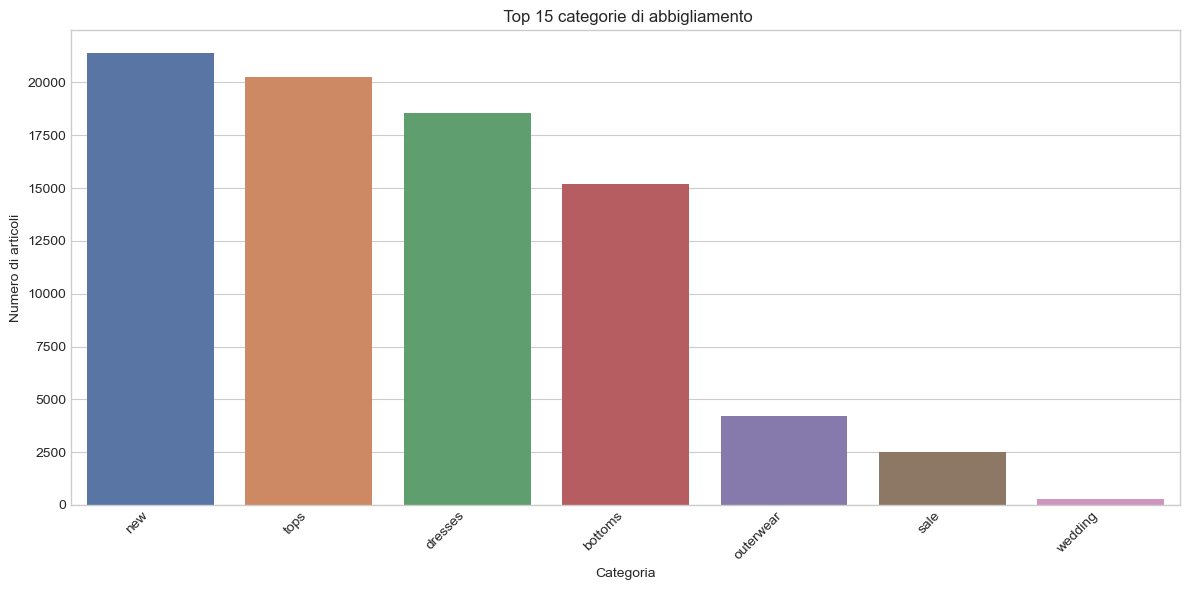


 Categorie più frequenti:
category
new          21395
tops         20271
dresses      18535
bottoms      15211
outerwear     4205
sale          2521
wedding        275
Name: count, dtype: int64


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

"""
Analisi delle Categorie di Abbigliamento

Questo script fa parte dell'analisi esplorativa preliminare per la creazione 
di un e-commerce di abbigliamento second-hand. In particolare, analizza la distribuzione 
della variabile "category", che rappresenta le principali tipologie di capi nel dataset.

Funzionamento:
1. Calcola la frequenza di ogni categoria di abbigliamento.
2. Visualizza graficamente le 15 categorie più frequenti tramite un grafico a barre.
3. Stampa le stesse categorie in forma tabellare per un confronto immediato.

Obiettivo:
Identificare i capi d’abbigliamento più rappresentati nel database per supportare
decisioni strategiche sull’assortimento iniziale dell’e-commerce.

Autore: Giuseppe Russo
Ultima modifica: 11/06/2025
"""

df = df_cleaned
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Visualizzazione
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.head(15).index, 
            y=category_counts.head(15).values, 
            hue=category_counts.head(15).index,
            palette='deep',
            legend=False)
plt.title(" Top 15 categorie di abbigliamento")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Numero di articoli")
plt.xlabel("Categoria")
plt.tight_layout()
plt.show()

print("\n Categorie più frequenti:")
print(category_counts.head(15))

Adesso è interessante valutare a livello assoluto quali sono le taglie più acquistate, 
e quali sono le combinazioni di categoria/taglia più acquistate.

In [194]:
def converti_taglie_usa_italia(size):
    """
    Converte le taglie statunitensi in taglie italiane semplificate.
    
    Operazioni:
    - Accoppia ogni taglia dispari con la pari adiacente (es. 5 → '4-5', 4 → '4-5').
    - Converte ogni gruppo nella taglia italiana corrispondente (media del gruppo + 36),
      restituendo un solo numero pari (es. '4-5' → 40, '12-13' → 48).
    
    Parametri:
    - size: intero (taglia americana)
    
    Restituisce:
    - intero (taglia italiana approssimata, es. 40), oppure 'rare' per taglie anomale
    """
    
    # Raggruppamento pari-dispari
    if size % 2 == 0:
        group = (size, size + 1)
    else:
        group = (size - 1, size)

    # Conversione in taglia italiana (media + 36, arrotondata al pari più vicino)
    italian_size = round(((group[0] + group[1]) / 2) + 36)

    # Arrotondamento al pari più vicino (opzionale, per coerenza visiva)
    if italian_size % 2 != 0:
        italian_size += 1

    return italian_size

df['size_it'] = df['size'].apply(converti_taglie_usa_italia)
print("Colonne presenti:", df.columns.tolist())

Colonne presenti: ['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size', 'shoe width', 'review_summary', 'review_text', 'size_it']


 Distribuzione taglie italiane:
size_it
44    18547
48    17737
40    14671
56     7457
50     7222
62     5723
68     3638
36     1806
46     1700
42     1549
74     1454
54      248
38      235
52      234
60      126
66       66
Name: count, dtype: int64
Valori mancanti: 0


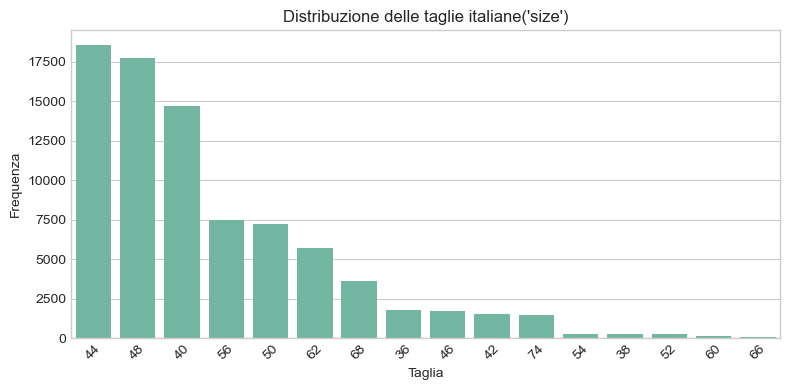

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

"""
Analisi della variabile di taglia

Questo blocco esamina la variabile 'size': 
1. Calcola la distribuzione dei valori unici.
2. Mostra un conteggio dei valori con un grafico a barre ordinato.
3. Include informazioni su valori mancanti.

Note:
- La palette Seaborn è scelta per ottimizzare la leggibilità.

Autore: Giuseppe Russo  
Ultima modifica: 11/06/2025
"""
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')  # Palette chiara, leggibile

print(" Distribuzione taglie italiane:")
print(df['size_it'].value_counts(dropna=False))
print("Valori mancanti:", df['size_it'].isnull().sum())
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='size_it', order=df['size_it'].value_counts().index)
plt.title("Distribuzione delle taglie italiane('size')")
plt.xlabel("Taglia")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


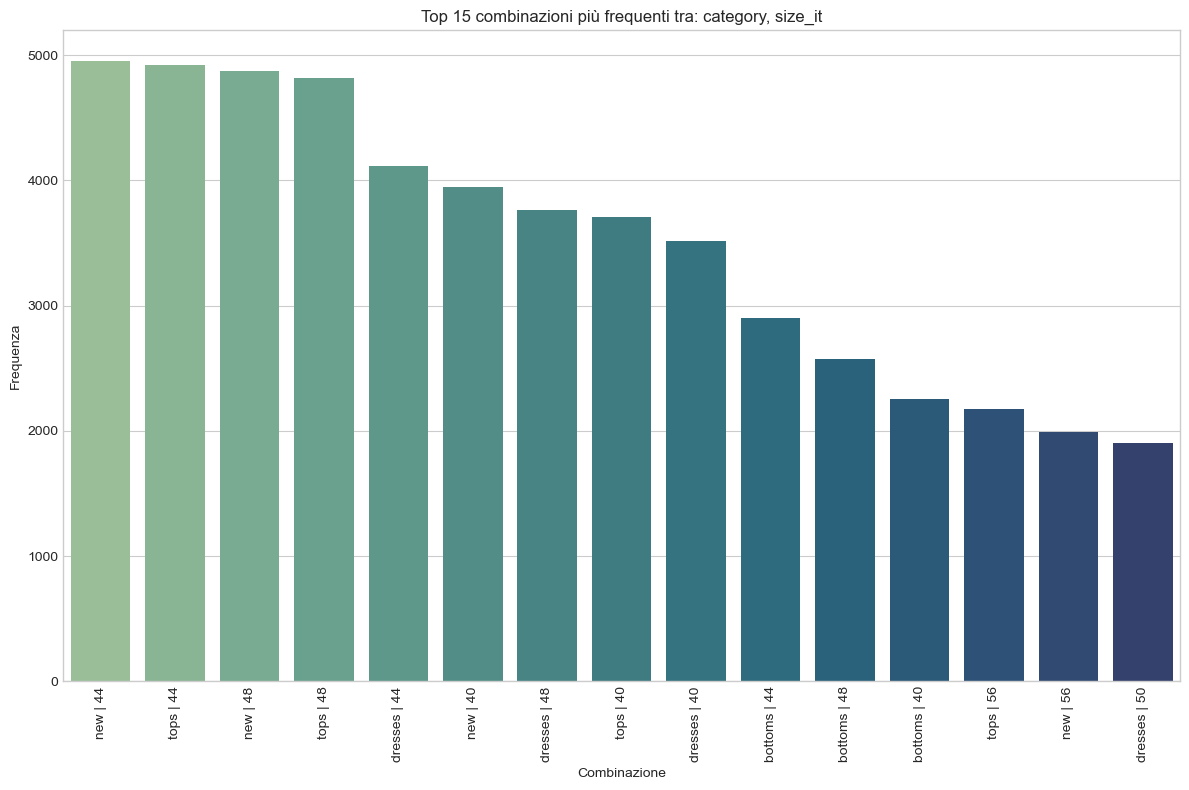

Le minori combinazioni e frequenze:



category  size_it  count
70       sale       74     39
71        new       52     32
72  outerwear       74     27
73        new       38     23
74        new       60     22
75       sale       42     22
76        new       66     19
77    wedding       50     19
78    wedding       68     16
79       sale       46     12
80       tops       42     12
81       tops       46      7
82       sale       38      6
83    wedding       74      5
84    wedding       46      3
85       sale       54      3
86    wedding       60      2
87    bottoms       54      2
88    wedding       38      1
89    wedding       36      1
90       tops       66      1
91    wedding       54      1
92    bottoms       60      1
93    wedding       66      1
94       sale       52      1

(95, 3)


In [196]:
def most_common_combinations(df, cols, top_n=15):
    """
    Mostra le combinazioni più frequenti tra colonne specificate in un DataFrame.

    Args:
        df (pd.DataFrame): Il DataFrame contenente i dati.
        cols (list): Lista di nomi di colonne da combinare (es. ['category', 'size_it', 'fit', 'length']).
        top_n (int): Numero di combinazioni più frequenti da visualizzare.

    Returns:
        pd.DataFrame: DataFrame con le combinazioni e la loro frequenza.
    """
    combo_counts = df[cols].dropna().value_counts().reset_index(name='count')
    combo_counts.columns = cols + ['count']

    plt.figure(figsize=(12, 8))
    sns.barplot(data=combo_counts.head(top_n), y='count', 
                x=combo_counts.head(top_n)[cols].apply(lambda row: ' | '.join(row.values.astype(str)), axis=1),
                hue=combo_counts.head(top_n)[cols].apply(lambda row: ' | '.join(row.values.astype(str)), axis=1),
                palette='crest', legend=False)

    plt.xticks(rotation=90)
    plt.title(f'Top {top_n} combinazioni più frequenti tra: {", ".join(cols)}')
    plt.xlabel('Combinazione')
    plt.ylabel('Frequenza')
    plt.tight_layout()
    plt.show()

    # Stampa completa della tabella con tutte le combinazioni
    print("Le minori combinazioni e frequenze:\n")
    display(combo_counts.tail(25))
    print(combo_counts.shape)

    return combo_counts

top_combos = most_common_combinations(df, ['category', 'size_it'])

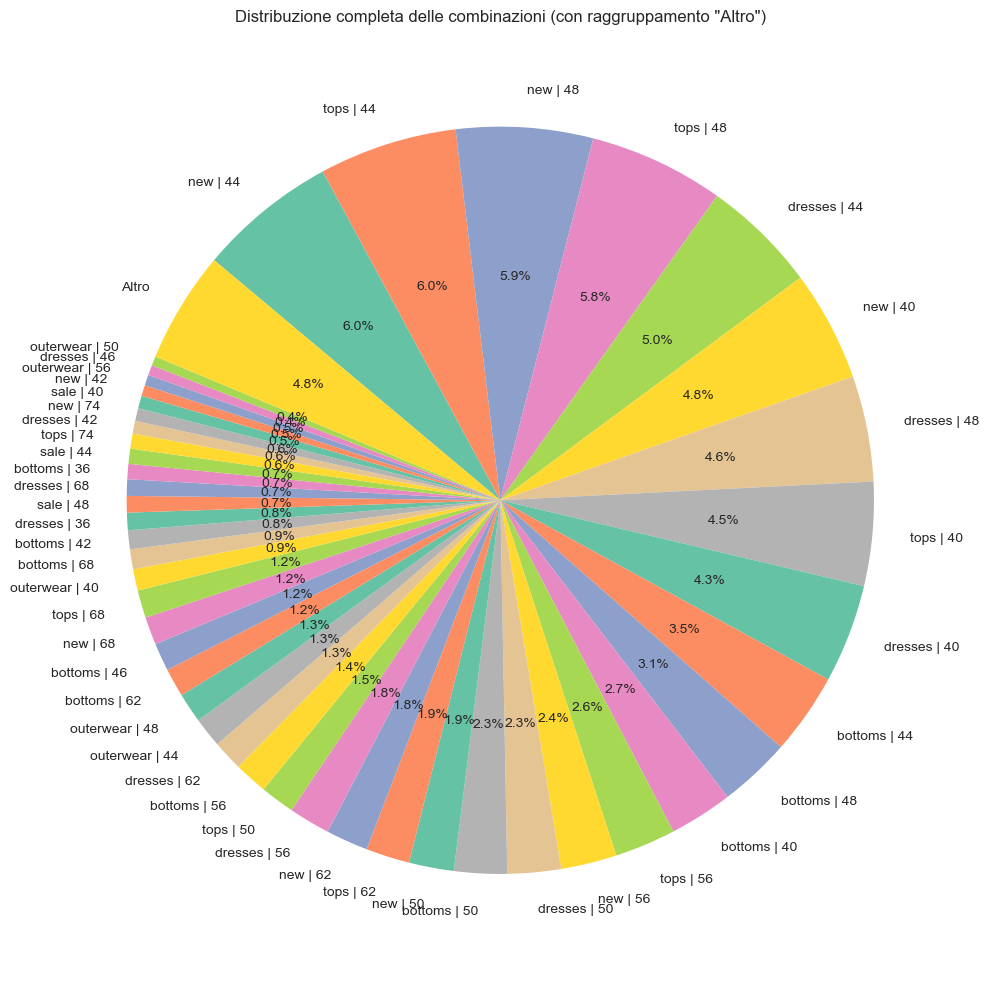

In [173]:
def pie_chart_all_combinations(df, cols, max_label_len, threshold_pct):
    """
    Visualizza un diagramma a torta con la distribuzione di tutte le combinazioni 
    di valori tra le colonne specificate in un DataFrame, raggruppando in 'Altro' 
    tutte le combinazioni con percentuale inferiore a threshold_pct.

    Args:
        df (pd.DataFrame): Il DataFrame contenente i dati.
        cols (list): Lista di colonne da combinare per analizzare le frequenze.
        max_label_len (int): Lunghezza massima delle etichette nel grafico per evitare sovrapposizioni.
        threshold_pct (float): Soglia percentuale (espressa in %) sotto la quale le combinazioni vengono raggruppate in 'Altro'.

    Funzionamento:
        - Calcola la frequenza di tutte le combinazioni uniche tra le colonne indicate.
        - Calcola la percentuale di ciascuna combinazione sul totale.
        - Raggruppa tutte le combinazioni con percentuale < threshold_pct nella categoria 'Altro'.
        - Crea etichette accorciate per rendere leggibile il grafico.
        - Visualizza un grafico a torta con percentuali e etichette abbreviate.

    Autore: Giuseppe Russo
    Ultima modifica: 11/06/2025
    """

    combo_counts = df[cols].dropna().value_counts().reset_index(name='count')
    combo_counts.columns = cols + ['count']

    total = combo_counts['count'].sum()
    combo_counts['pct'] = 100 * combo_counts['count'] / total

    # Separiamo combinazioni sotto soglia e sopra soglia
    above_threshold = combo_counts[combo_counts['pct'] >= threshold_pct].copy()
    below_threshold = combo_counts[combo_counts['pct'] < threshold_pct].copy()

    # Sommiamo il conteggio delle combinazioni sotto soglia e creiamo una riga "Altro"
    other_count = below_threshold['count'].sum()
    other_pct = below_threshold['pct'].sum()

    # Crea etichetta combinazione
    above_threshold['combo_label'] = above_threshold[cols].astype(str).agg(' | '.join, axis=1)

    # Funzione per abbreviare le etichette troppo lunghe
    def abbreviate_label(label):
        return label if len(label) <= max_label_len else label[:max_label_len-3] + "..."

    above_threshold['combo_label_abbr'] = above_threshold['combo_label'].apply(abbreviate_label)

    # Crea un DataFrame per la riga 'Altro'
    other_row = pd.DataFrame({
        **{col: [None] for col in cols},
        'count': [other_count],
        'pct': [other_pct],
        'combo_label': ['Altro'],
        'combo_label_abbr': ['Altro']
    })

    # Unisci il dataframe sopra soglia con la riga 'Altro'
    above_threshold = pd.concat([above_threshold, other_row], ignore_index=True)

    plt.figure(figsize=(10, 10))
    plt.pie(
        above_threshold['count'], 
        labels=above_threshold['combo_label_abbr'], 
        autopct='%1.1f%%', 
        startangle=140,
        counterclock=False,
    )

    plt.title('Distribuzione completa delle combinazioni (con raggruppamento "Altro")')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

pie_chart_all_combinations(df, ['category', 'size_it'], 20, 0.4)

Media frequenze combinazioni: 867.51
Deviazione standard frequenze combinazioni: 1297.04


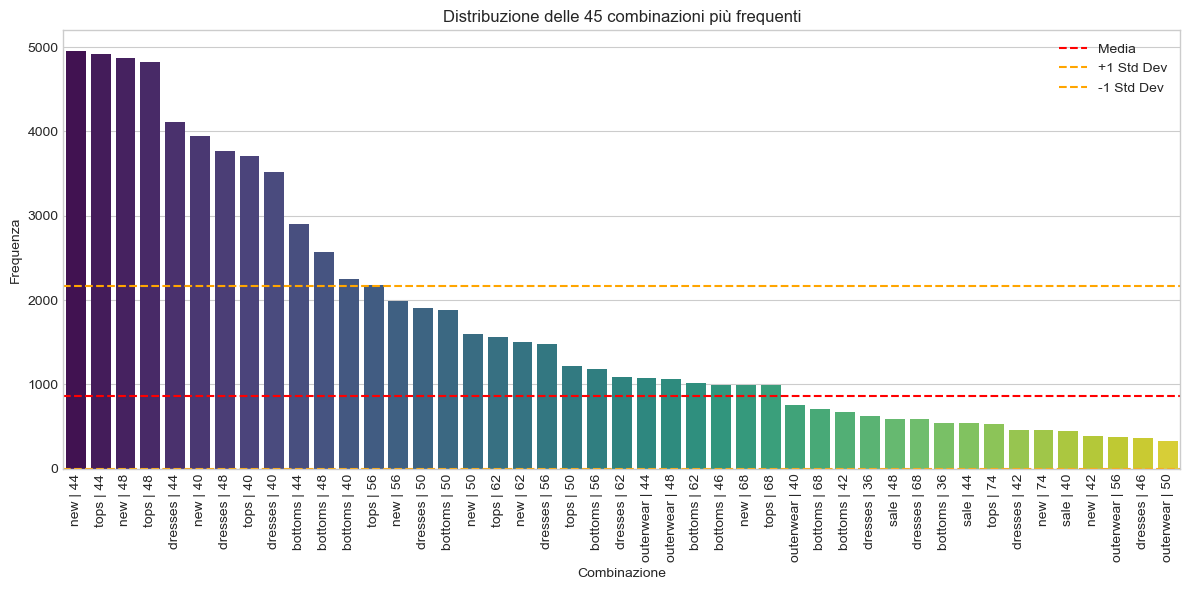

In [197]:
def plot_combination_std(df, cols, top_n):
    """
    Calcola e visualizza la deviazione standard delle frequenze delle combinazioni tra colonne specificate.

    Args:
        df (pd.DataFrame): Il DataFrame contenente i dati.
        cols (list): Le colonne da combinare per analizzare la frequenza (es. ['category', 'size']).
        top_n (int): Numero massimo di combinazioni da visualizzare nel grafico.

    Returns:
        float: La deviazione standard delle frequenze delle combinazioni.
    """
    # Calcola le frequenze delle combinazioni
    combo_counts = df[cols].dropna().value_counts().reset_index(name='count')
    combo_counts['combo_label'] = combo_counts[cols].astype(str).agg(' | '.join, axis=1)

    # Calcola media e deviazione standard
    mean_count = combo_counts['count'].mean()
    std_count = combo_counts['count'].std()

    print(f"Media frequenze combinazioni: {mean_count:.2f}")
    print(f"Deviazione standard frequenze combinazioni: {std_count:.2f}")

    # Grafico a barre
    plt.figure(figsize=(12, 6))
    sns.barplot(data=combo_counts.head(top_n),
        x='combo_label', y='count', hue='combo_label',
        palette='viridis', legend=False
    )
    plt.xticks(rotation=90)
    plt.axhline(mean_count, color='red', linestyle='--', label='Media')
    plt.axhline(mean_count + std_count, color='orange', linestyle='--', label='+1 Std Dev')
    plt.axhline(max(mean_count - std_count, 0), color='orange', linestyle='--', label='-1 Std Dev')

    plt.title(f'Distribuzione delle {top_n} combinazioni più frequenti')
    plt.xlabel('Combinazione')
    plt.ylabel('Frequenza')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return std_count

std_result = plot_combination_std(df, ['category', 'size_it'], 45)


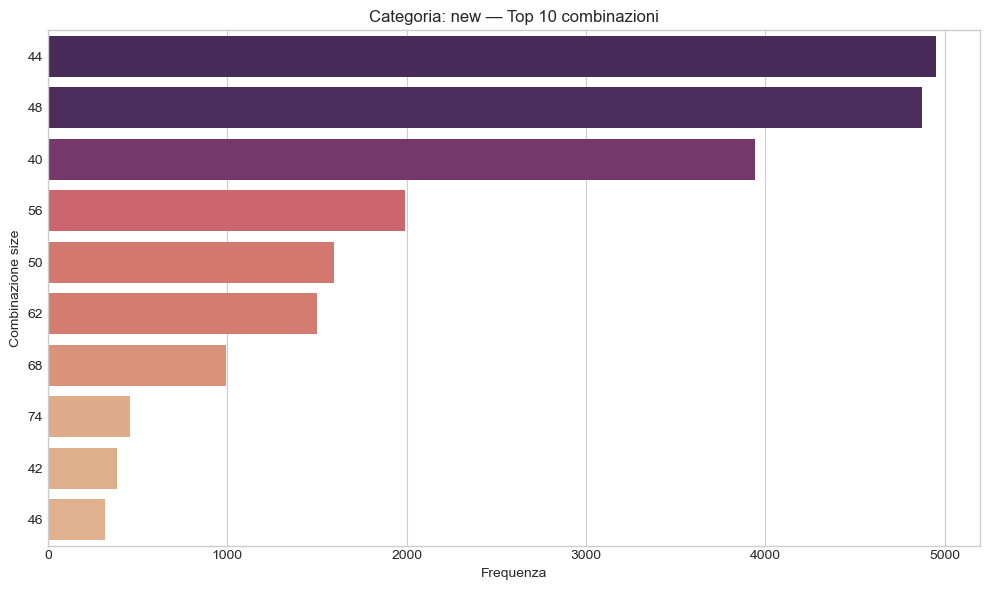

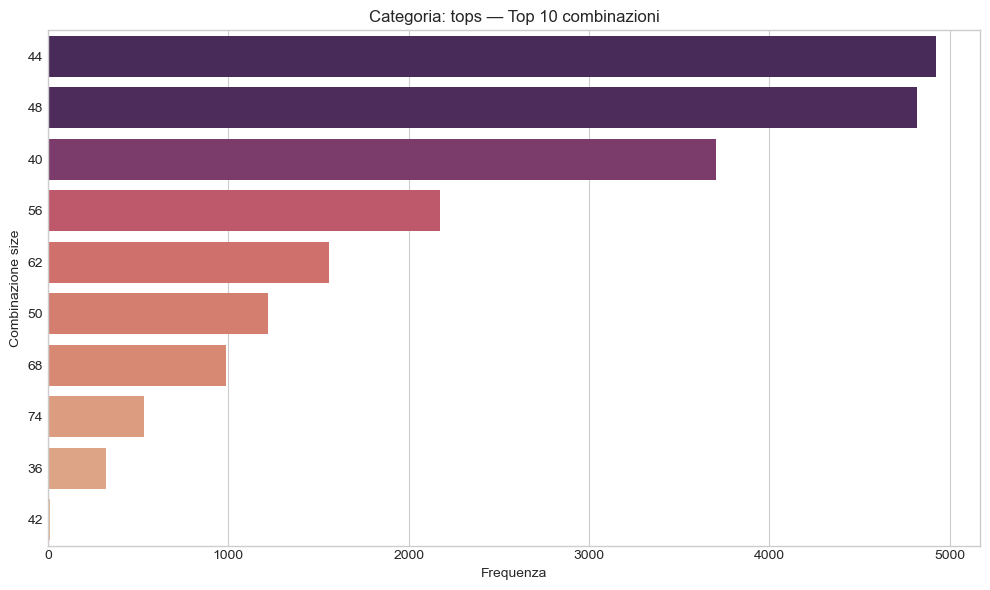

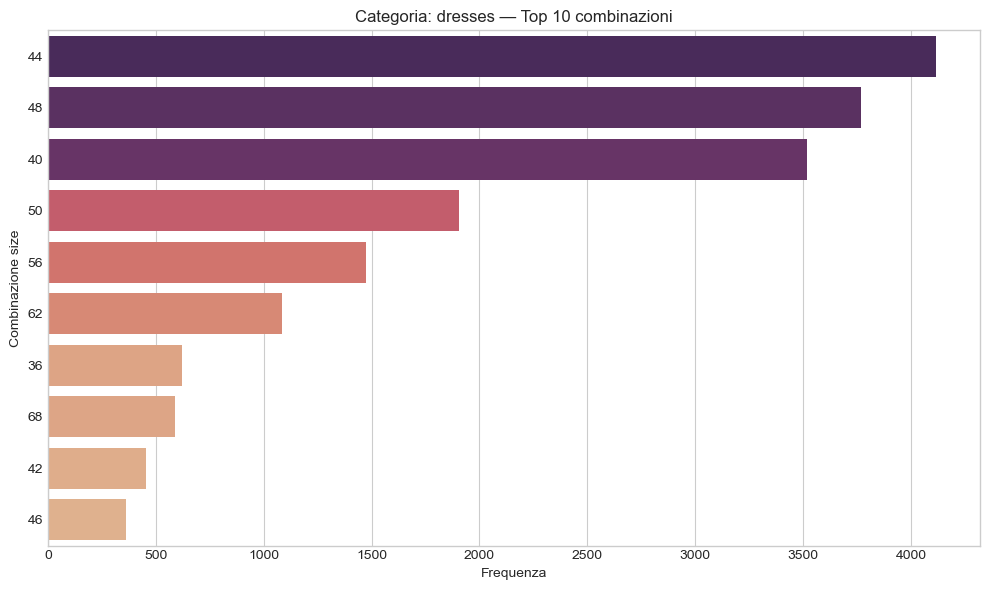

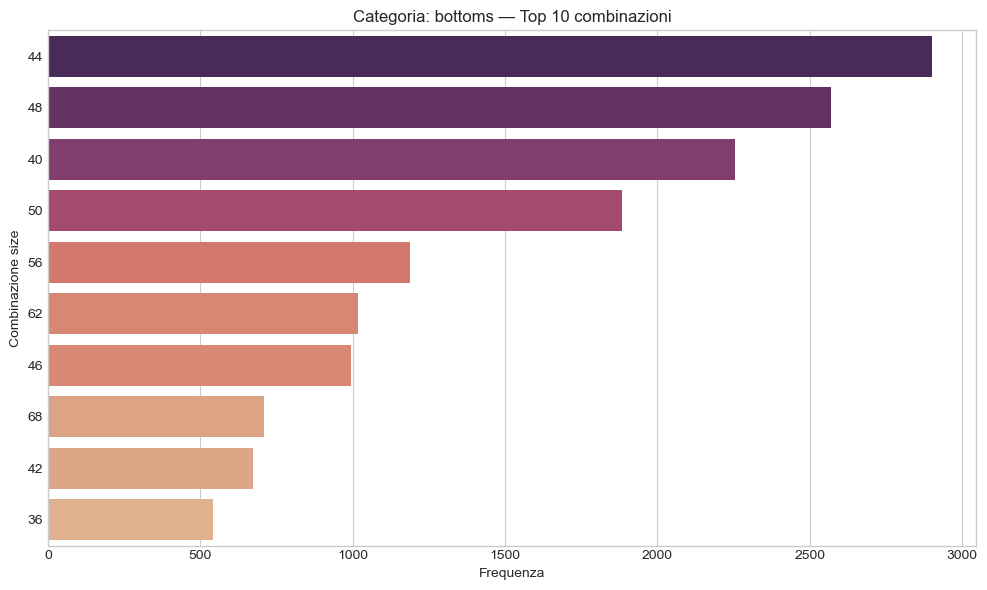

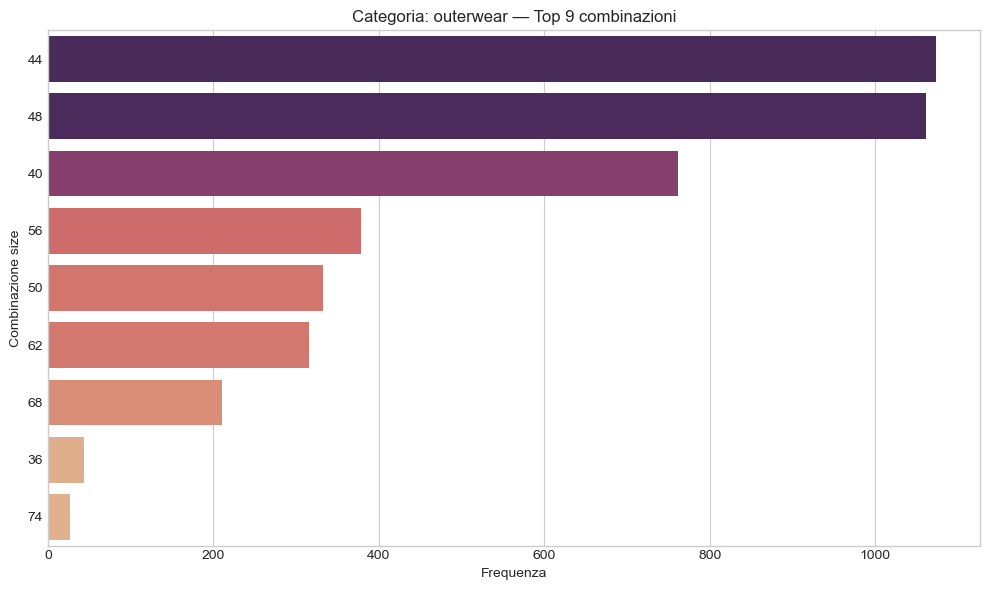

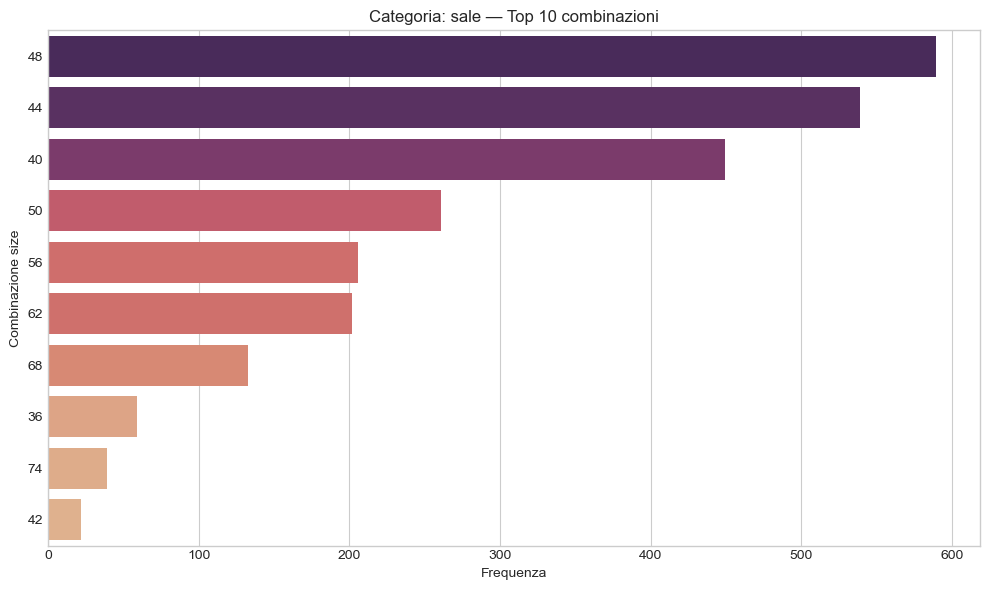

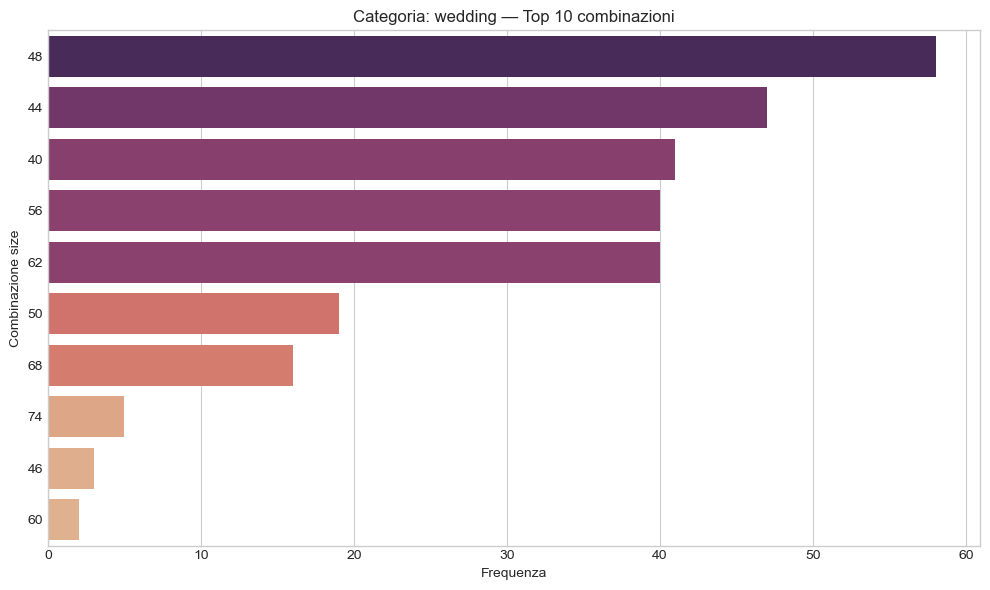

In [198]:
def show_all_combinations_by_category(combo_counts, category_col='category', show_table=False, top_n=None):
    """
    Mostra grafici delle combinazioni di size per ogni categoria, ordinate per frequenza.
    L'ordine dei grafici è anche basato sulla frequenza di vendite: dalla categoria che ha venduto più articoli
    a livello assoluto a quella che ne ha venduti meno.

    Args:
        combo_counts (pd.DataFrame): DataFrame con category, size, fit, length e count.
        category_col (str): Nome della colonna categoria.
        show_table (bool): Se True, mostra anche le tabelle.
        top_n (int or None): Numero massimo di combinazioni da mostrare per categoria (None = tutte).

    Returns:
        dict: Dizionario con una entry per ogni categoria e il relativo DataFrame ordinato.
    """
    category_groups = {}
    category_order = df[category_col].value_counts().index.tolist()
    unique_categories = [cat for cat in category_order if cat in combo_counts[category_col].values]

    for cat in unique_categories:
        filtered = (
            combo_counts[combo_counts[category_col] == cat]
            .sort_values(by='count', ascending=False)
            .reset_index(drop=True)
        )

        filtered_plot = filtered.head(top_n).copy() if top_n else filtered.copy()

        # Crea colonna 'combo' per il grafico
        filtered_plot['combo'] = (
            filtered_plot[['size_it']]
            .astype(str)
            .agg(' | '.join, axis=1)
        )

        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=filtered_plot, x='count', y='combo', hue='count', palette='flare', legend=False)
        plt.title(f"Categoria: {cat} — Top {len(filtered_plot)} combinazioni")
        plt.xlabel('Frequenza')
        plt.ylabel('Combinazione size')
        plt.tight_layout()
        plt.show()

        if show_table:
            print(f"\n🔹 Categoria: {cat} — {len(filtered)} combinazioni totali")
            display(filtered)

        category_groups[cat] = filtered

    return category_groups

combo_counts_all = df.groupby(['category', 'size_it']).size().reset_index(name='count')
category_combinations = show_all_combinations_by_category(combo_counts_all, show_table=False, top_n=10)

Le categorie:
- in questo dataset c'è una categoria di vestiti assegnati come "nuovi" quindi verosimilmente "mai indossati" 
  oppure ancora con il cartellino
- ci sono vestiti assegnati come "in saldo"
- c'è la categoria di abiti da matrimonio
- le quattro categorie vere e proprie sono i capispalla "outerwear", gli abiti interi "dresses",
  tutto quello che riguarda solo le gambe "bottoms", quello che riguarda il busto "tops".

Ci sono 3 taglie che dominano nettamente sulle altre, mentre le combinazioni mostrano una deviazione standard altissima, 
con il gruppetto delle prime 10 che prende quasi il 50% delle vendite totali, ma una buona parte di tutte le possibili 
combinazioni vengono rappresentante, seppur molte in maniera davvero minima.

Adesso può iniziare l'analisi delle caratteristiche fisiche delle utenti, sia a livello assoluto 
che in combinazione tra loro. Prima di tutto, per una visualizzazione più comprensibile, verranno 
convertite tutte in misure italiane.

In [199]:
import re
import pandas as pd

def parse_height_to_cm(height_str):
    if pd.isna(height_str):
        return None
    
    s = str(height_str).lower().strip()
    
    # Pattern che cerca piedi e pollici (opzionali)
    pattern = r'(?:(\d+)\s*(?:ft|feet)?)?\s*(?:(\d+)\s*(?:in|inch|inches)?)?'
    match = re.match(pattern, s)
    
    if match:
        feet = match.group(1)
        inches = match.group(2)
        feet = int(feet) if feet is not None else 0
        inches = int(inches) if inches is not None else 0
        
        total_inches = feet * 12 + inches
        if total_inches > 0:
            return round(total_inches * 2.54, 1)  # cm con 1 decimale
    
    # Prova a convertire direttamente in float (se è un numero)
    try:
        return float(s)
    except:
        return None

df['height_cm'] = df['height'].apply(parse_height_to_cm)
print(df['height_cm'].value_counts(dropna=False))


height_cm
162.6    11876
167.6    11828
165.1     9369
170.2     9123
160.0     8643
157.5     7664
172.7     6393
175.3     4548
154.9     3561
177.8     2695
152.4     2236
180.3     1386
NaN       1105
149.9      729
182.9      626
147.3      241
185.4      144
188.0       78
144.8       48
241.3       22
91.4        16
190.5       12
142.2       11
195.6       10
198.1        8
193.0        7
134.6        5
139.7        5
101.6        3
127.0        3
99.1         2
231.1        2
203.2        2
228.6        2
106.7        2
132.1        2
226.1        1
221.0        1
119.4        1
200.7        1
96.5         1
137.2        1
Name: count, dtype: int64


In [201]:
"""
Converte le colonne 'waist', 'bust', 'hips' e 'bra size' da pollici a centimetri,
creando nuove colonne 'hips_cm' e 'bra_size_cm' nel DataFrame senza
modificare le originali.

Restituisce:
- Il DataFrame originale con due nuove colonne: 'waist_cm', 'bust_cm', 'hips_cm' e 'bra_size_cm'.
"""
df['waist_cm'] = pd.to_numeric(df['waist'], errors='coerce') * 2.54
df['bust_cm'] = pd.to_numeric(df['bust'], errors='coerce') * 2.54
df['hips_cm'] = pd.to_numeric(df['hips'], errors='coerce') * 2.54
df['bra_size_cm'] = pd.to_numeric(df['bra size'], errors='coerce') * 2.54
print("Colonne presenti:", df.columns.tolist())

Colonne presenti: ['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size', 'shoe width', 'review_summary', 'review_text', 'size_it', 'height_cm', 'waist_cm', 'bust_cm', 'hips_cm', 'bra_size_cm']



 Variabile: height_cm
Valori mancanti: 1105


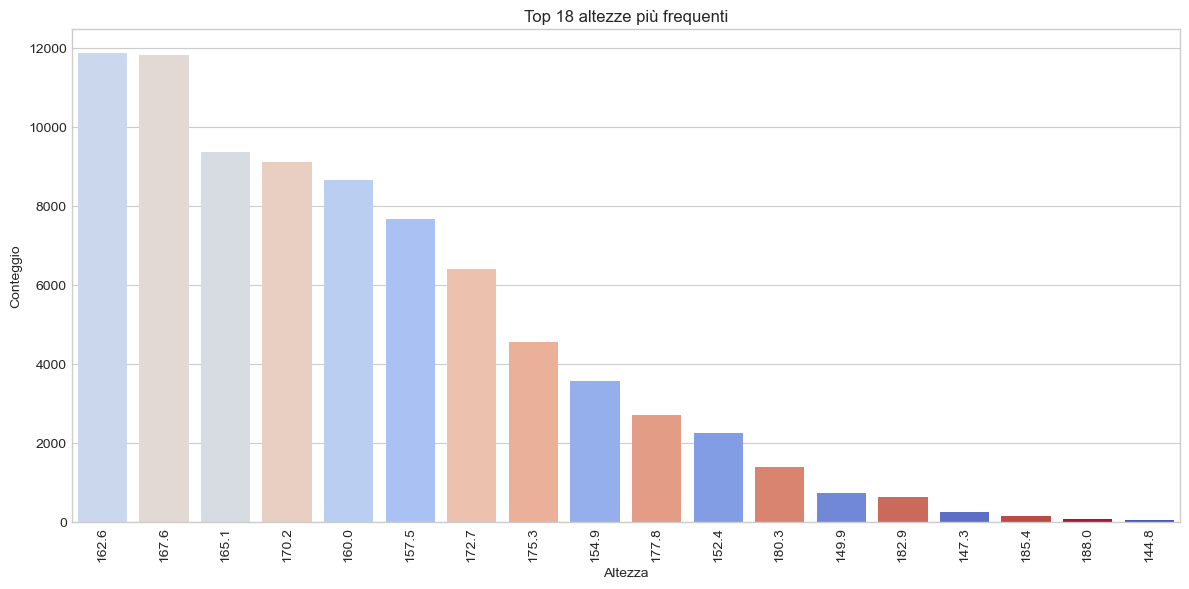


 Variabile: waist_cm
Valori mancanti: 79532


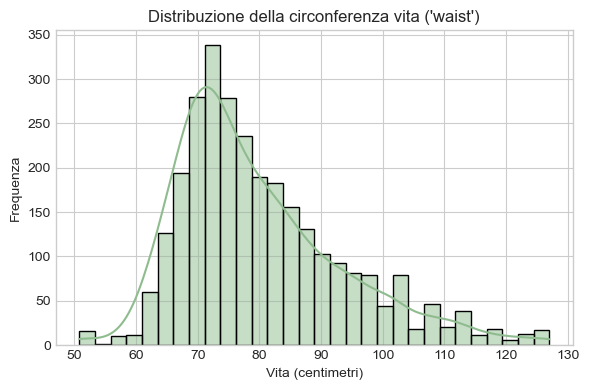


 Variabile: bust_cm
Valori mancanti: 70618


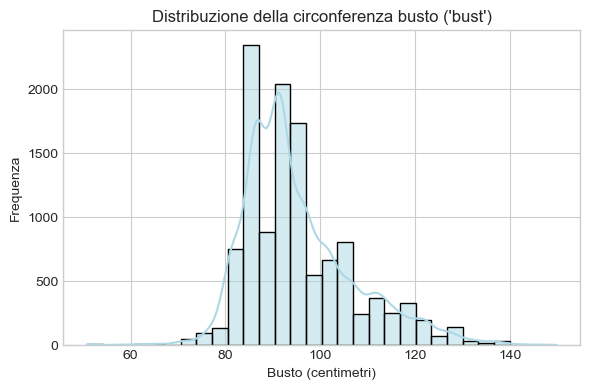


 Variabile: hips_cm
Valori mancanti: 26609


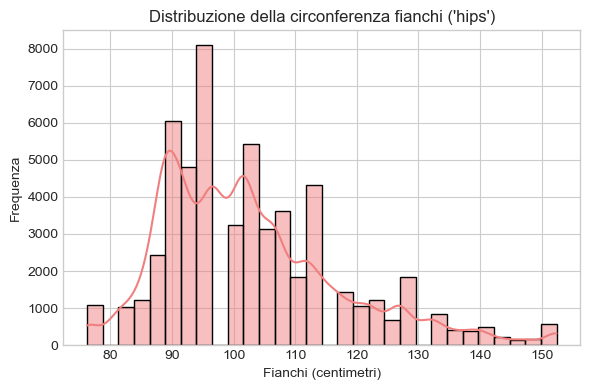


 Variabile: bra_size_cm
Valori mancanti: 5992


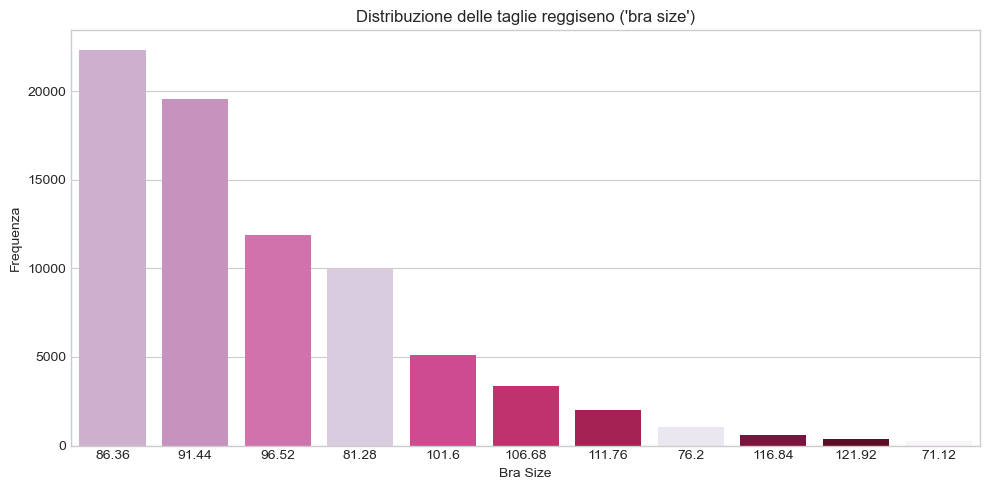


 Variabile: cup size
Valori mancanti: 6228


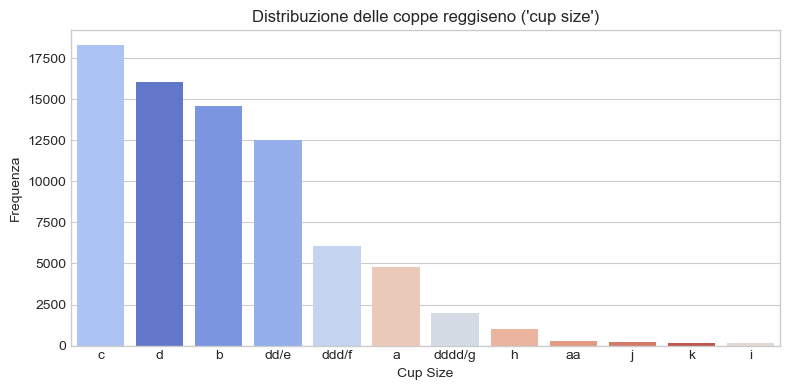

In [202]:
"""
Analisi delle variabili fisiche delle utenti

Questo blocco esplora sei variabili fisiche fondamentali fornite dalle utenti nel dataset.
Si tratta di misure corporee utili a comprendere meglio le caratteristiche antropometriche del campione,
preparando così il terreno per analisi successive (es. clustering o raccomandazioni di taglie):

- `height`: altezza in pollici. Il grafico mostra le 20 altezze più frequenti per evitare dispersione.
- `waist`: circonferenza vita (in centimetri), visualizzata tramite istogramma e curva di densità.
- `bust`: circonferenza busto (in centimetri), rappresentata come distribuzione continua.
- `hips`: circonferenza fianchi (in centimetri), anch’essa mostrata con istogramma + KDE.
- `bra size`: taglia del reggiseno numerica, visualizzata con countplot ordinato per frequenza.
- `cup size`: coppa del reggiseno (es. A, B, C, D...), mostrata con countplot ordinato.

Per ciascuna variabile:
1. Mostra i valori mancanti.
2. Visualizza la distribuzione (istogramma per variabili numeriche, conteggio per quella categorica).
3. Aiuta a identificare outlier, errori o pattern utili per futuri modelli predittivi.

Autore: Giuseppe Russo  
Ultima modifica: 12/06/2025
"""

# --- Analisi 'height_cm'
print("\n Variabile: height_cm")
print("Valori mancanti:", df['height_cm'].isnull().sum())
top_heights = df['height_cm'].value_counts().nlargest(18).index

plt.figure(figsize=(12,6))
sns.countplot(x='height_cm', data=df[df['height_cm'].isin(top_heights)], order=top_heights, 
              hue='height_cm', palette='coolwarm', legend=False)
plt.xticks(rotation=90, fontsize=10)
plt.title('Top 18 altezze più frequenti')
plt.xlabel('Altezza')
plt.ylabel('Conteggio')
plt.tight_layout()
plt.show()

# --- Analisi 'waist_cm'
print("\n Variabile: waist_cm")
print("Valori mancanti:", df['waist_cm'].isnull().sum())
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='waist_cm', bins=30, kde=True, color='darkseagreen')
plt.title("Distribuzione della circonferenza vita ('waist')")
plt.xlabel("Vita (centimetri)")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

# --- Analisi 'bust_cm'
df['bust_cm'] = pd.to_numeric(df['bust_cm'], errors='coerce')
print("\n Variabile: bust_cm")
print("Valori mancanti:", df['bust_cm'].isnull().sum())
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='bust_cm', bins=30, kde=True, color='lightblue')
plt.title("Distribuzione della circonferenza busto ('bust')")
plt.xlabel("Busto (centimetri)")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

# --- Analisi 'hips_cm'
print("\n Variabile: hips_cm")
print("Valori mancanti:", df['hips_cm'].isnull().sum())
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='hips_cm', bins=30, kde=True, color='lightcoral')
plt.title("Distribuzione della circonferenza fianchi ('hips')")
plt.xlabel("Fianchi (centimetri)")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

# --- Analisi 'bra_size_cm'
print("\n Variabile: bra_size_cm")
print("Valori mancanti:", df['bra_size_cm'].isnull().sum())
plt.figure(figsize=(10, 5))
order = df['bra_size_cm'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, x='bra_size_cm', order=order, palette='PuRd', hue='bra size', legend=False)
plt.title("Distribuzione delle taglie reggiseno ('bra size')")
plt.xlabel("Bra Size")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

# --- Analisi 'cup size'
print("\n Variabile: cup size")
print("Valori mancanti:", df['cup size'].isnull().sum())
plt.figure(figsize=(8, 4))
order = df['cup size'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, x='cup size', hue='cup size', order=order, palette='coolwarm', legend=False)
plt.title("Distribuzione delle coppe reggiseno ('cup size')")
plt.xlabel("Cup Size")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

Adesso può iniziare il clustering sugli utenti; innazitutto è necessario trasformare le coppe reggiseno 
in valori numerici indispensabili per il processo, e stessa cosa le misure dell'altezza, che in questo momento 
sono stringhe illeggibili.

In [204]:
"""
Trasformazione dei valori delle coppe reggiseno

Questo blocco trasforma i valori della colonna 'cup size' in formato numerico,
adatto al clustering. La trasformazione è robusta contro variazioni di scrittura (es. 'DD', 'dd/e', 'F', 'ddd/f').
Mostra anche i valori non riconosciuti.
"""

# Conversione in minuscolo e strip spazi
df['cup size_clean'] = df['cup size'].astype(str).str.strip().str.lower()

# Mappatura espansa
cup_mapping = {
    'aa': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4,
    'dd': 5, 'dd/e': 5, 'e': 5,
    'ddd': 6, 'ddd/f': 6, 'f': 6,
    'dddd': 7, 'dddd/g': 7, 'g': 7,
    'h': 8, 'i': 9, 'j': 10, 'k': 11
}

# Applica la mappatura
df['cup size_num'] = df['cup size_clean'].map(cup_mapping)

# Mostra valore conteggio validi
print("Valori trasformati (cup size → numero):")
display(df['cup size_num'].value_counts().sort_index())

# Verifica valori non mappati
unmapped = df[df['cup size_num'].isnull()]['cup size_clean'].value_counts()
print("\nValori non riconosciuti in 'cup size':")
display(unmapped.head(15))

Valori trasformati (cup size → numero):


cup size_num
0.0       295
1.0      4777
2.0     14571
3.0     18270
4.0     16069
5.0     12508
6.0      6086
7.0      2002
8.0      1037
9.0       186
10.0      197
11.0      187
Name: count, dtype: int64


Valori non riconosciuti in 'cup size':


cup size_clean
nan    6228
Name: count, dtype: int64

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
"""
Prepara una copia del DataFrame per il clustering basato su misure corporee,
rimuovendo i valori mancanti, normalizzando i dati e applicando KMeans per
identificare 8 gruppi distinti.

- Utilizza solo le colonne 'height_cm', 'hips', 'bra size', 'cup size_num'
- Lavora su una copia del DataFrame per preservare l’originale
- Elimina le righe con valori mancanti
- Normalizza le colonne per una corretta applicazione del KMeans
- Esegue il clustering con 8 gruppi
- Mostra la distribuzione finale dei cluster

Utile per esplorare pattern e somiglianze tra utenti con misure corporee simili.
"""
selected_cols = ['height_cm', 'hips_cm', 'bra_size_cm', 'cup size_num']

# Crea una copia del DataFrame solo con le colonne selezionate e salva l'indice originale
df_clustering = df[selected_cols].copy()
df_clustering['row_id'] = df['row_id'].copy()

# Elimina le righe con NaN
df_clustering = df_clustering.dropna()

print("[INFO] Campioni rimasti dopo rimozione NaN:", len(df_clustering))

# Definisci le colonne numeriche (esplicitamente, evita errori)
numeric_cols = ['height_cm', 'hips_cm', 'bra_size_cm', 'cup size_num']

# Normalizzazione
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_clustering[numeric_cols]), 
    columns=numeric_cols
)

# Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(df_scaled)

# Mostra la distribuzione
print(df_clustering['cluster'].value_counts())

[INFO] Campioni rimasti dopo rimozione NaN: 54093
cluster
1    8434
3    7323
8    6529
4    6378
6    6082
5    5159
2    4467
7    4398
0    3311
9    2012
Name: count, dtype: int64


In [210]:
"""
Unisce al DataFrame `df_clustering` tutte le informazioni originali relative agli item e agli utenti,
utilizzando la colonna `row_id` per collegarsi all'indice originale del DataFrame `df`.

Aggiunge colonne come:
- Misure convertite ('waist_cm', 'bust_cm'),
- Attributi dell'articolo ('size_it', 'category', 'quality', 'fit', 'length'),
- Informazioni sull’utente ('user_id', 'user_name', 'height', 'shoe size', 'shoe width'),
- Testi delle recensioni ('review_summary', 'review_text').

Risultato: un DataFrame `df_clustering` arricchito, utile per analisi descrittive e di cluster.
"""

df_clustering = df_clustering.merge(df[['item_id', 'waist_cm', 'size_it', 'quality', 'cup size', 'category', 'bust_cm', 'height', 
                                        'user_name', 'length', 'fit', 'user_id', 'shoe size', 'shoe width', 
                                        'review_summary', 'review_text']].reset_index(), left_on='row_id', right_on='index', how='left')
display(df_clustering.head(20))
print(df_clustering.columns.tolist())

height_cm  hips_cm  bra_size_cm  cup size_num  row_id  cluster  index  \
0       167.6    96.52        86.36           4.0       0        8      0   
1       157.5    76.20        91.44           2.0       1        6      1   
2       162.6   104.14        91.44           3.0       5        3      5   
3       165.1   106.68        96.52           4.0       7        3      7   
4       177.8   127.00       106.68           4.0       8        7      8   
5       167.6   104.14        91.44           5.0       9        8      9   
6       167.6   124.46       101.60           4.0      10        7     10   
7       162.6   152.40       111.76           6.0      11        0     11   
8       160.0    91.44        86.36           2.0      14        6     14   
9       162.6   127.00       101.60           3.0      15        0     15   
10      157.5   111.76        91.44           4.0      16        3     16   
11      172.7    99.06        91.44           4.0      18        8     18   
12      165.1    88.90        86.36           5.0      19        4     19   
13      152.4    96.52        91.44           5.0      20        4     20   
14      175.3    86.36        86.36           5.0      22        8     22   
15      154.9    81.28        86.36           3.0      23        6     23   
16      167.6    88.90        86.36           3.0      27        1     27   
17      162.6   121.92       111.76           7.0      28        0     28   
18      170.2   132.08       106.68           5.0      29        0     29   
19      175.3   101.60        91.44           2.0      30        5     30   

    item_id  waist_cm  size_it  ...  bust_cm    height           user_name  \
0    123373     73.66       42  ...    91.44   5ft 6in               Emily   
1    123373     78.74       48  ...      NaN   5ft 2in    sydneybraden2001   
2    123373     68.58       46  ...      NaN   5ft 4in         Doreenajane   
3    123373       NaN       46  ...      NaN   5ft 5in           brettloie   
4    123373       NaN       66  ...      NaN  5ft 10in      francescaviola   
5    123373       NaN       48  ...    99.06   5ft 6in        laurenpolzin   
6    123373       NaN       60  ...      NaN   5ft 6in            micorson   
7    123373       NaN       68  ...      NaN   5ft 4in             tera.oh   
8    123373       NaN       38  ...      NaN   5ft 3in            stacy233   
9    123373       NaN       62  ...      NaN   5ft 4in         tamera.cole   
10   123373       NaN       54  ...      NaN   5ft 2in         choircorgis   
11   123373       NaN       50  ...      NaN   5ft 8in               Carol   
12   123373       NaN       44  ...      NaN   5ft 5in                kate   
13   123373       NaN       54  ...      NaN       5ft             aunibe7   
14   123373       NaN       42  ...      NaN   5ft 9in       allison.leahy   
15   123373       NaN       40  ...    86.36   5ft 1in            Michelle   
16   123373       NaN       44  ...    91.44   5ft 6in            mmmjulie   
17   123373       NaN       66  ...      NaN   5ft 4in            danielle   
18   123373       NaN       66  ...      NaN   5ft 7in           Stephanie   
19   123373       NaN       44  ...      NaN   5ft 9in  mcerlean.elizabeth   

           length    fit user_id shoe size shoe width  review_summary  \
0      just right  small  991571       NaN        NaN             NaN   
1      just right  small  587883       NaN        NaN             NaN   
2      just right  small  162012       NaN        NaN             NaN   
3      just right  small   58869       8.5        NaN             NaN   
4      just right  small  279568      11.0       wide             NaN   
5      just right    fit  950172       9.0        NaN             NaN   
6      just right  small  205796       NaN        NaN             NaN   
7      just right  small  422613       NaN        NaN             NaN   
8      just right    fit  510154       NaN        NaN             NaN   
9      just right

['height_cm', 'hips_cm', 'bra_size_cm', 'cup size_num', 'row_id', 'cluster', 'index', 'item_id', 'waist_cm', 'size_it', 'quality', 'cup size', 'category', 'bust_cm', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size', 'shoe width', 'review_summary', 'review_text']


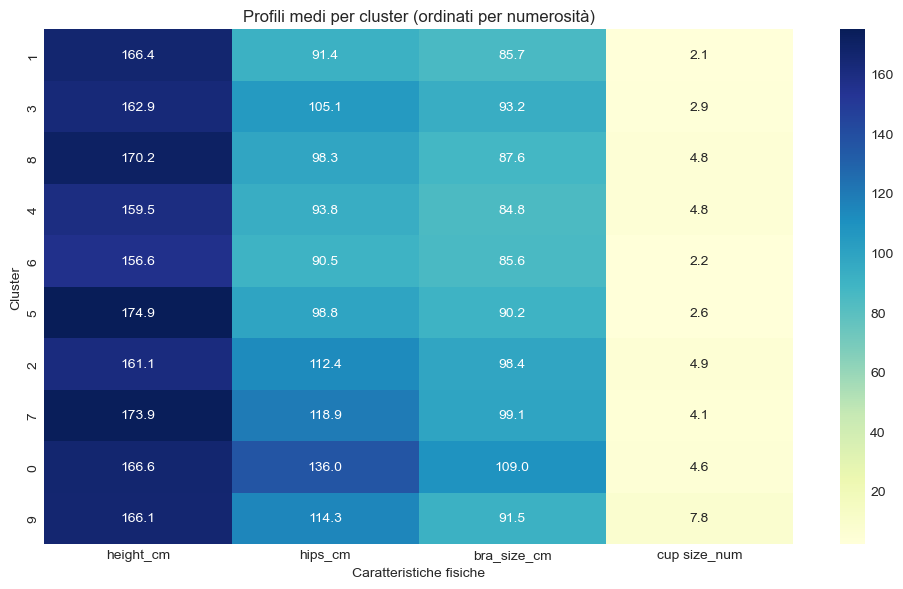

Cluster 1 (8434 donne): altezza media, fianchi snelli, circonferenza sottoseno snella, coppa media (B-C).
Cluster 3 (7323 donne): altezza media, fianchi molto larghi, circonferenza sottoseno media, coppa media (B-C).
Cluster 8 (6529 donne): altezza alta, fianchi larghi, circonferenza sottoseno snella, coppa grande (D-DD).
Cluster 4 (6378 donne): altezza bassa, fianchi nella media, circonferenza sottoseno snella, coppa grande (D-DD).
Cluster 6 (6082 donne): altezza bassa, fianchi snelli, circonferenza sottoseno snella, coppa media (B-C).
Cluster 5 (5159 donne): altezza alta, fianchi larghi, circonferenza sottoseno media, coppa media (B-C).
Cluster 2 (4467 donne): altezza bassa, fianchi molto larghi, circonferenza sottoseno robusta, coppa grande (D-DD).
Cluster 7 (4398 donne): altezza alta, fianchi molto larghi, circonferenza sottoseno robusta, coppa grande (D-DD).
Cluster 0 (3311 donne): altezza media, fianchi molto larghi, circonferenza sottoseno robusta, coppa grande (D-DD).
Cluster 9

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
Analizza i profili fisici medi di ciascun cluster e genera una descrizione testuale interpretabile.

Parte 1: Heatmap dei profili medi
- Calcola la media di quattro caratteristiche fisiche ('height_cm', 'hips_cm', 'bra_size_cm', 'cup size_num')
  per ogni cluster.
- Riordina i cluster in base alla loro numerosità.
- Visualizza i profili medi tramite una heatmap.

Parte 2: Descrizione testuale dei cluster
- Traduce le medie fisiche di ciascun cluster in etichette qualitative leggibili:
  - Altezza (da "molto bassa" a "molto alta")
  - Fianchi (da "molto stretti" a "molto larghi")
  - Circonferenza sottoseno (da "molto snella" a "robusta")
  - Coppa (da "piccola (A-B)" a "molto grande (E+)")
- Crea una descrizione riassuntiva per ogni cluster, indicando anche il numero di utenti.

Output:
- Heatmap dei profili medi per cluster
- Descrizioni testuali stampate a video
"""

#Calcola i centroidi (medie per ogni cluster)
cluster_profiles = df_clustering.groupby('cluster')[['height_cm', 'hips_cm', 'bra_size_cm', 'cup size_num']].mean()

# Calcola il numero di membri per cluster
cluster_sizes = df_clustering['cluster'].value_counts()

ordered_clusters = cluster_sizes.index.tolist()

# Riordina il DataFrame in base alla numerosità dei cluster
cluster_profiles = cluster_profiles.loc[ordered_clusters]

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Profili medi per cluster (ordinati per numerosità)")
plt.ylabel("Cluster")
plt.xlabel("Caratteristiche fisiche")
plt.tight_layout()
plt.show()

def descrizione_cluster(row, cluster_id, size):
    # Altezza
    if row['height_cm'] < 154:
        altezza = "molto bassa"
    if row['height_cm'] < 162:
        altezza = "bassa"
    elif row['height_cm'] < 170:
        altezza = "media"
    elif row['height_cm'] < 180:
        altezza = "alta"
    else:
        altezza = "molto alta"

    # Fianchi
    if row['hips_cm'] < 89:
        fianchi = "molto stretti"
    elif row['hips_cm'] < 93:
        fianchi = "snelli"
    elif row['hips_cm'] < 97:
        fianchi = "nella media"
    elif row['hips_cm'] < 101:
        fianchi = "larghi"
    else:
        fianchi = "molto larghi"

    # Bra size (circonferenza sottoseno)
    if row['bra_size_cm'] < 81:
        sottoseno = "molto snella"
    elif row['bra_size_cm'] < 88:
        sottoseno = "snella"
    elif row['bra_size_cm'] < 96:
        sottoseno = "media"
    else:
        sottoseno = "robusta"

    # Coppa
    if row['cup size_num'] < 2:
        coppa = "piccola (A-B)"
    elif row['cup size_num'] < 4:
        coppa = "media (B-C)"
    elif row['cup size_num'] < 6:
        coppa = "grande (D-DD)"
    else:
        coppa = "molto grande (E+)"

    return (
        f"Cluster {cluster_id} ({size} donne): altezza {altezza}, "
        f"fianchi {fianchi}, circonferenza sottoseno {sottoseno}, "
        f"coppa {coppa}."
    )

# Costruisci profili
cluster_sizes = df_clustering['cluster'].value_counts()
descriptions = []

for cluster_id, row in cluster_profiles.iterrows():
    size = cluster_sizes[cluster_id]
    descrizione = descrizione_cluster(row, cluster_id, size)
    descriptions.append(descrizione)

# Stampa profili testuali
for desc in descriptions:
    print(desc)

Costituiti i cluster, adesso si possno fare delle interessanti analisi sulle caratteristiche peculiari 
di ognuno di essi:

In [218]:
def get_col_distribution(df, target_col, filters=None, target_value=None):
    """
    Calcola la distribuzione percentuale delle categorie presenti in una colonna target,
    opzionalmente filtrando per una o più condizioni.

    Parametri:
    - df: DataFrame originale.
    - target_col: colonna categoriale da analizzare (es. 'quality').
    - filters: dizionario {colonna: valore} per filtrare righe (es. {'cluster': 9, 'size': 20}).
    - target_value: opzionale, valore specifico della colonna target.

    Restituisce:
    - Un DataFrame con percentuali, o una singola percentuale.
    """

    if filters:
        for col, val in filters.items():
            df = df[df[col] == val]

    total = len(df)
    if total == 0:
        print(f"[WARN] Nessun campione trovato con i filtri: {filters}")
        return None

    if target_value:
        count = df[target_col].value_counts().get(target_value, 0)
        percent = (count / total) * 100
        print(f"[INFO] Percentuale di '{target_value}' con i filtri {filters}: {percent:.2f}%")
        return percent
    else:
        dist = df[target_col].value_counts(normalize=True) * 100
        return dist.round(2)

distribuzione_size1 = get_col_distribution(df_clustering, 'size_it',filters={'cluster': 1})
print('Taglie cluster 1:', distribuzione_size1.head())


Taglie cluster 1: size_it
40    41.66
44    36.42
48     9.40
36     4.28
42     3.68
Name: proportion, dtype: float64


In [248]:
"""
Calcola e visualizza la distribuzione delle taglie italiane ('size_it') per ciascun cluster.

Per ogni cluster identificato nel DataFrame:
- Filtra il dataset per il cluster corrente
- Calcola la distribuzione assoluta e percentuale della colonna 'size_it'
- Salva la distribuzione in un dizionario con chiave il numero del cluster
- Mostra le prime righe della distribuzione a video per ciascun cluster

Output:
- Dizionario `distribuzioni_taglie` con la distribuzione taglie per ogni cluster
- Stampe a video con le principali taglie rappresentate in ciascun cluster
"""
cluster_ids = sorted(df_clustering['cluster'].unique())

distribuzioni_taglie = {}

for cluster in cluster_ids:
    distribuzione = get_col_distribution(df_clustering, 'size_it', filters={'cluster': cluster})
    distribuzioni_taglie[cluster] = distribuzione
    print(f"\nTaglie cluster {cluster}:\n{distribuzione.head()}")


Taglie cluster 0:
size_it
68    33.92
62    30.32
74    18.36
56    12.17
50     2.48
Name: proportion, dtype: float64

Taglie cluster 1:
size_it
40    41.66
44    36.42
48     9.40
36     4.28
42     3.68
Name: proportion, dtype: float64

Taglie cluster 2:
size_it
56    29.71
50    20.84
48    18.22
62    15.87
68     7.63
Name: proportion, dtype: float64

Taglie cluster 3:
size_it
48    41.88
44    22.94
50    13.86
56     9.50
40     3.29
Name: proportion, dtype: float64

Taglie cluster 4:
size_it
44    35.26
40    27.27
48    22.01
42     3.78
50     3.68
Name: proportion, dtype: float64

Taglie cluster 5:
size_it
48    34.64
44    32.47
40    10.58
50     8.94
56     4.54
Name: proportion, dtype: float64

Taglie cluster 6:
size_it
40    48.09
44    26.52
36     9.24
48     8.35
42     3.93
Name: proportion, dtype: float64

Taglie cluster 7:
size_it
56    27.54
62    23.42
50    18.10
48    13.96
68    10.71
Name: proportion, dtype: float64

Taglie cluster 8:
size_it
48    37.03
4

In [234]:
def get_nested_distribution2(df, group_col, target_col, filters=None, normalize_within_group=True):
    """
    Calcola la distribuzione percentuale e i conteggi assoluti di `target_col` all'interno
    di ciascun valore di `group_col`, con possibilità di filtrare e ordinare.

    Parametri:
    - df: DataFrame originale.
    - group_col: colonna da usare per raggruppamento principale (es. 'size_it').
    - target_col: colonna da distribuire (es. 'quality').
    - filters: dizionario opzionale per filtrare il DataFrame (es. {'cluster': 1}).
    - normalize_within_group: se True, calcola le percentuali per ogni gruppo.

    Restituisce:
    - DataFrame con colonne: 'count', 'proportion', ordinato per taglia più rappresentata e qualità decrescente.
    """
    if filters:
        for col, val in filters.items():
            df = df[df[col] == val]

    if df.empty:
        print(f"[WARN] Nessun dato disponibile per i filtri {filters}")
        return None

    # Calcola i conteggi per ogni combinazione (es. size_it - quality)
    grouped = df.groupby([group_col, target_col]).size().rename("count").reset_index()

    if normalize_within_group:
        # Totale per ogni gruppo (es. quante persone in ogni size_it)
        total_per_group = grouped.groupby(group_col)["count"].transform("sum")
        grouped["proportion"] = (grouped["count"] / total_per_group * 100).round(2)
    else:
        total = grouped["count"].sum()
        grouped["proportion"] = (grouped["count"] / total * 100).round(2)

    # Calcola il totale per ogni taglia, da usare per ordinamento
    total_size_count = grouped.groupby(group_col)["count"].sum().sort_values(ascending=False)
    size_order = total_size_count.index.tolist()

    # Ordina il DataFrame prima per taglia più frequente, poi per qualità decrescente
    grouped[group_col] = pd.Categorical(grouped[group_col], categories=size_order, ordered=True)
    grouped = grouped.sort_values(by=[group_col, target_col], ascending=[True, False])

    return grouped.reset_index(drop=True)

In [247]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = get_nested_distribution2(
        df_clustering,
        group_col='size_it',
        target_col='quality',
        filters={'cluster': cluster},
        normalize_within_group=True
    )
    nested_quality_by_size[cluster] = distrib
    print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib.head()}")


Distribuzione qualità per taglia nel cluster 0:
  size_it  quality  count  proportion
0      68      5.0    408       36.33
1      68      4.0    360       32.06
2      68      3.0    268       23.86
3      68      2.0     66        5.88
4      68      1.0     21        1.87

Distribuzione qualità per taglia nel cluster 1:
  size_it  quality  count  proportion
0      40      5.0   1313       37.40
1      40      4.0   1153       32.84
2      40      3.0    785       22.36
3      40      2.0    214        6.10
4      40      1.0     46        1.31

Distribuzione qualità per taglia nel cluster 2:
  size_it  quality  count  proportion
0      56      5.0    468       35.32
1      56      4.0    458       34.57
2      56      3.0    315       23.77
3      56      2.0     67        5.06
4      56      1.0     17        1.28

Distribuzione qualità per taglia nel cluster 3:
  size_it  quality  count  proportion
0      48      5.0   1056       34.44
1      48      4.0    995       32.45
2     

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_nested_distribution(df, group_col, target_col, filters=None, normalize_within_group=True, kind='bar'):
    """
    Calcola e visualizza graficamente la distribuzione percentuale di target_col
    all'interno dei gruppi definiti da group_col, applicando filtri su altre colonne.

    Parametri:
    - df: DataFrame con i dati (inclusi i cluster, categorie ecc.).
    - group_col: colonna o lista di colonne da usare per i gruppi (es. 'fit', ['cluster', 'fit']).
    - target_col: colonna target da analizzare (es. 'quality').
    - filters: dizionario con filtri da applicare prima (es. {'cluster': 1, 'size': 4}).
    - normalize_within_group: True per percentuale su ciascun gruppo, False per percentuale sul totale.
    - kind: tipo di grafico ('bar' o 'stacked').

    Ritorna:
    - df_counts: DataFrame con colonne group_col + target_col + count + percent
    - fig, ax: oggetti Matplotlib del grafico generato.
    """

    # Usa la funzione precedente per ottenere i conteggi e percentuali
    df_counts = get_nested_distribution2(df, group_col, target_col, filters, normalize_within_group)
    if df_counts is None:
        return None, None

    # Setup del plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Grafico a barre (gruppate o impilate)
    if kind == 'bar':
        sns.barplot(
            data=df_counts,
            x=group_col if isinstance(group_col, str) else group_col[0],
            y='count',
            hue=target_col,
            errorbar=None,
            ax=ax
        )
        ax.set_ylabel('Numero vendite')
        ax.set_title(f"Distribuzione di {target_col} per {group_col} di {filters}")
        ax.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')

    elif kind == 'stacked':
        # Pivot per stacked bar chart
        pivot = df_counts.pivot_table(
            index=group_col if isinstance(group_col, str) else group_col[0],
            columns=target_col,
            values='percent',
            fill_value=0
        )
        pivot.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
        ax.set_ylabel('Percentuale (%)')
        ax.set_title(f"Distribuzione impilata di {target_col} per {group_col} di {filters}")
        ax.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')

    else:
        raise ValueError("kind deve essere 'bar' o 'stacked'")

    plt.tight_layout()
    plt.show()

    return df_counts, (fig, ax)


Individuata la funzione per creare il diagramma, è eloquente per questo studio mostrare per ogni cluster quale taglia può essere definita la più adatta; questo è anche importante suddividerlo per categorie, almeno per quelle con volumi di vendita più alti:

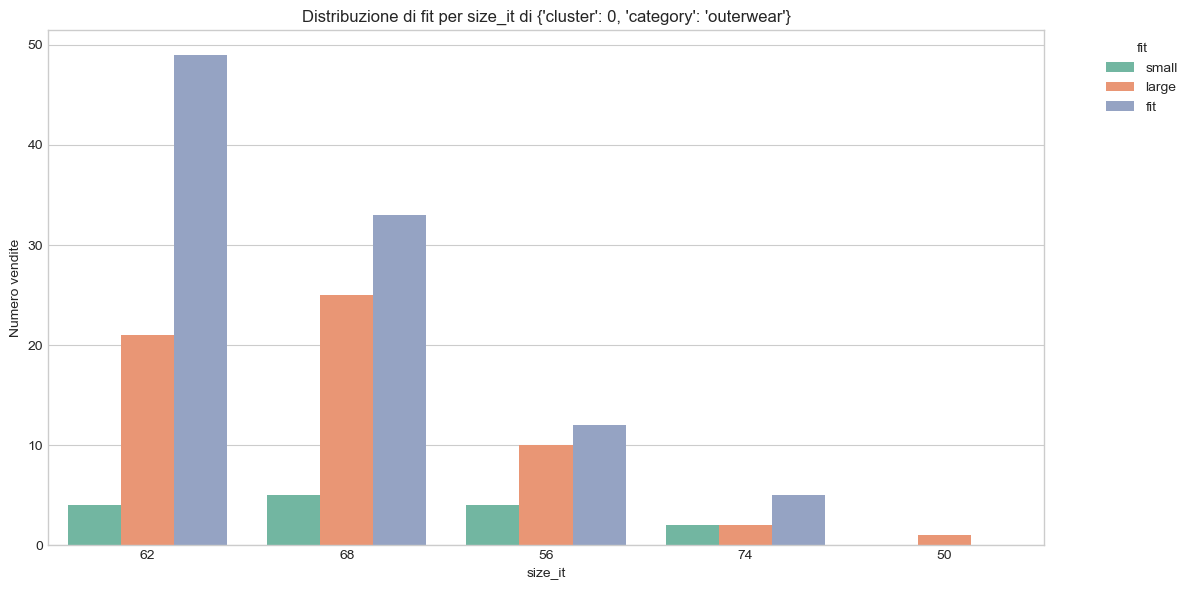

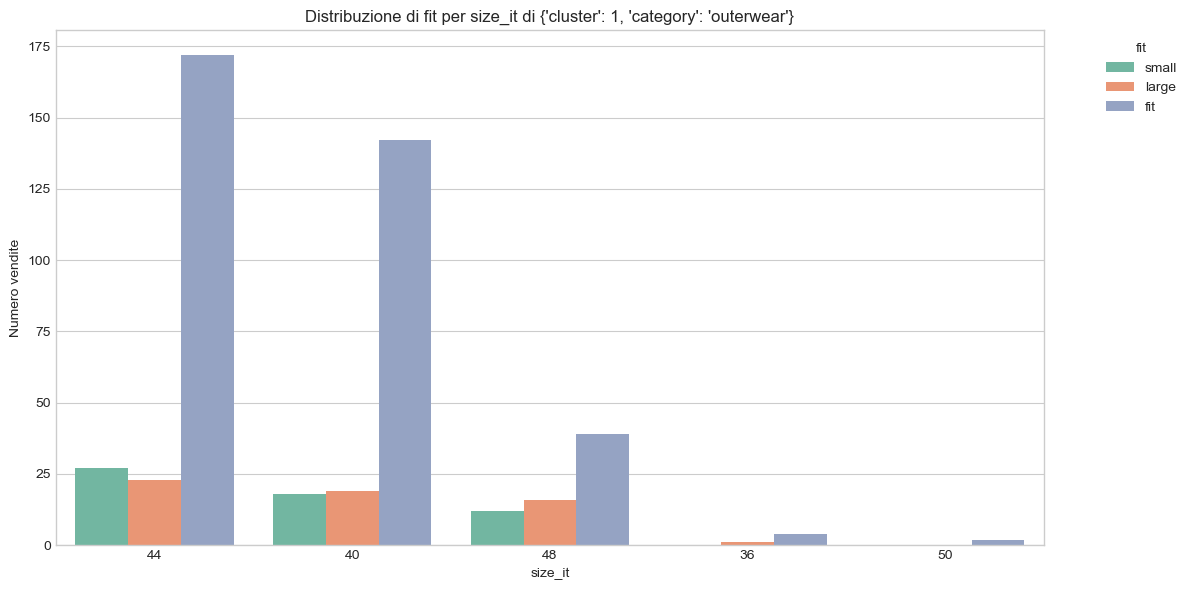

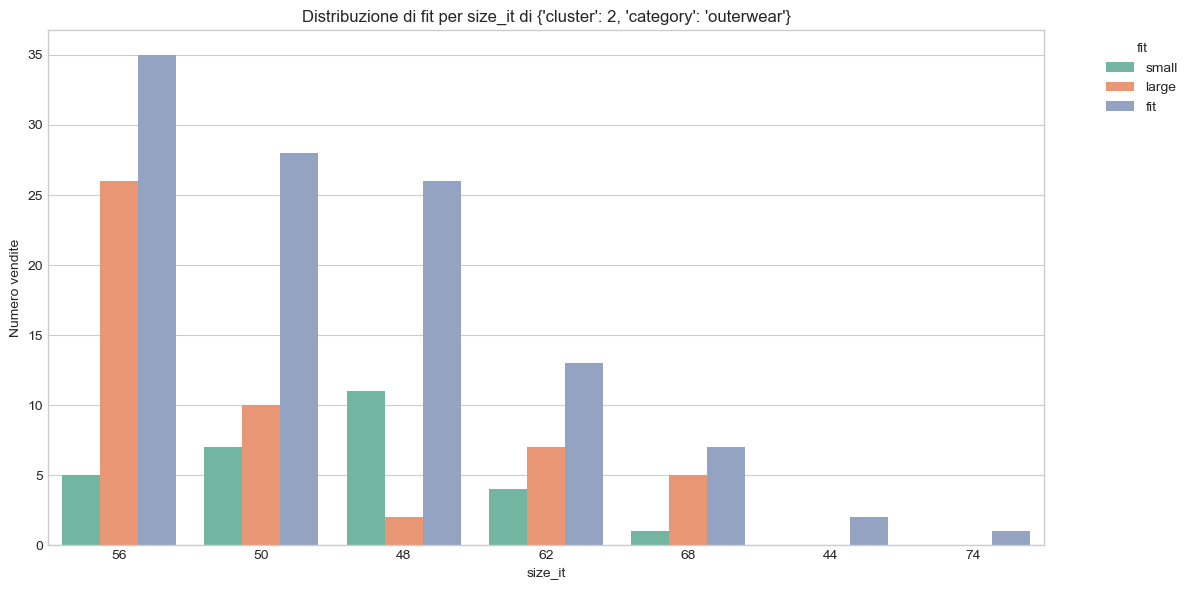

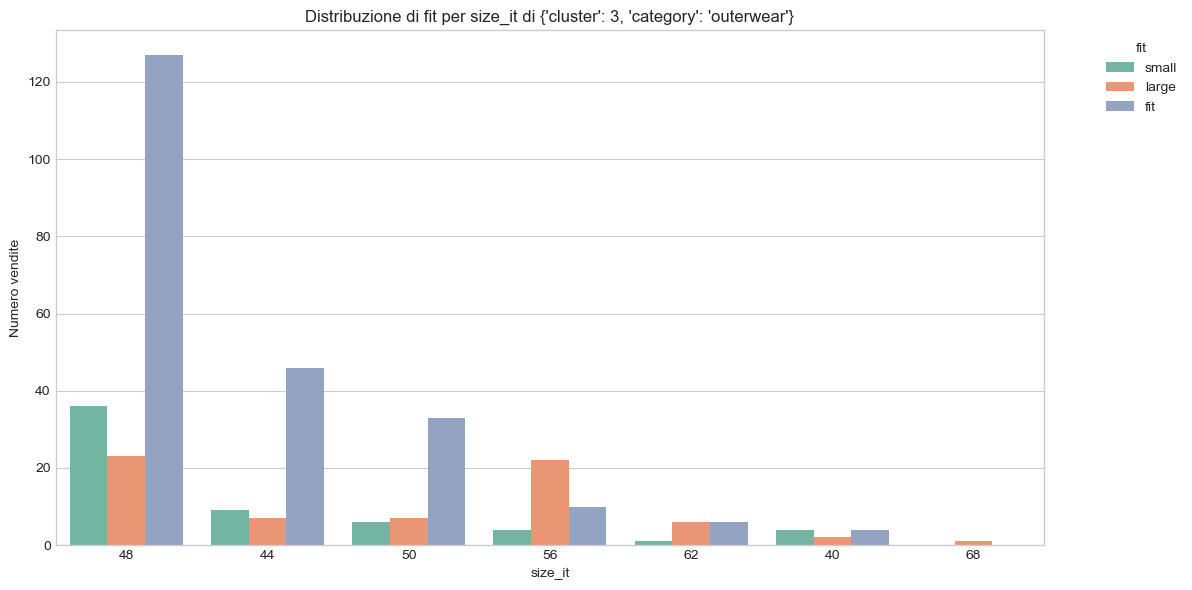

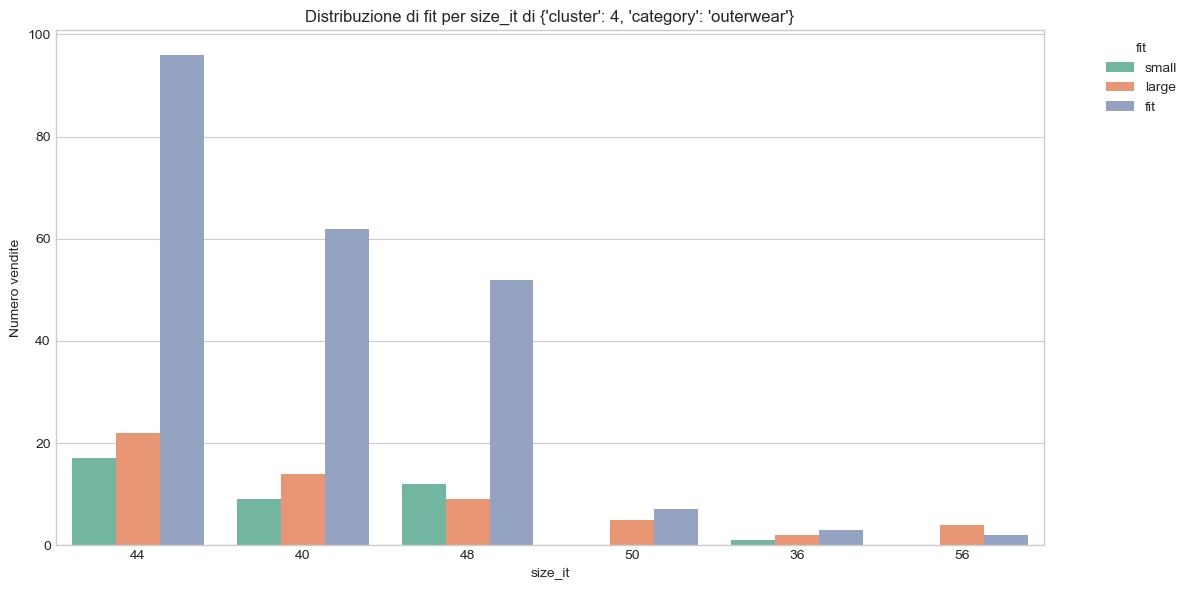

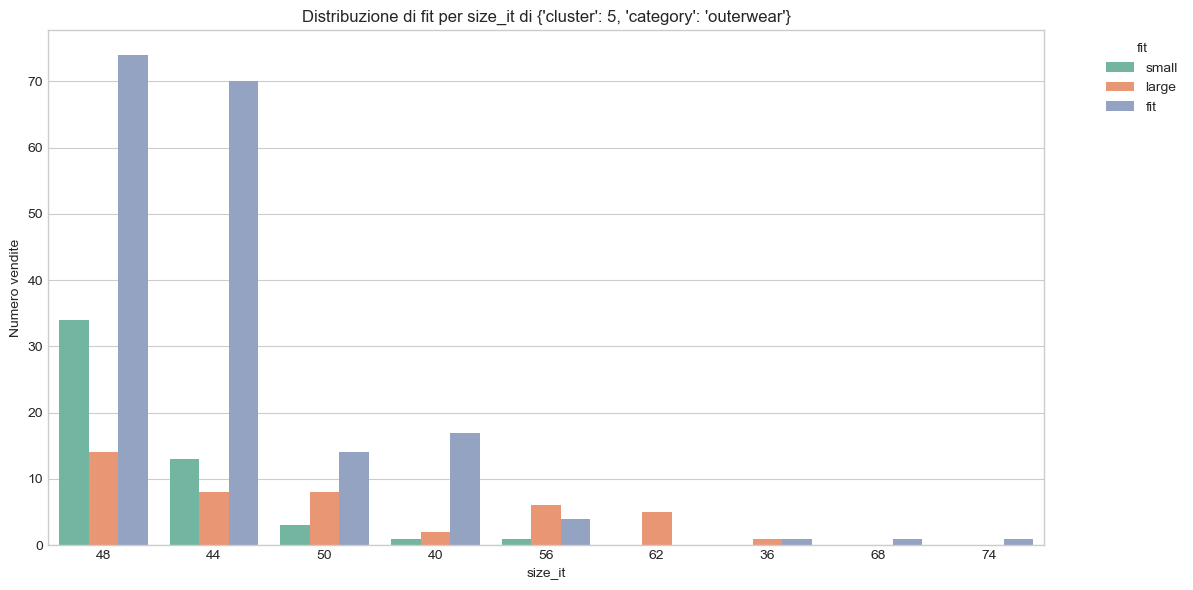

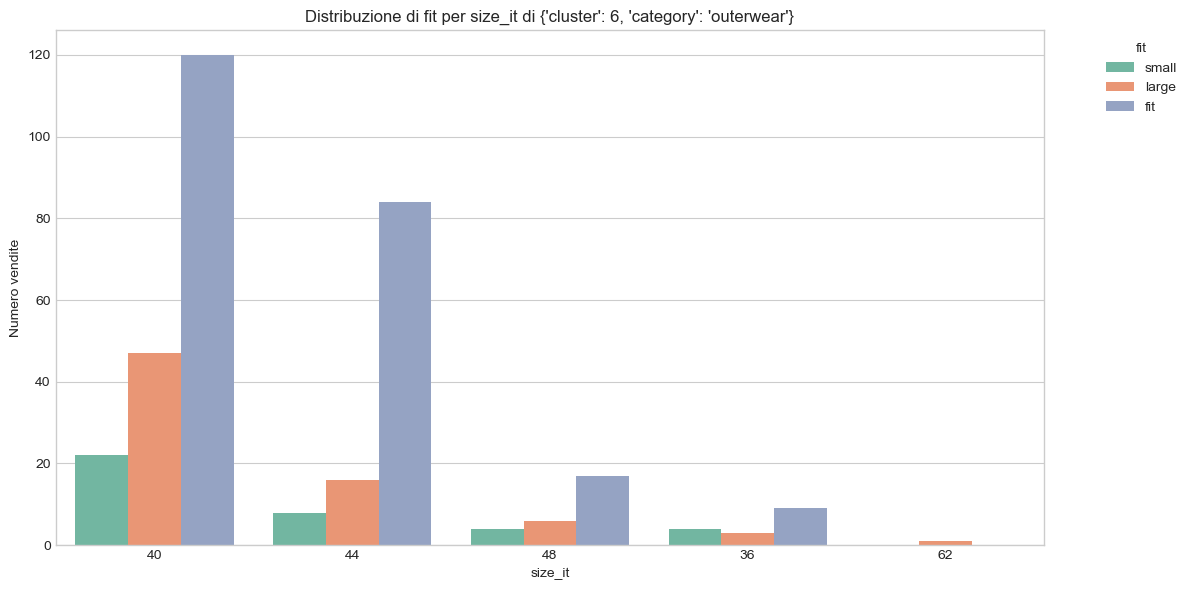

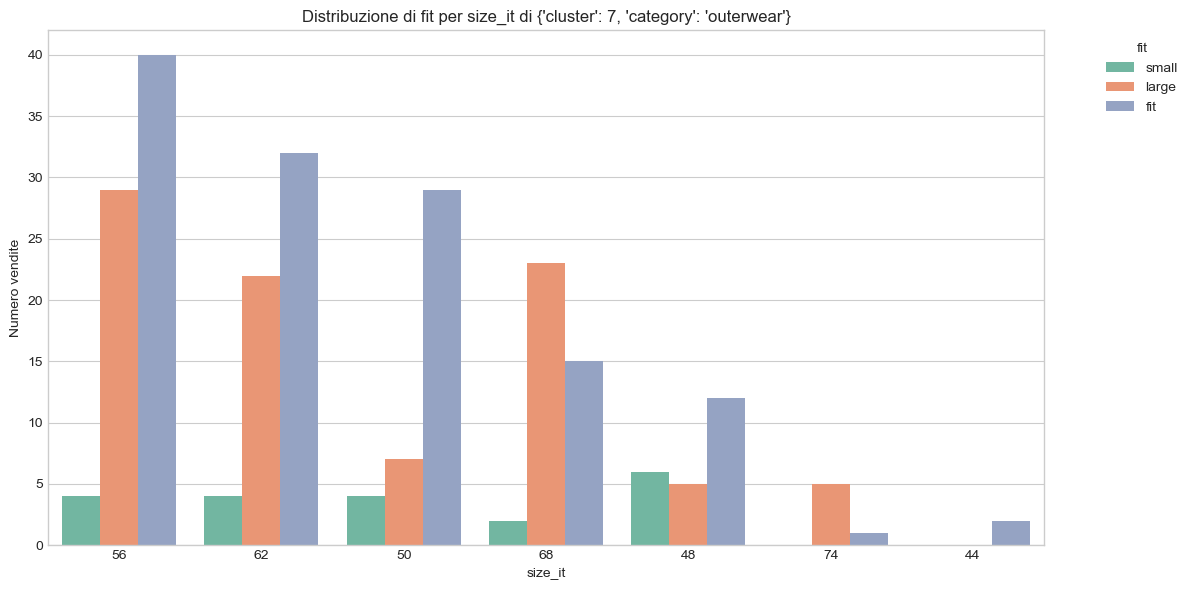

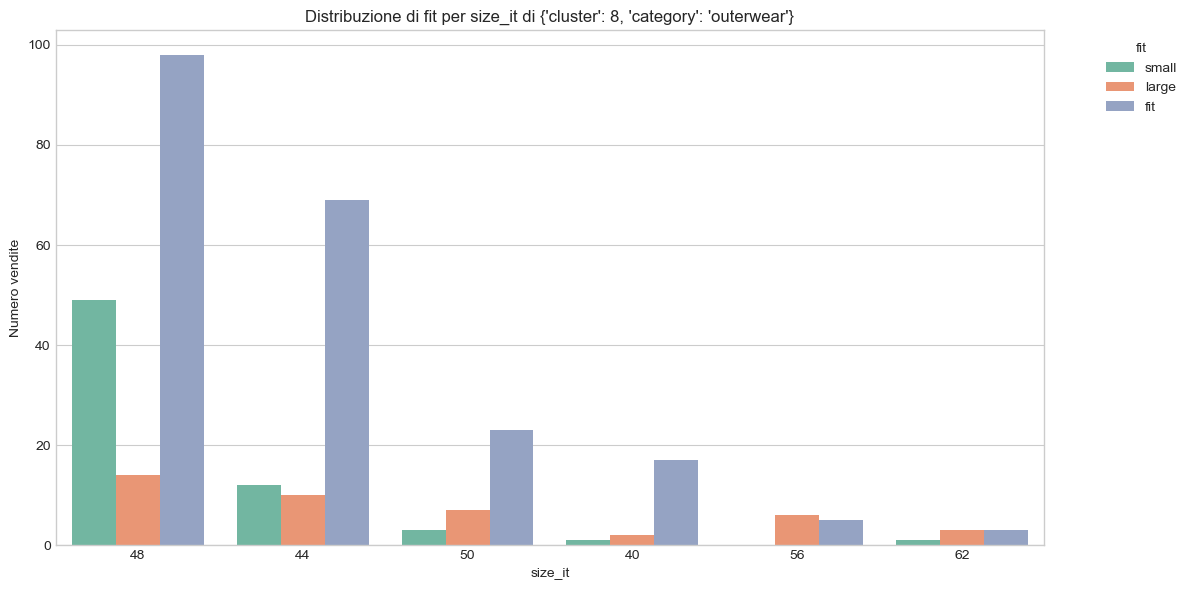

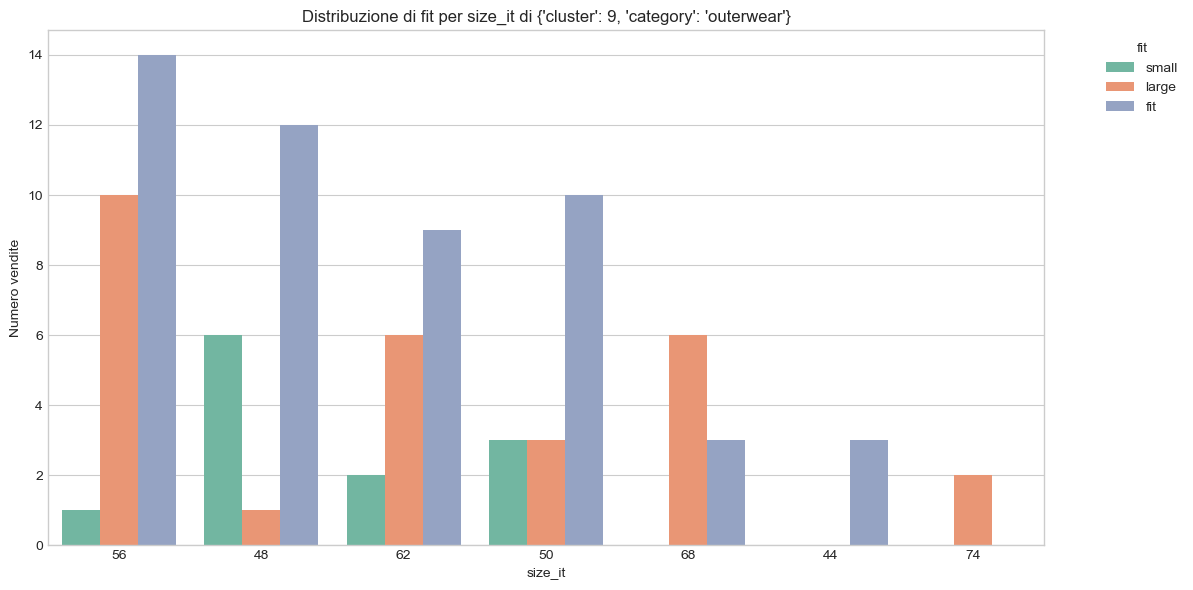

In [252]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='fit',
        filters={'cluster': cluster, 'category':'outerwear'},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

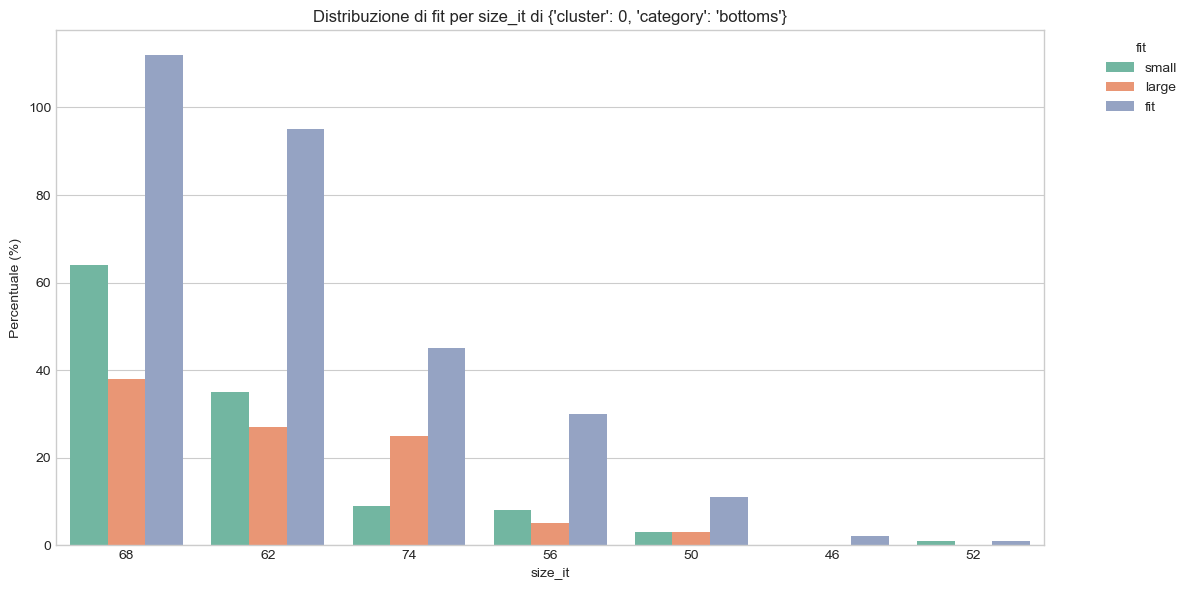

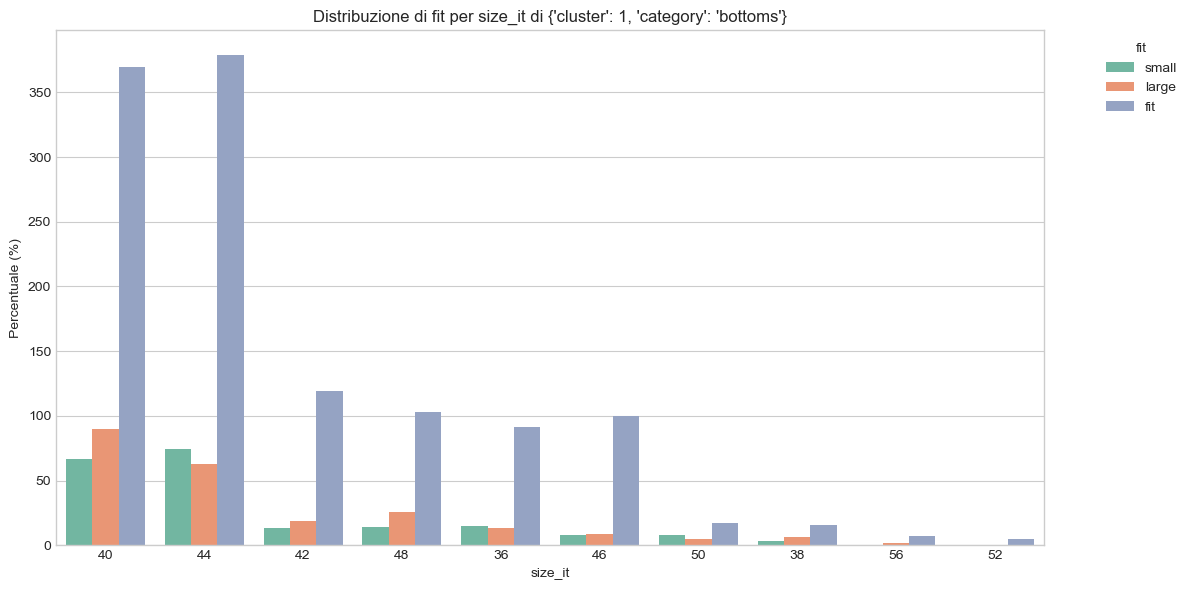

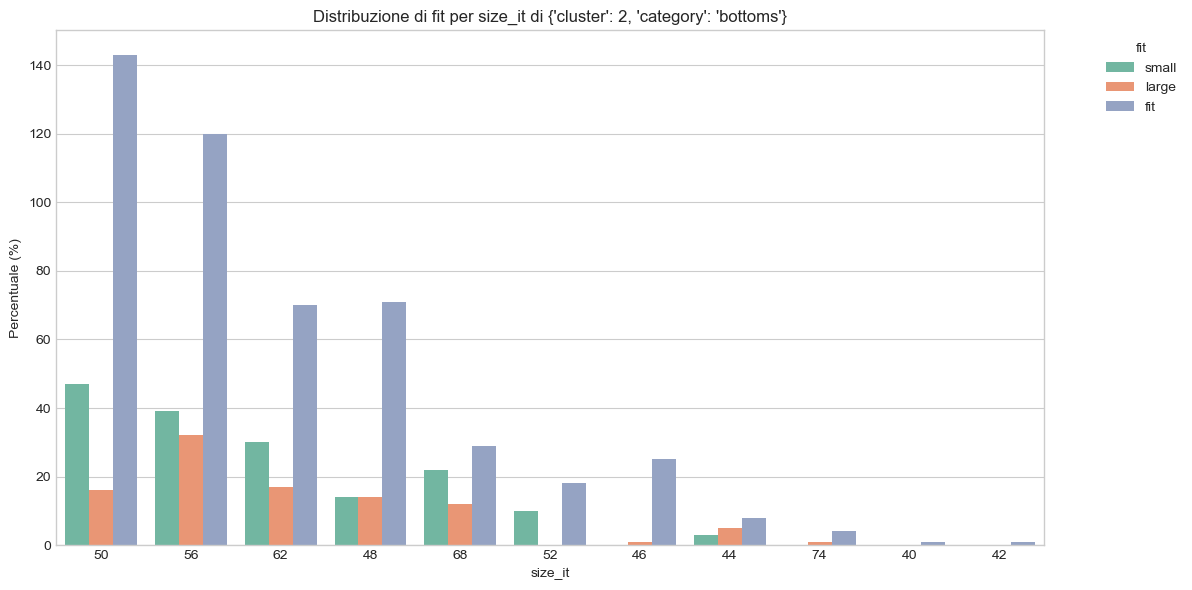

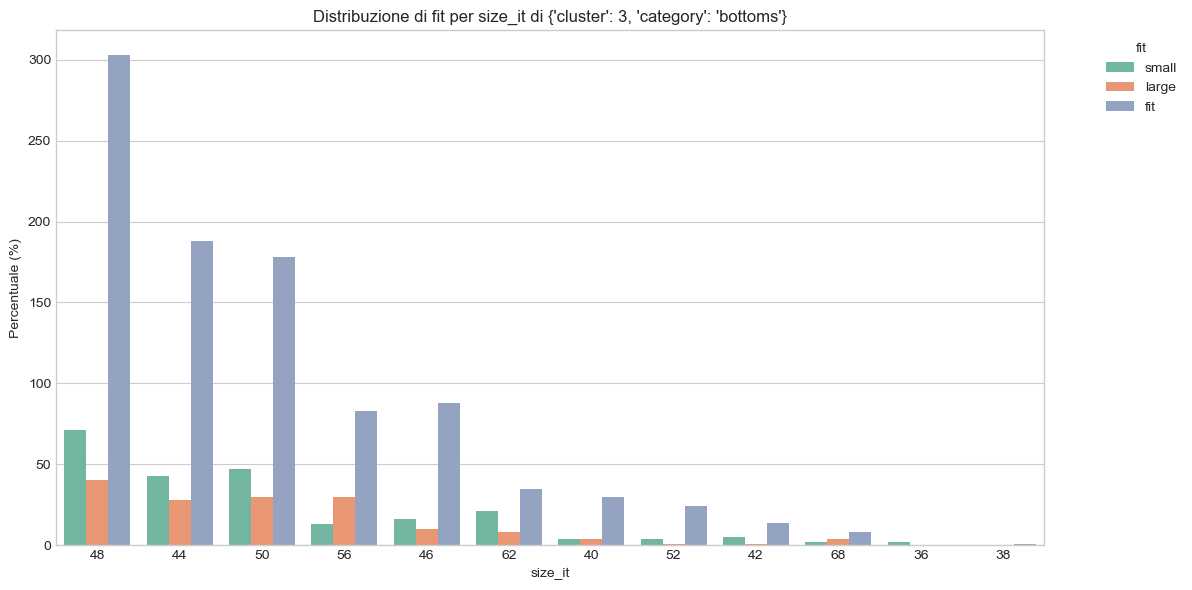

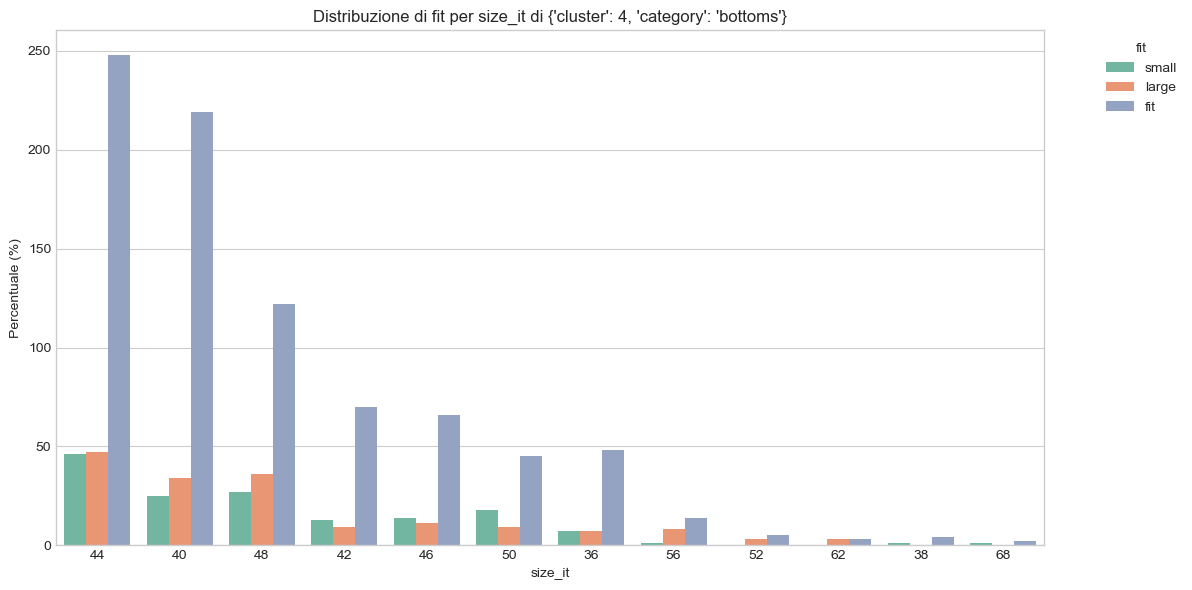

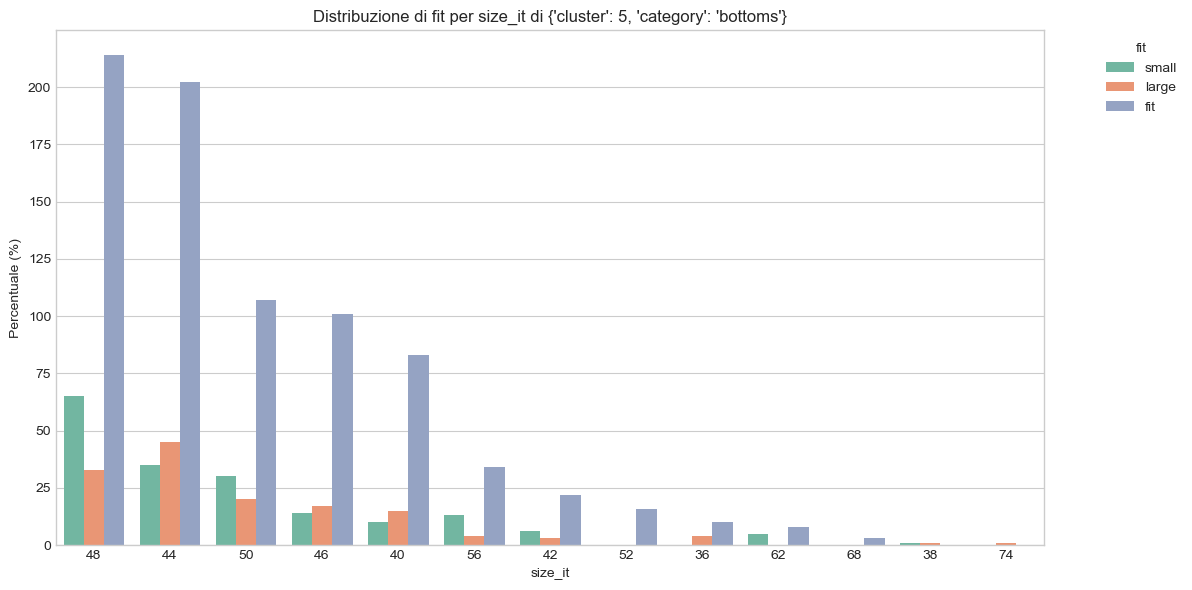

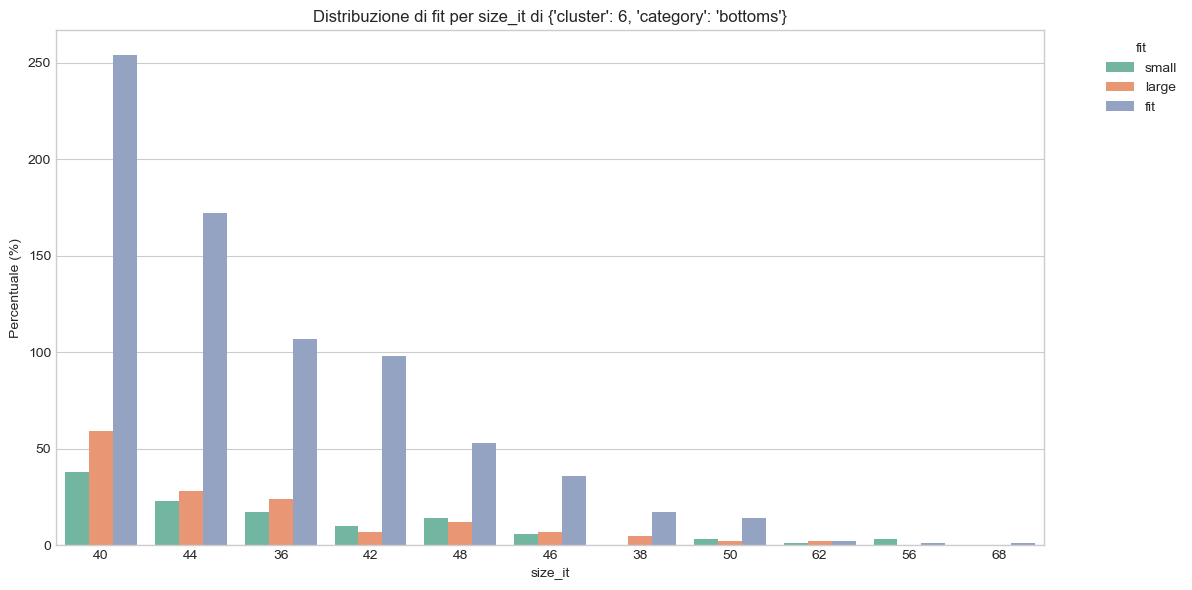

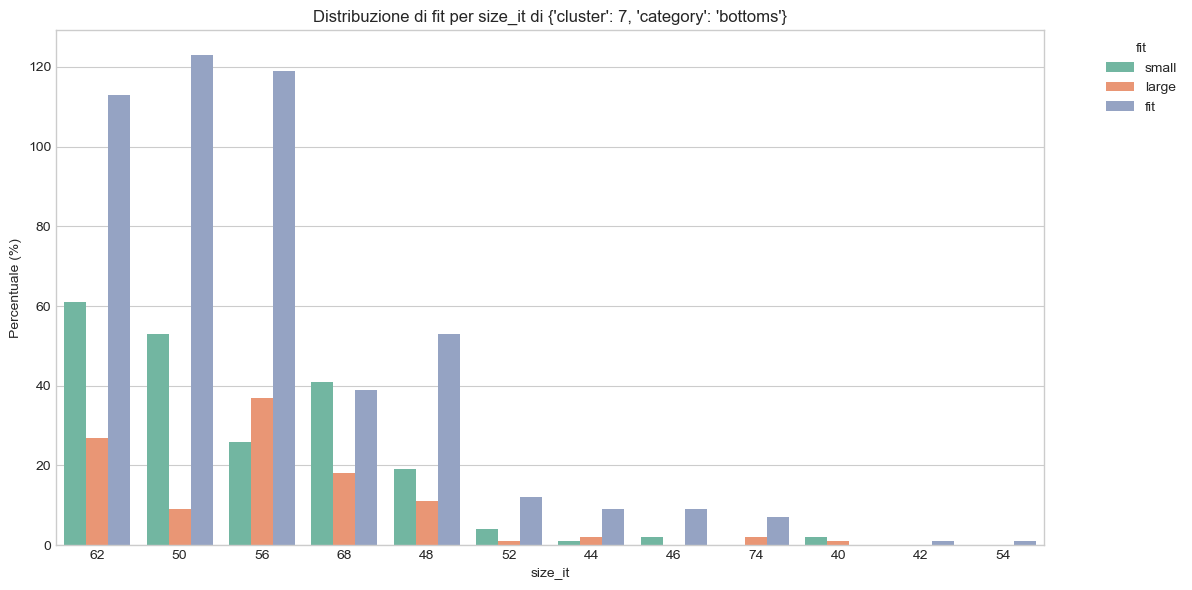

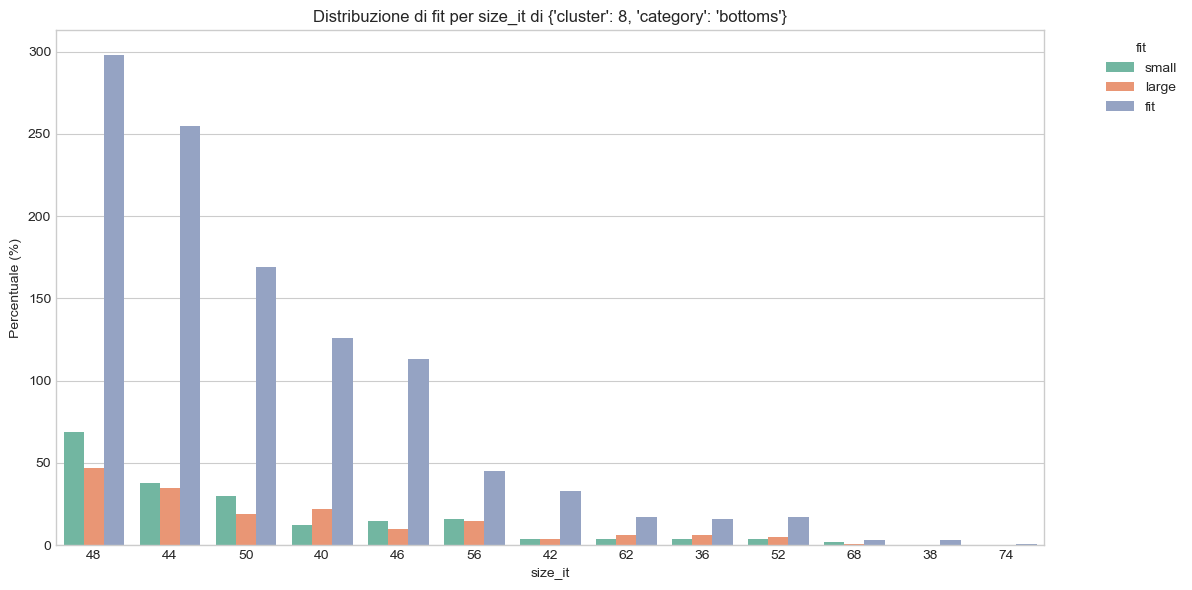

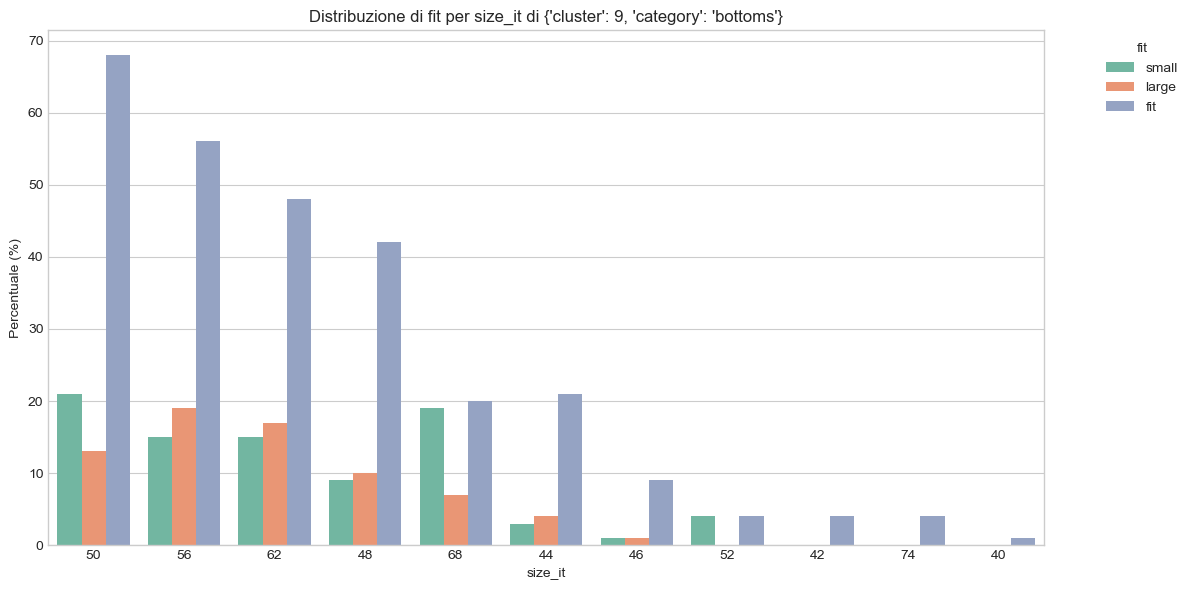

In [246]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='fit',
        filters={'cluster': cluster, 'category':'bottoms'},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

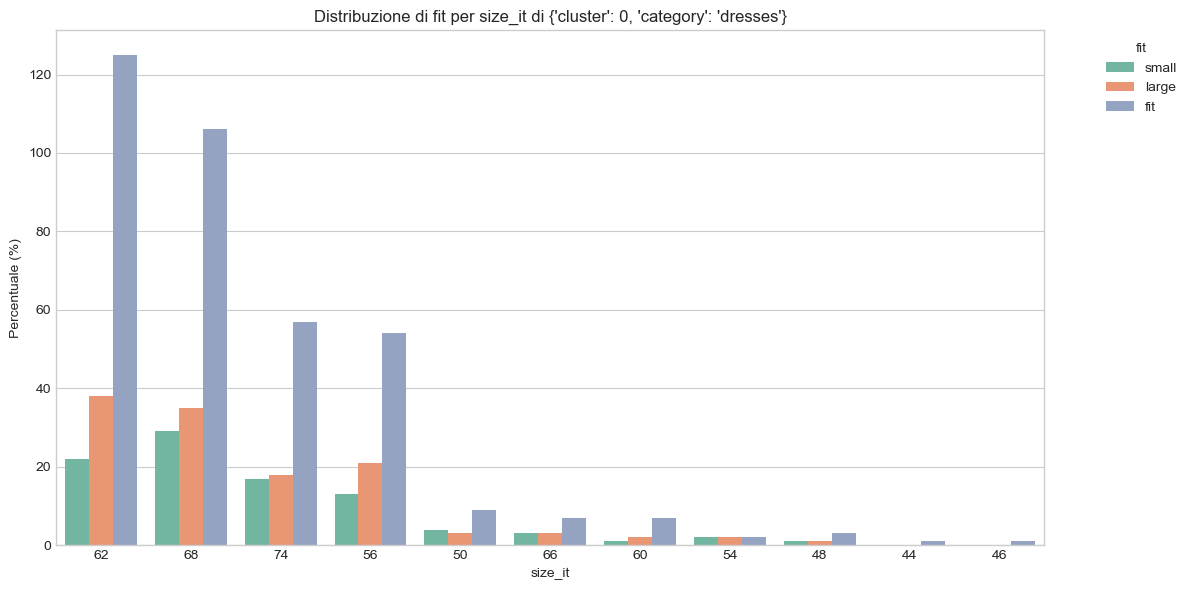

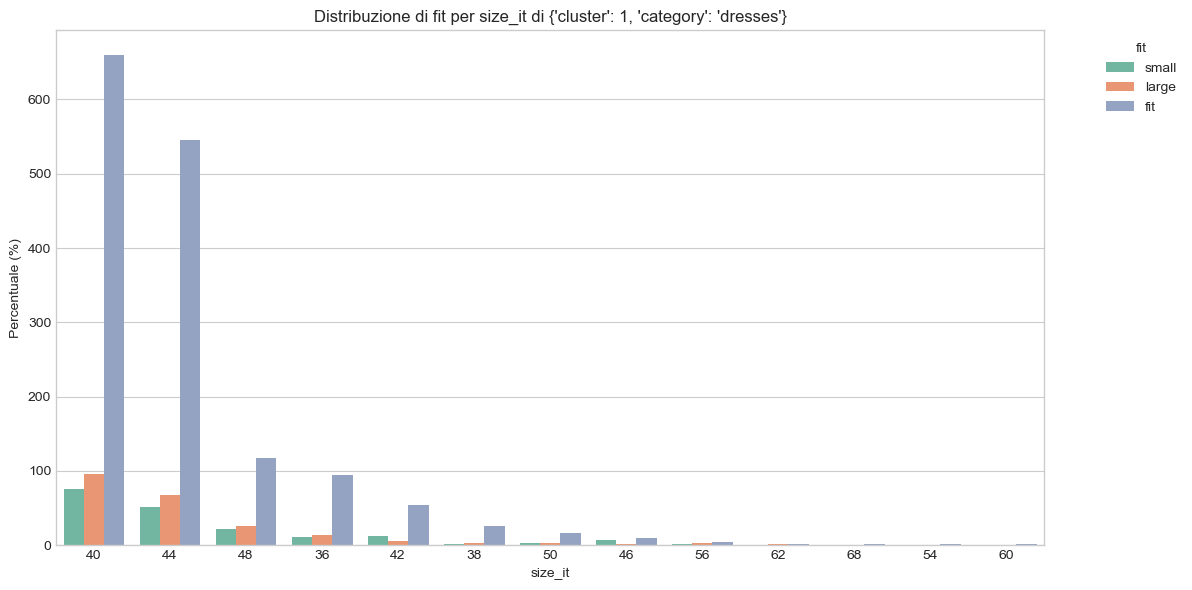

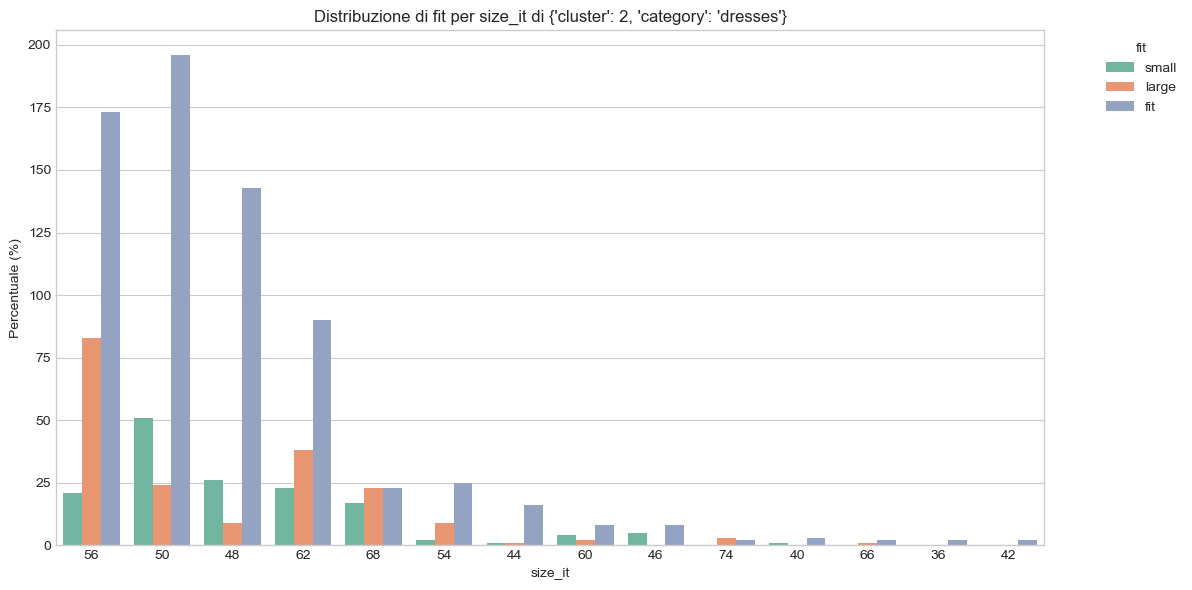

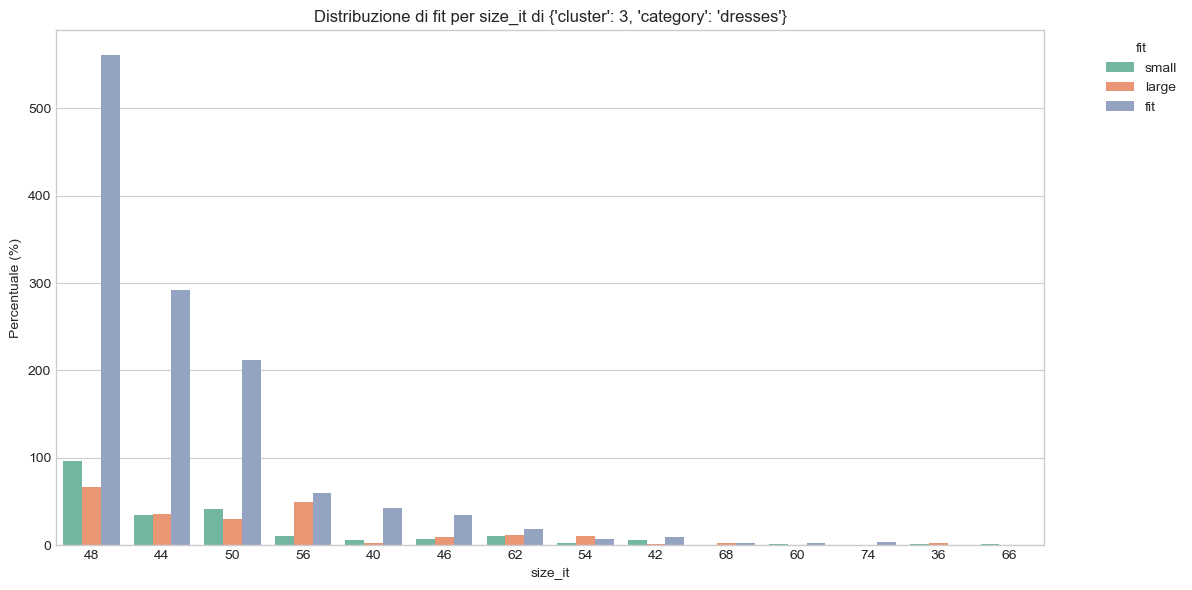

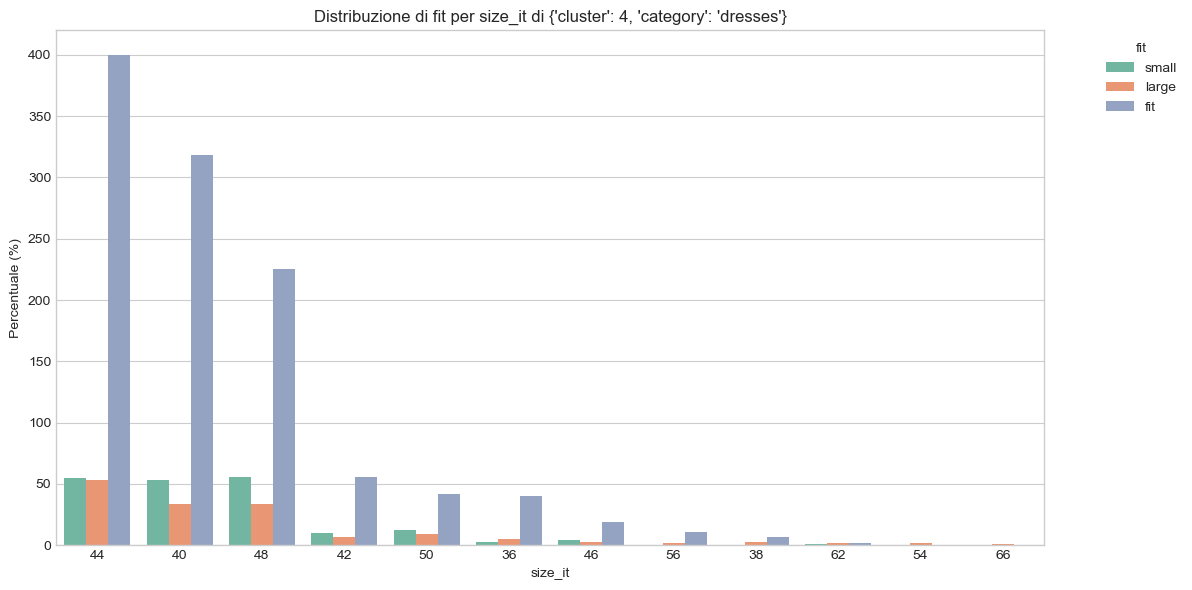

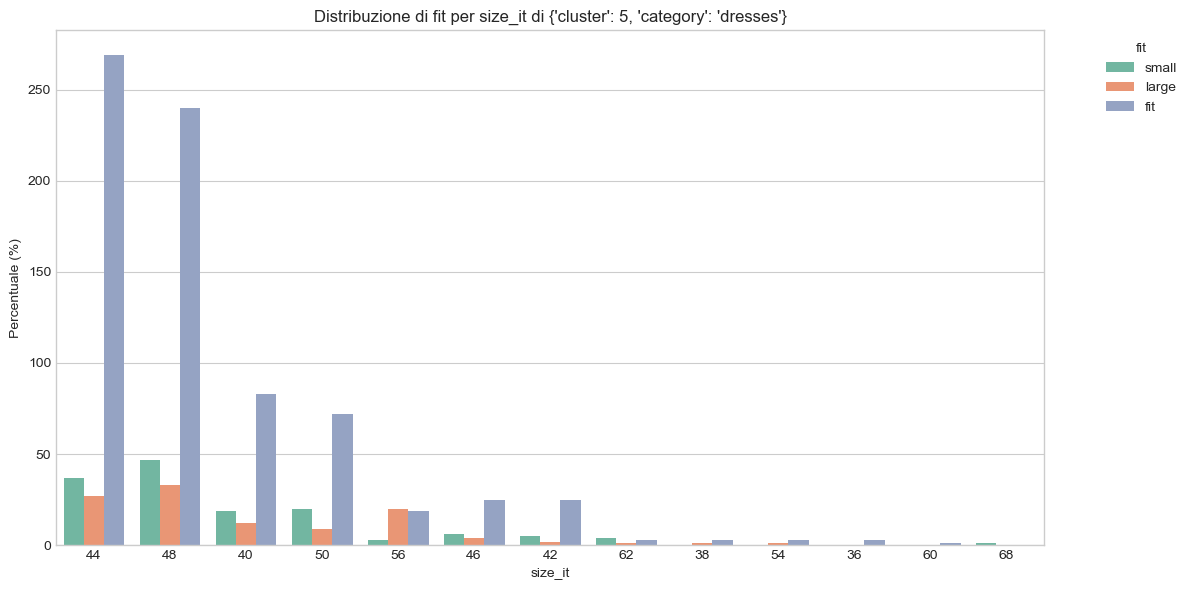

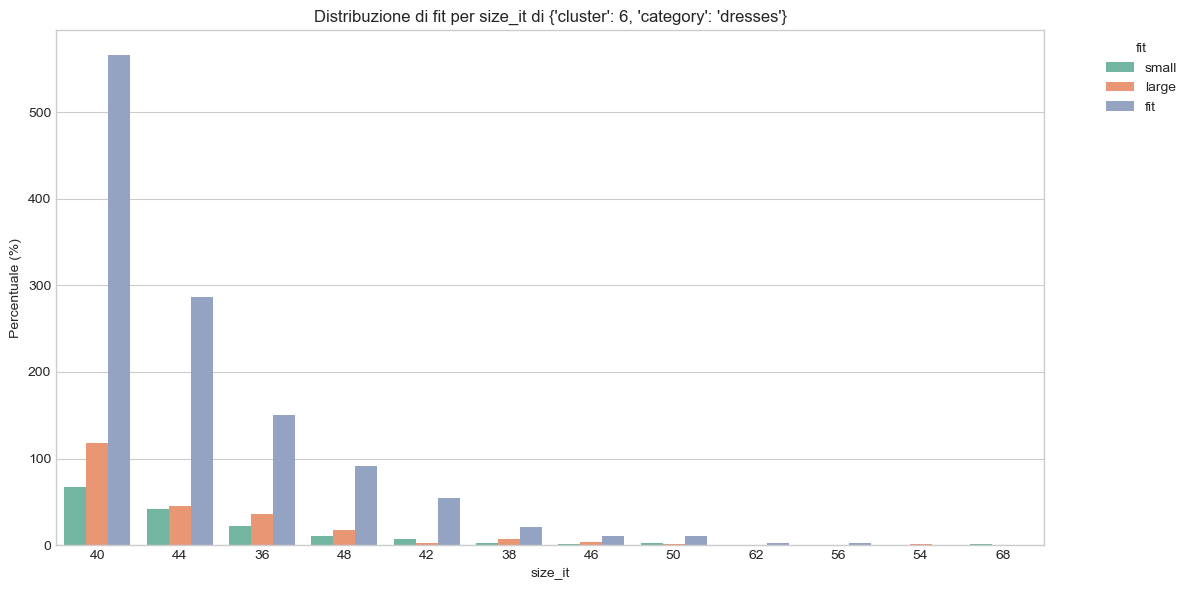

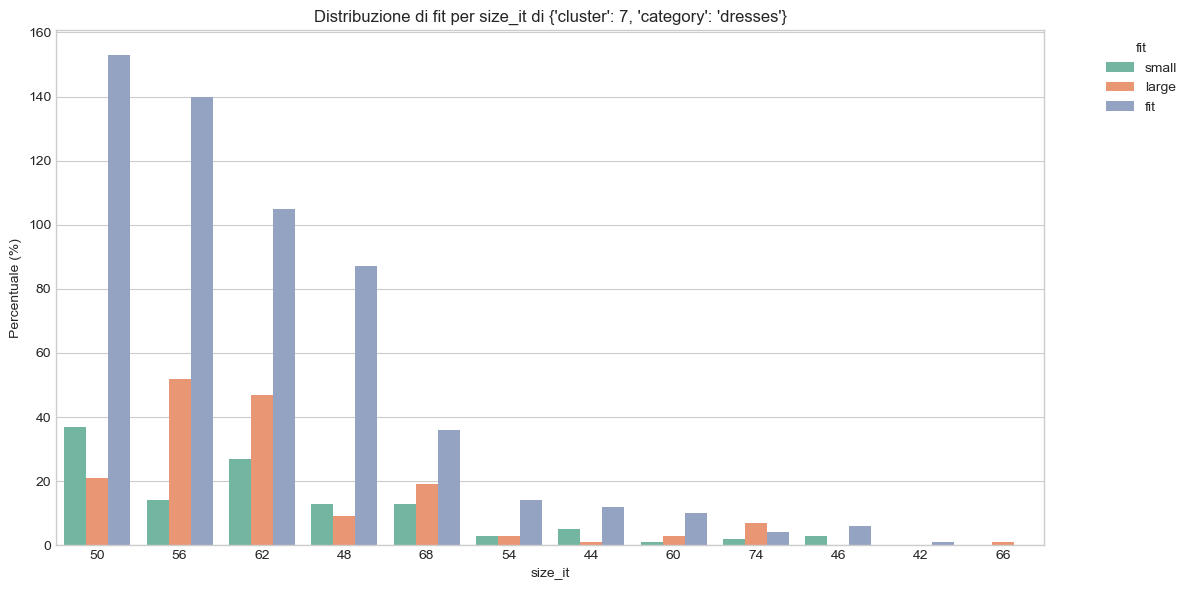

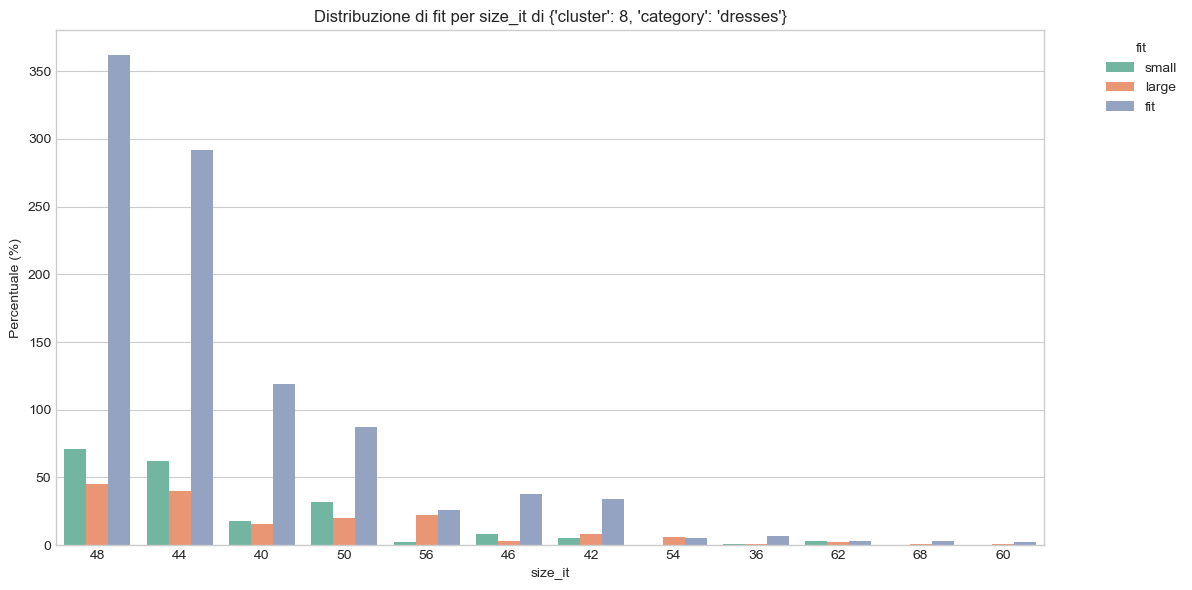

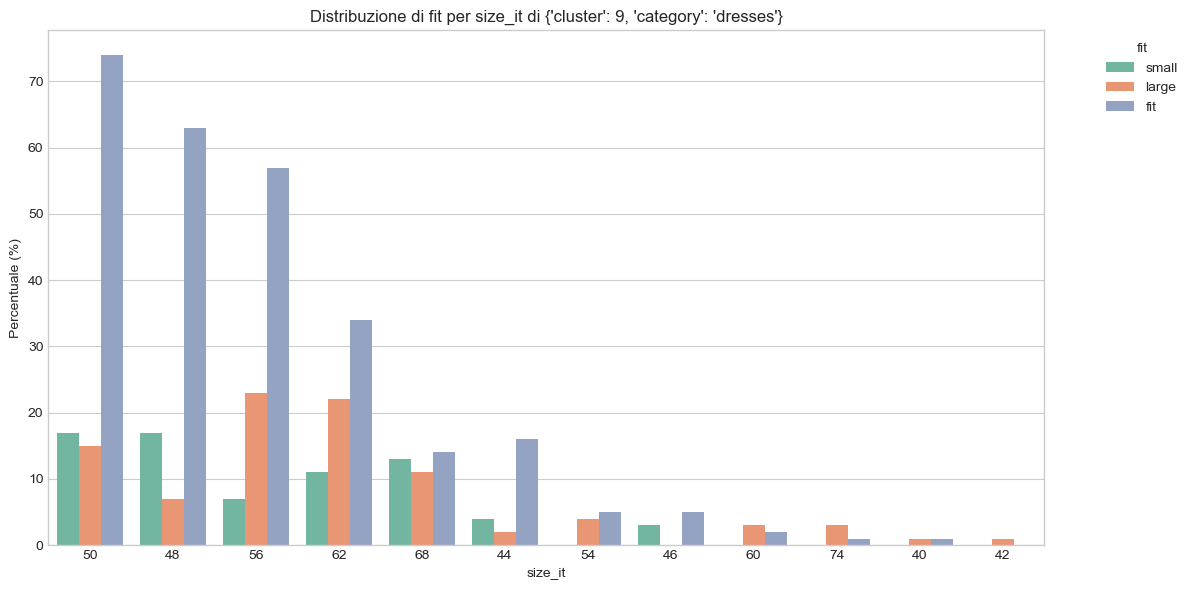

In [250]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='fit',
        filters={'cluster': cluster, 'category':'dresses'},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

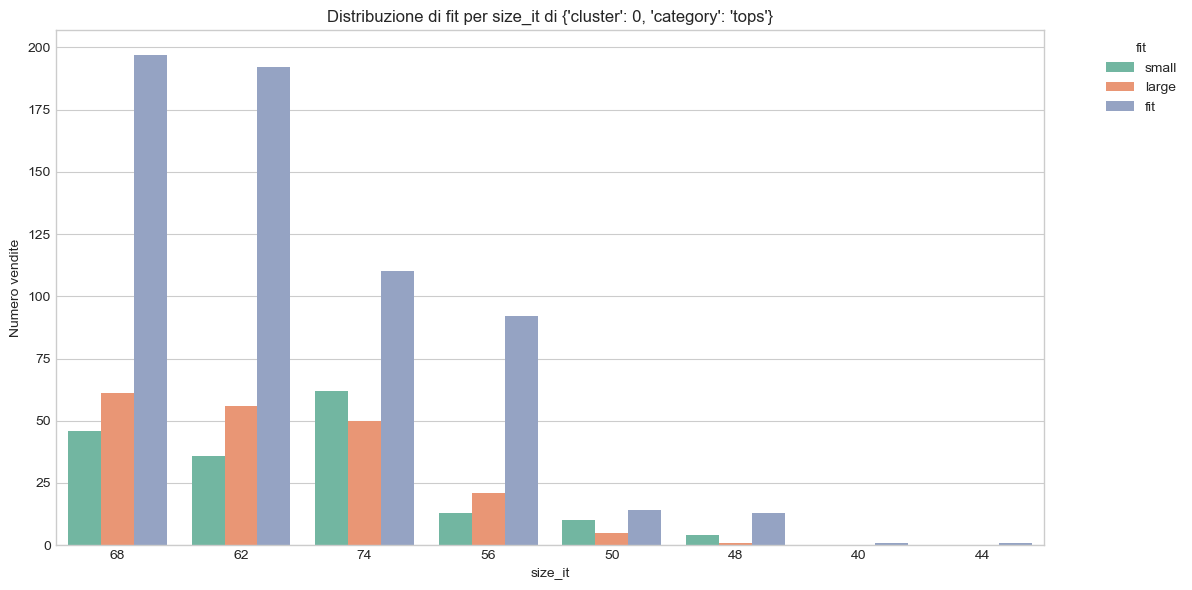

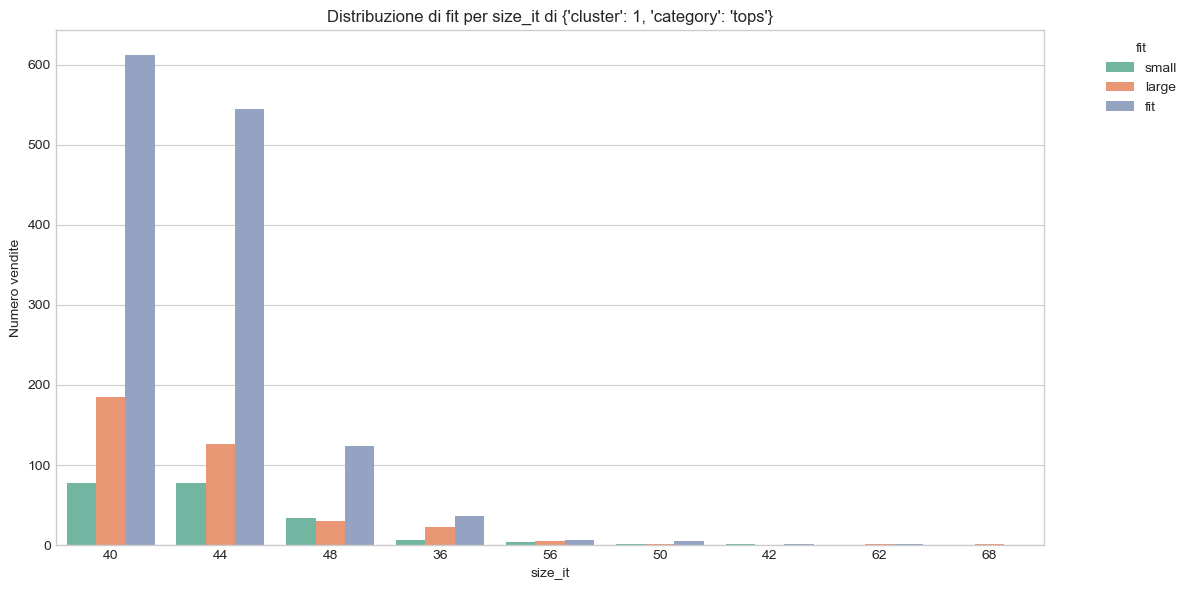

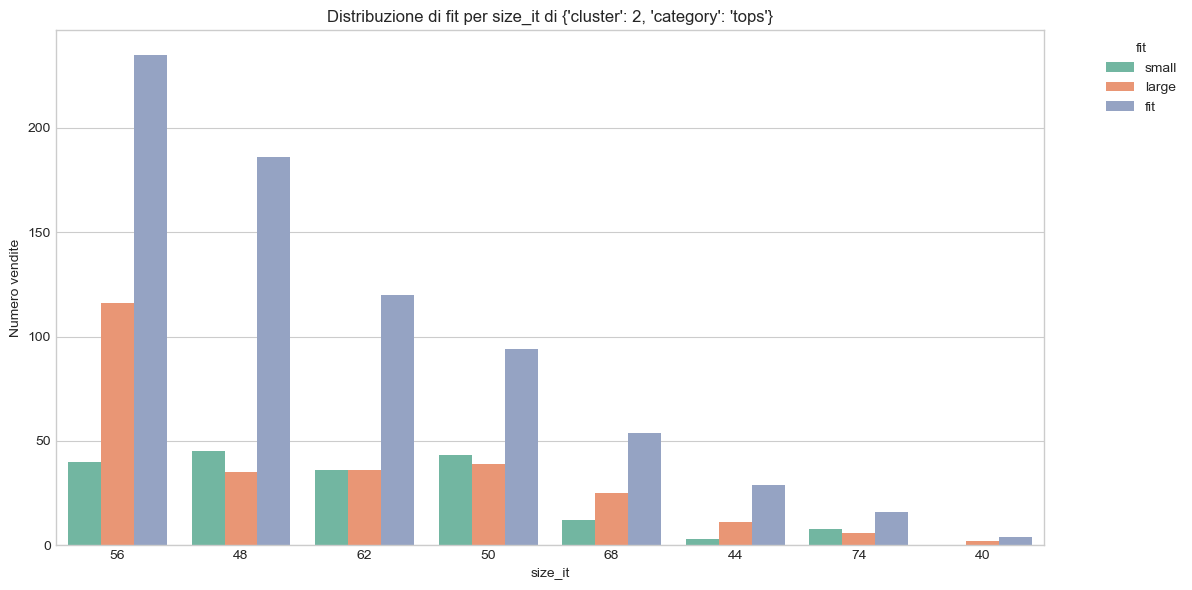

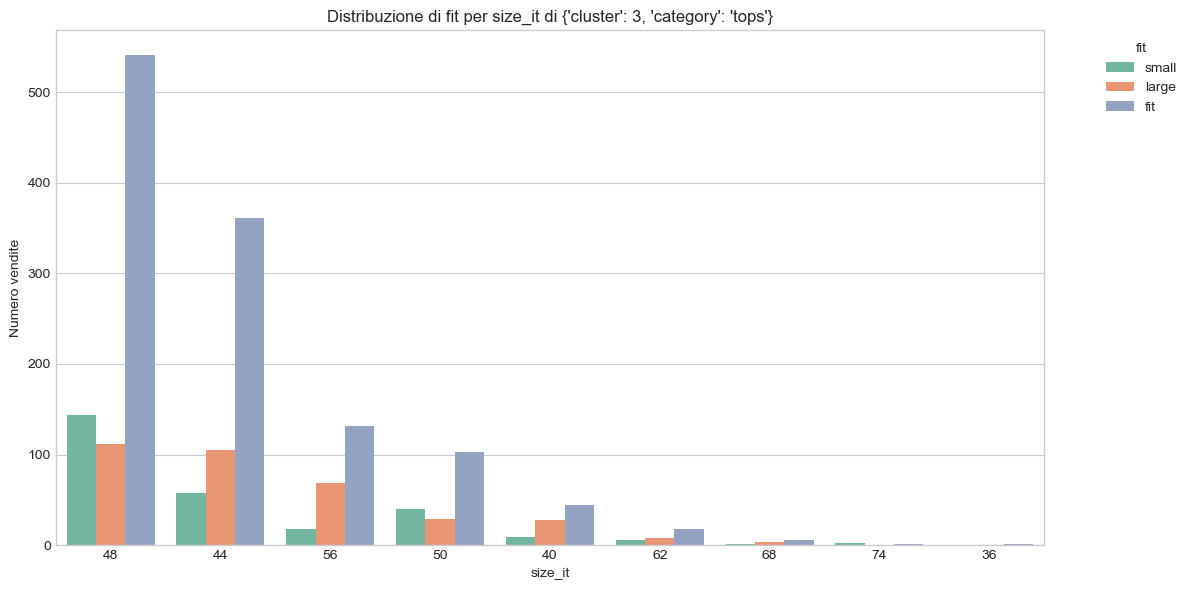

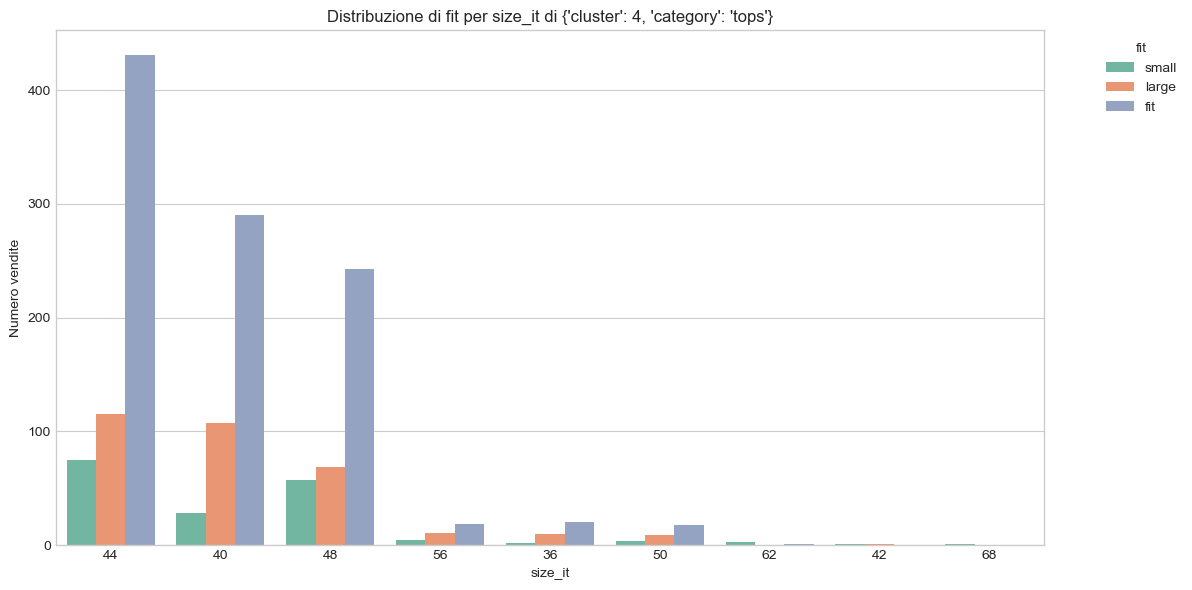

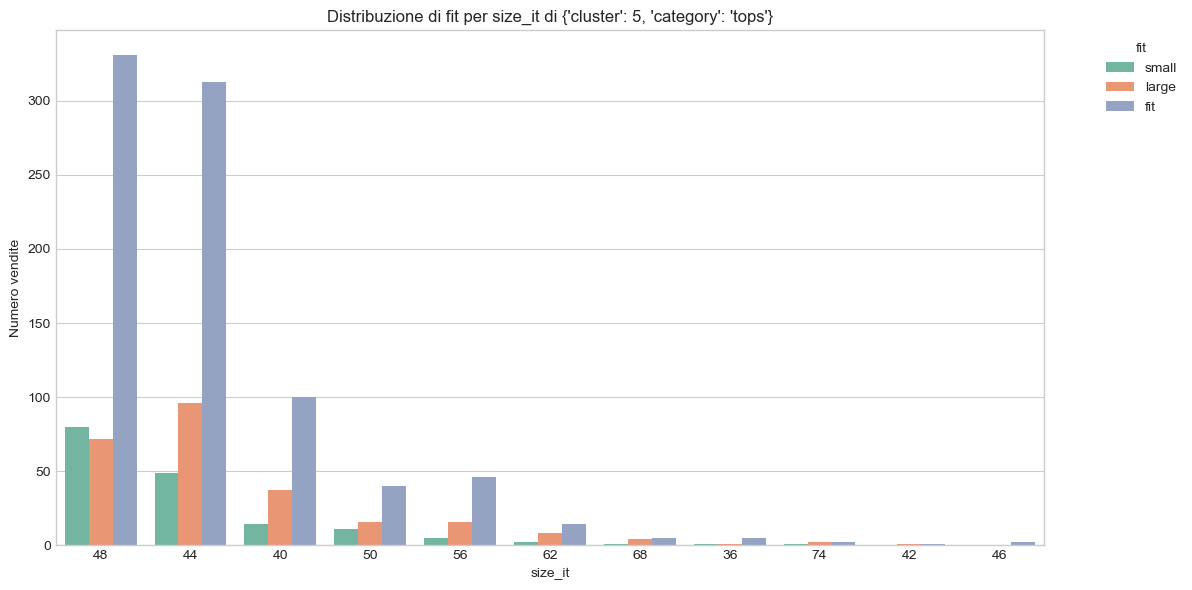

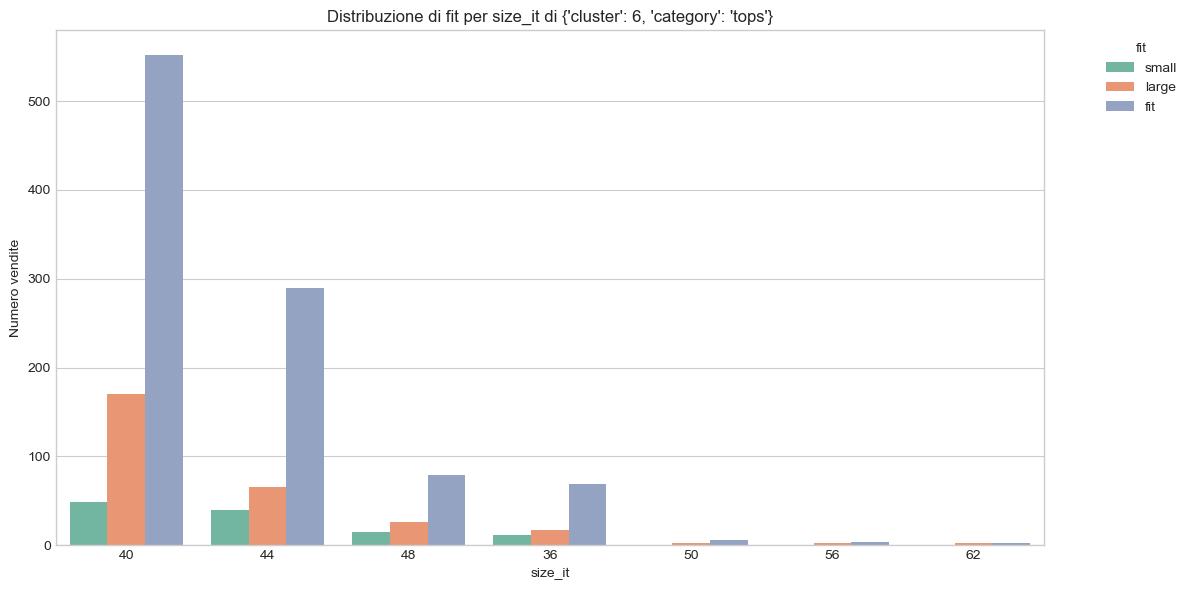

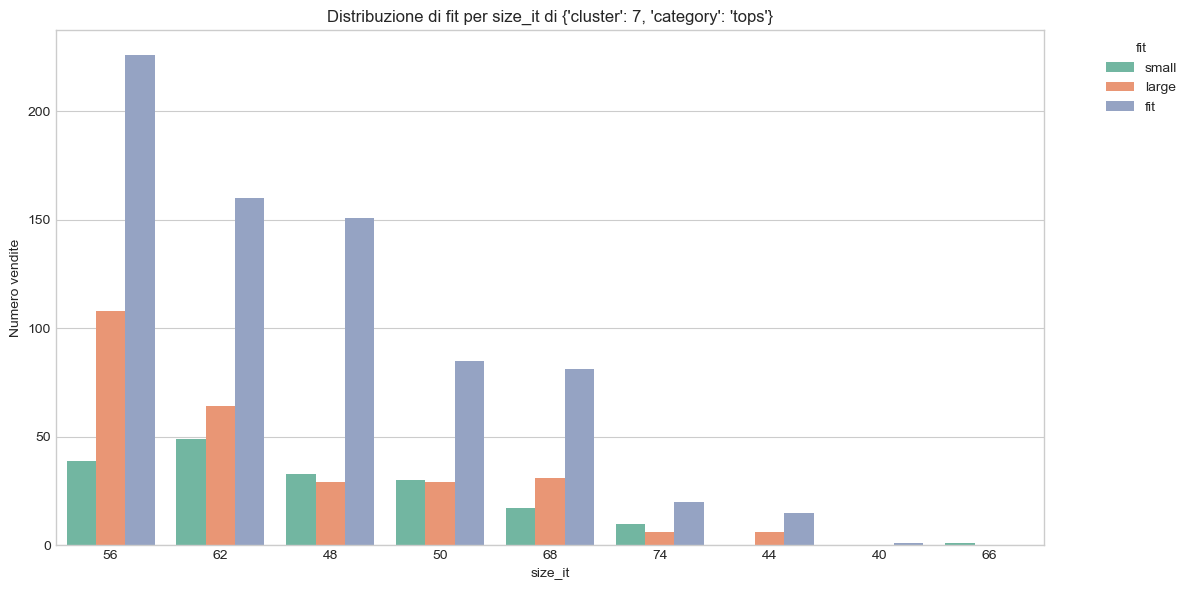

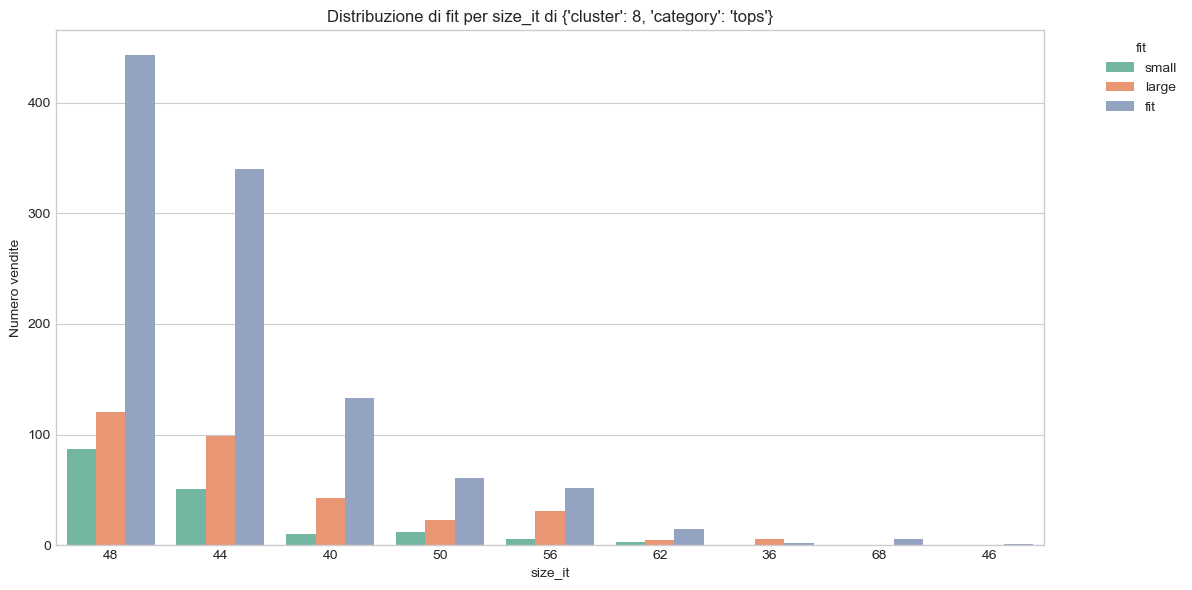

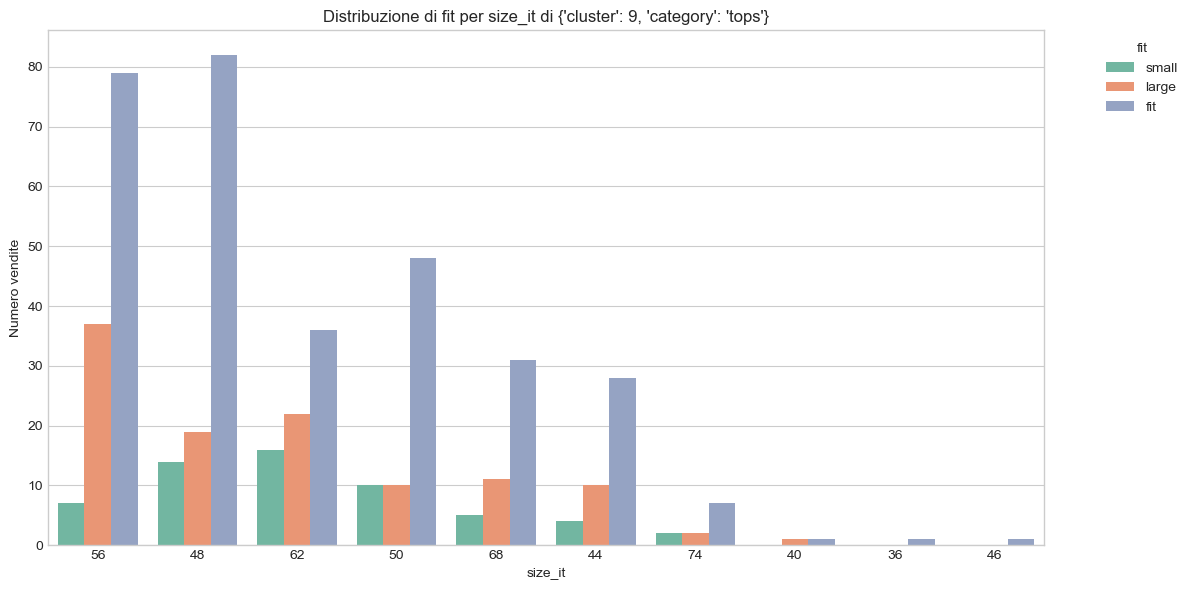

In [253]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='fit',
        filters={'cluster': cluster, 'category':'tops'},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

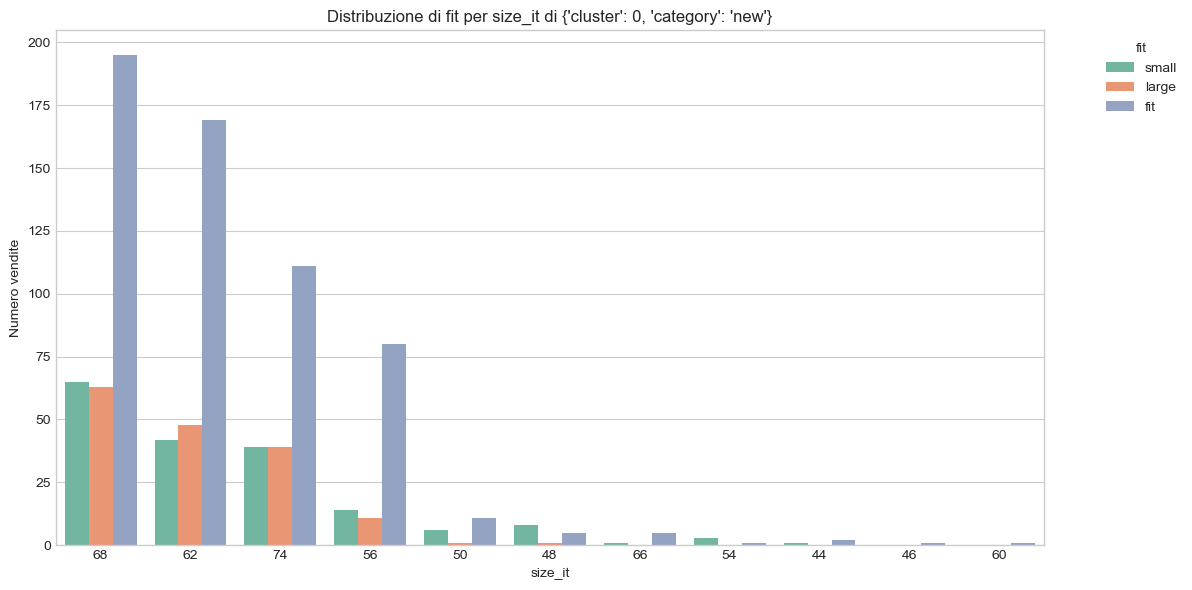

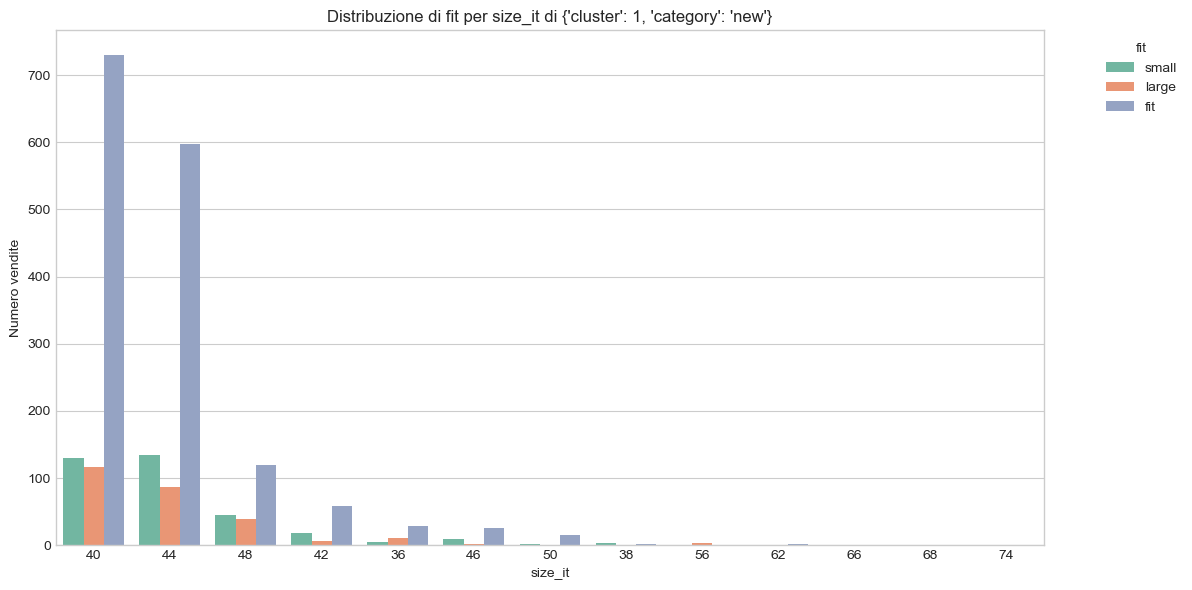

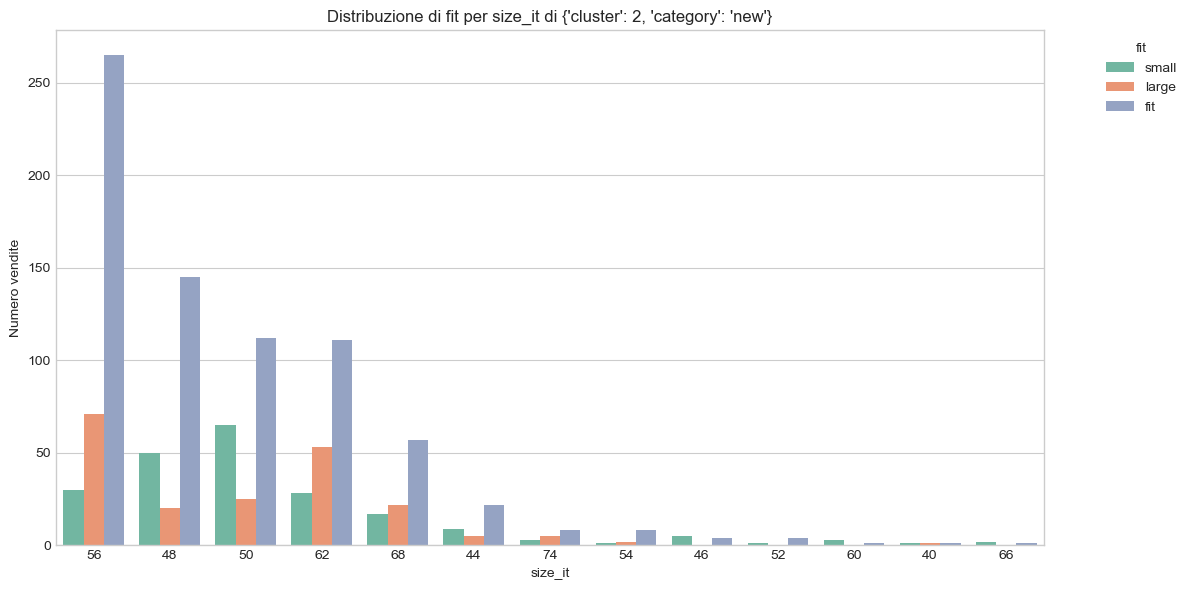

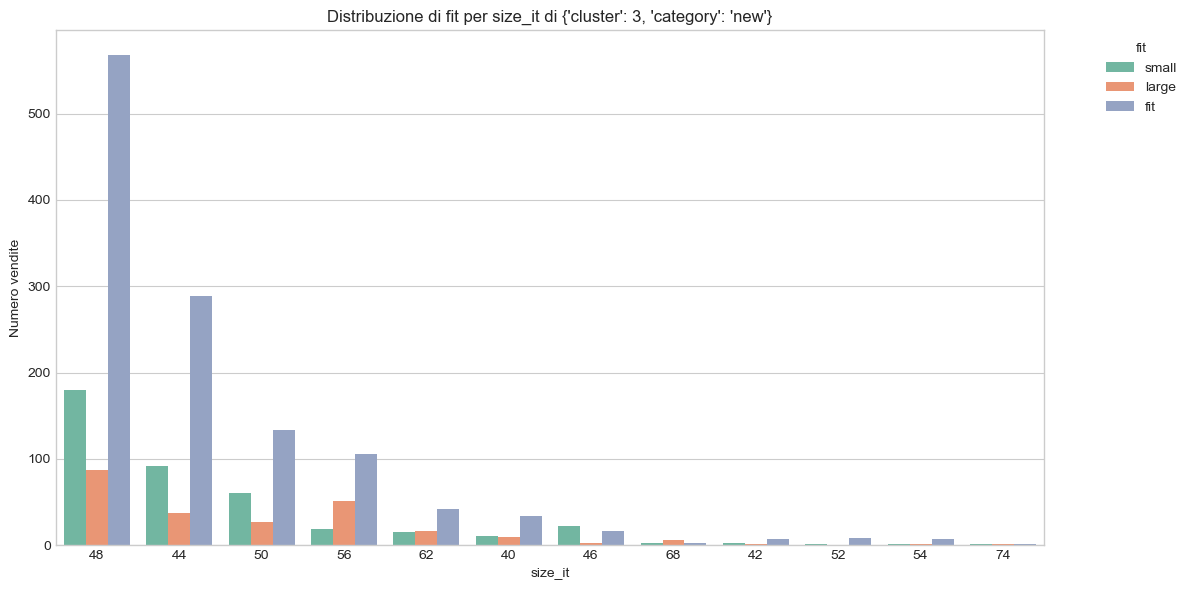

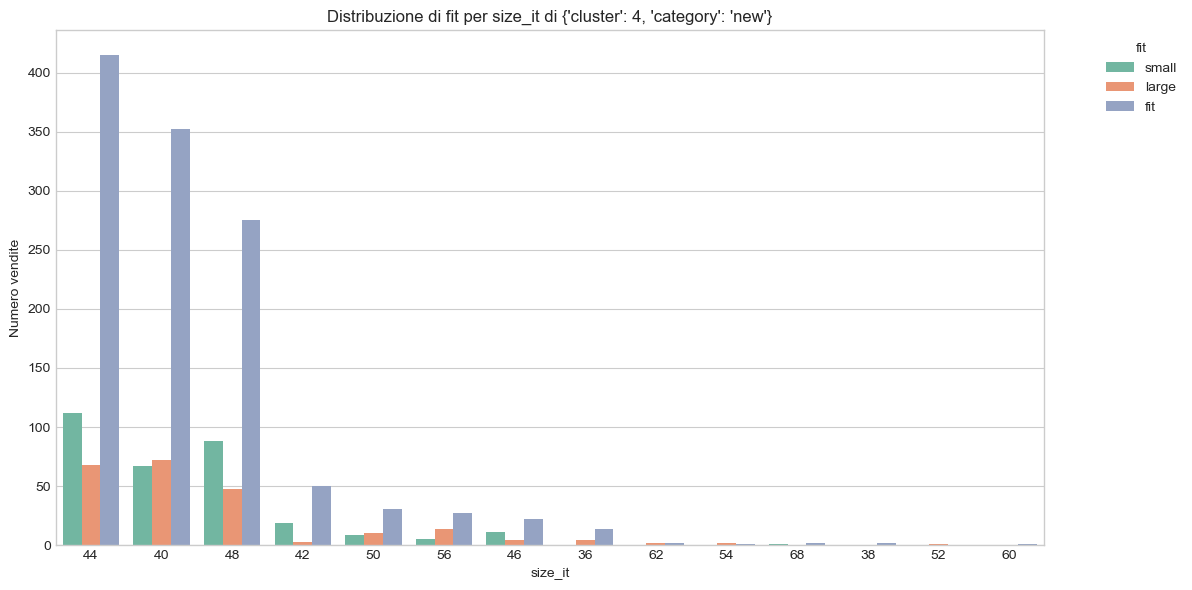

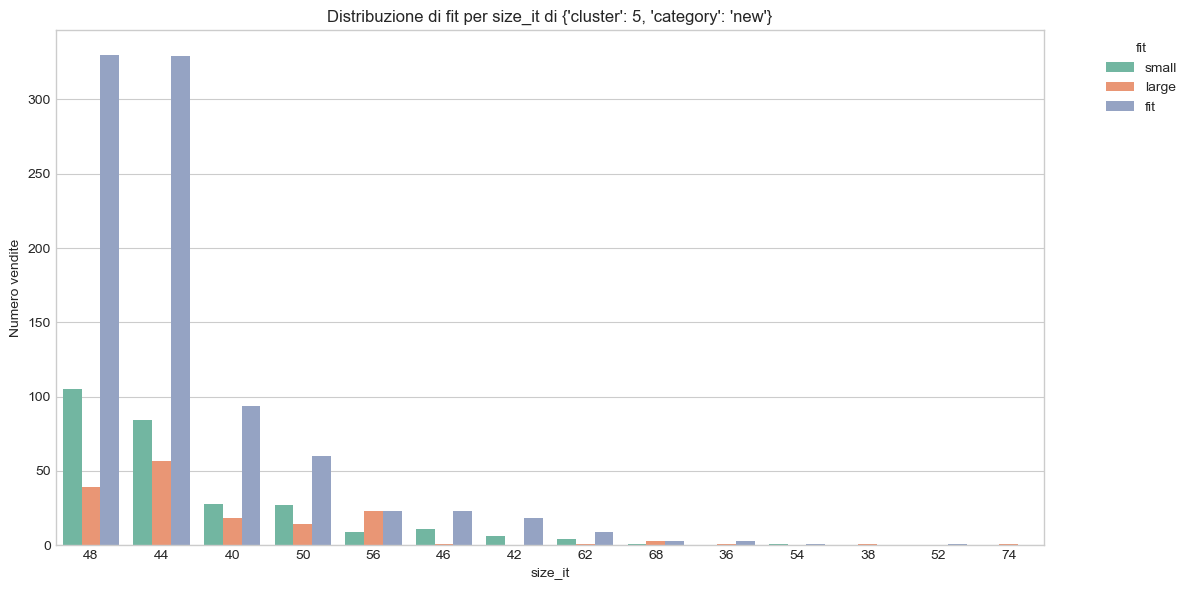

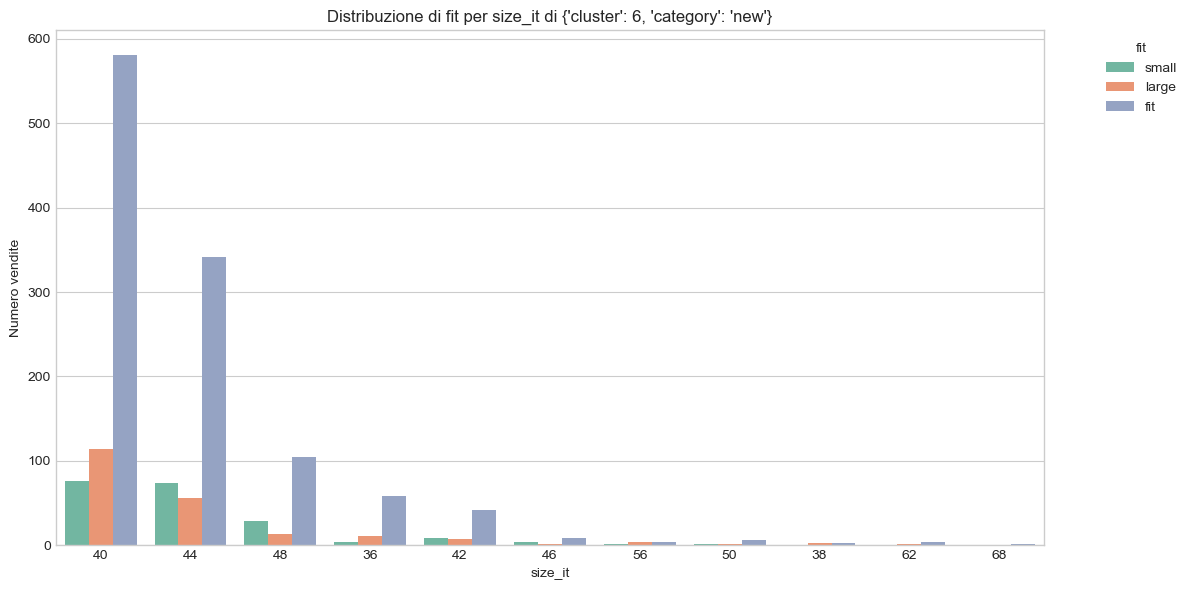

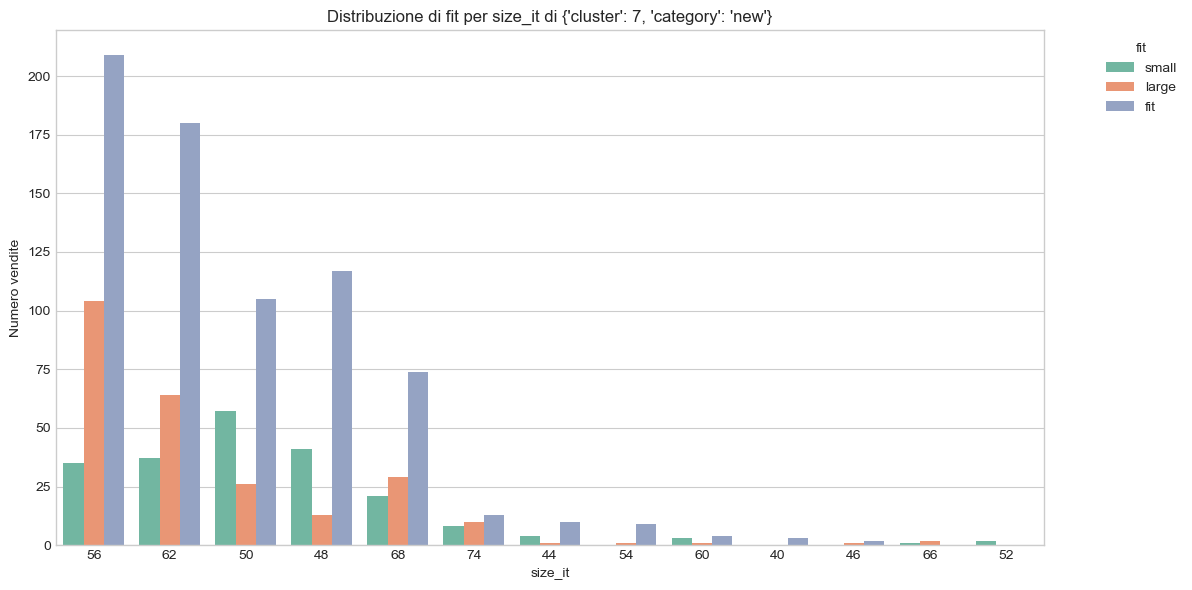

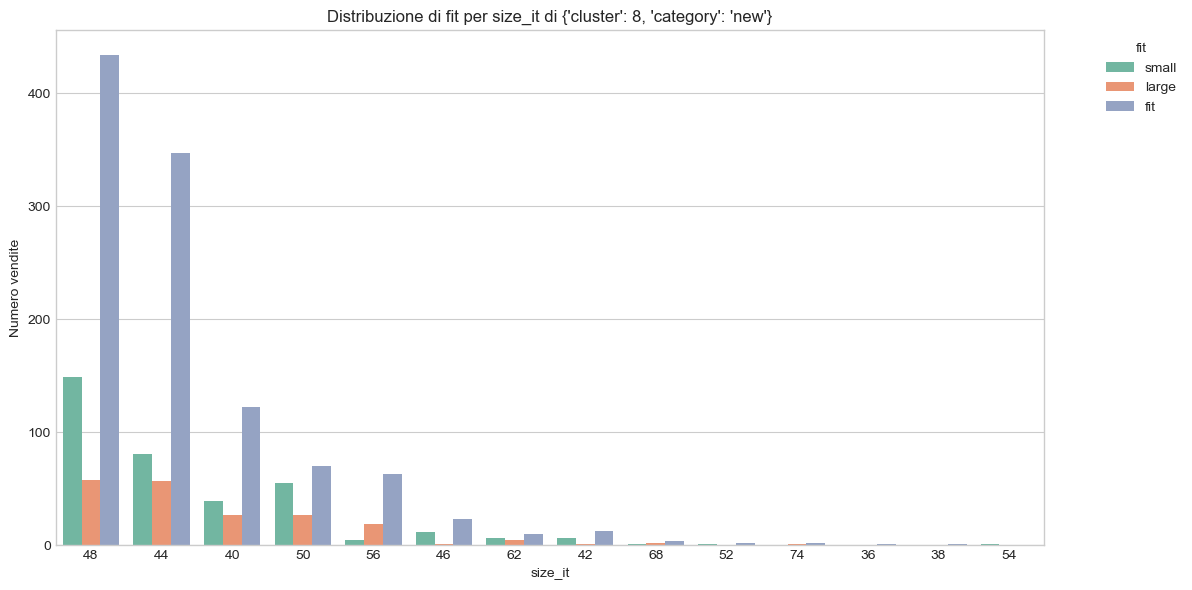

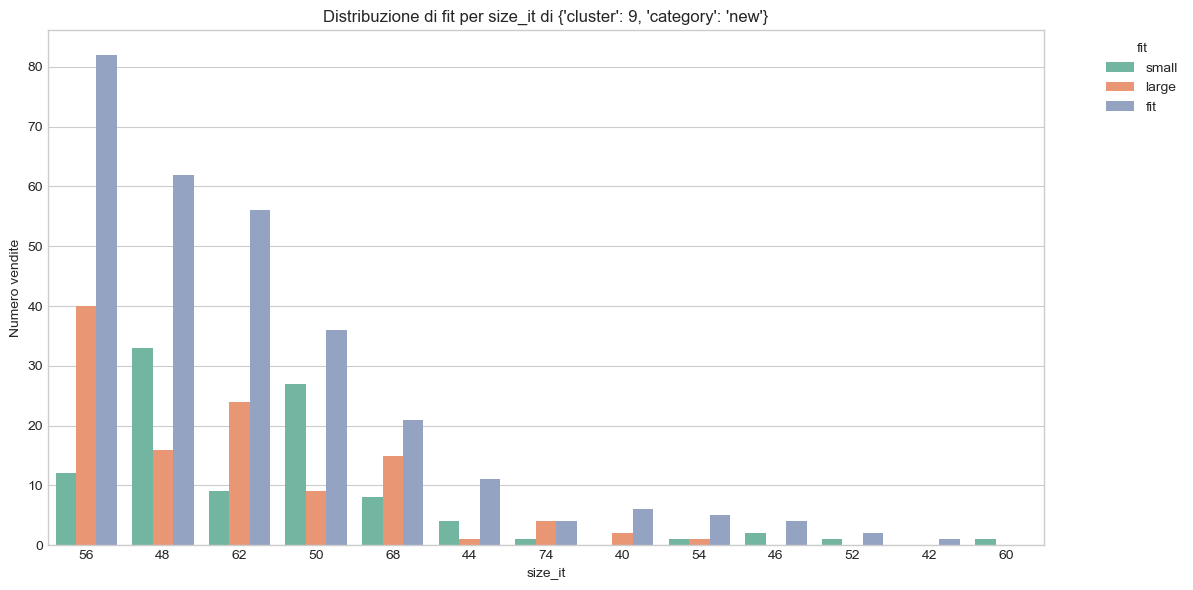

In [254]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='fit',
        filters={'cluster': cluster, 'category':'new'},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

Le taglie che appaiano più adatte per ogni cluster per le categorie interessanti:

Cluster 1 (8434 donne): altezza media, fianchi snelli, circonferenza sottoseno snella, coppa media (B-C).
- Outerwear: 40,44;  Bottom: 40,44;  Dresses: 40,44;  Tops: 40,44;  New: 40,44

Cluster 3 (7323 donne): altezza media, fianchi molto larghi, circonferenza sottoseno media, coppa media (B-C).
- Outerwear: 48,50;  Bottom: 48,44,50;  Dresses: 48;  Tops: 48,44;  New: 48

Cluster 8 (6529 donne): altezza alta, fianchi larghi, circonferenza sottoseno snella, coppa grande (D-DD).
- Outerwear: 48,44,50;  Bottom: 48,44,50;  Dresses: 48,44;  Tops: 48,44;  New: 48,44

Cluster 4 (6378 donne): altezza bassa, fianchi nella media, circonferenza sottoseno snella, coppa grande (D-DD).
- Outerwear: 44,40,48;  Bottom: 44,40,48,42,46;  Dresses: 44,40,48;  Tops: 44,40,48;  New: 44,40,48

Cluster 6 (6082 donne): altezza bassa, fianchi snelli, circonferenza sottoseno snella, coppa media (B-C).
- Outerwear: 40,44;  Bottom: 40,44,36,42;  Dresses: 40,44;  Tops: 40;  New: 40,44

Cluster 5 (5159 donne): altezza alta, fianchi larghi, circonferenza sottoseno media, coppa media (B-C).
- Outerwear: 48,44,50;  Bottom: 48,44,50,46;  Dresses: 44,48;  Tops: 48,44;  New: 48,44

Cluster 2 (4467 donne): altezza bassa, fianchi molto larghi, circonferenza sottoseno robusta, coppa grande (D-DD).
- Outerwear: da 56 a 48;  Bottom: da 56 a 48;  Dresses: da 56 a 48;  Tops: 56,48,62;  New: 56

Cluster 7 (4398 donne): altezza alta, fianchi molto larghi, circonferenza sottoseno robusta, coppa grande (D-DD).
- Outerwear: da 62 a 50;  Bottom: da 68 a 50;  Dresses: da 62 a 48;  Tops: da 62 a 48;  New: da 62 a 48

Cluster 0 (3311 donne): altezza media, fianchi molto larghi, circonferenza sottoseno robusta, coppa grande (D-DD).
- Outerwear: 62;  Bottom: da 70 a 62;  Dresses: 62,68;  Tops: 68,62;  New: 68,62,74

Cluster 9 (2012 donne): altezza media, fianchi molto larghi, circonferenza sottoseno media, coppa molto grande (E+).
- Outerwear: da 62 a 48;  Bottom: da 62 a 48;  Dresses: da 62 a 48;  Tops: da 62 a 48;  New: 62,48

Si può notare che le differenze all'interno dello stesso cluster per ogni categoria sono davvero minime ma a volte possono esserci. Bottoms è la categoria dove in quasi tutti i cluster le taglie sono più variegate.
Adesso è interessante vede, per tutte le categorie insieme, la distribuzione della lunghezza percepita dell'articolo catalogato 'fit' per ogni cluster:

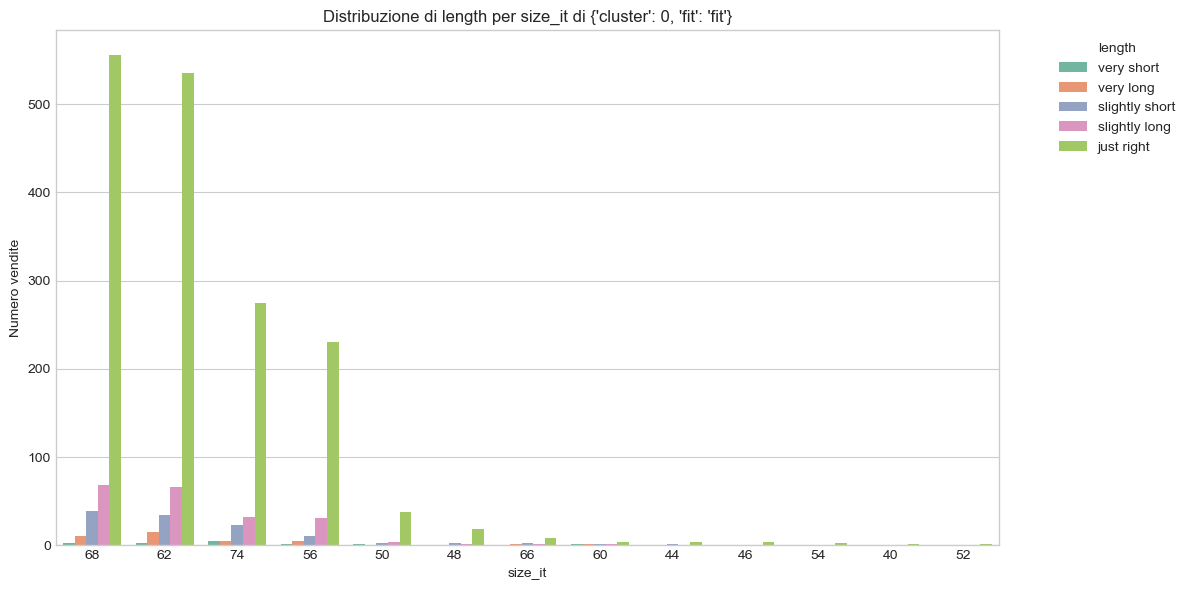

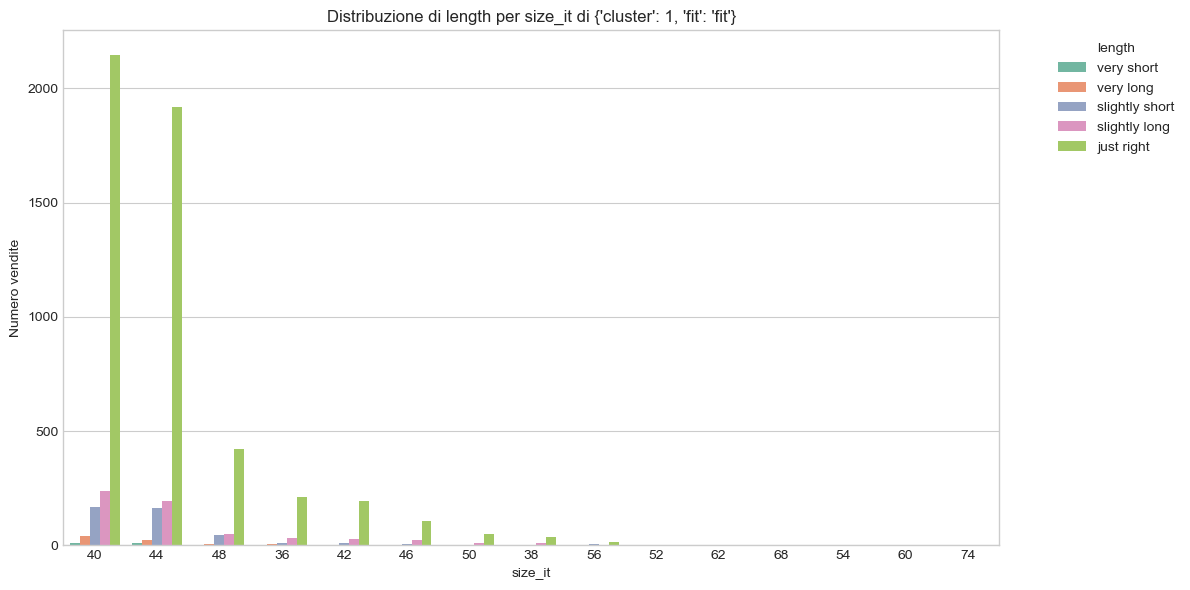

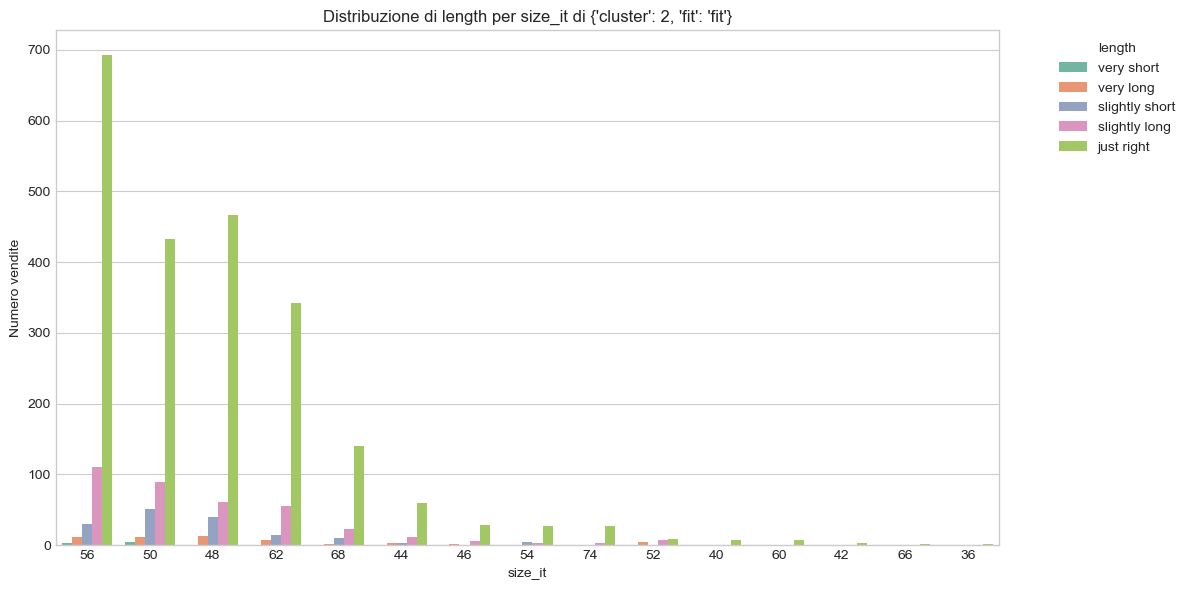

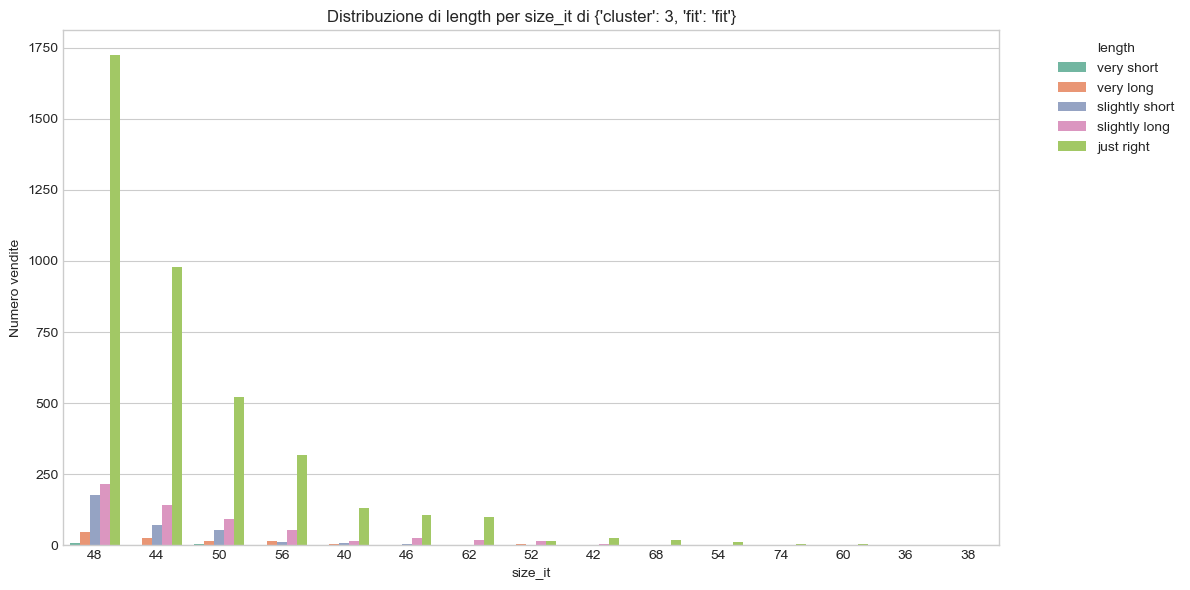

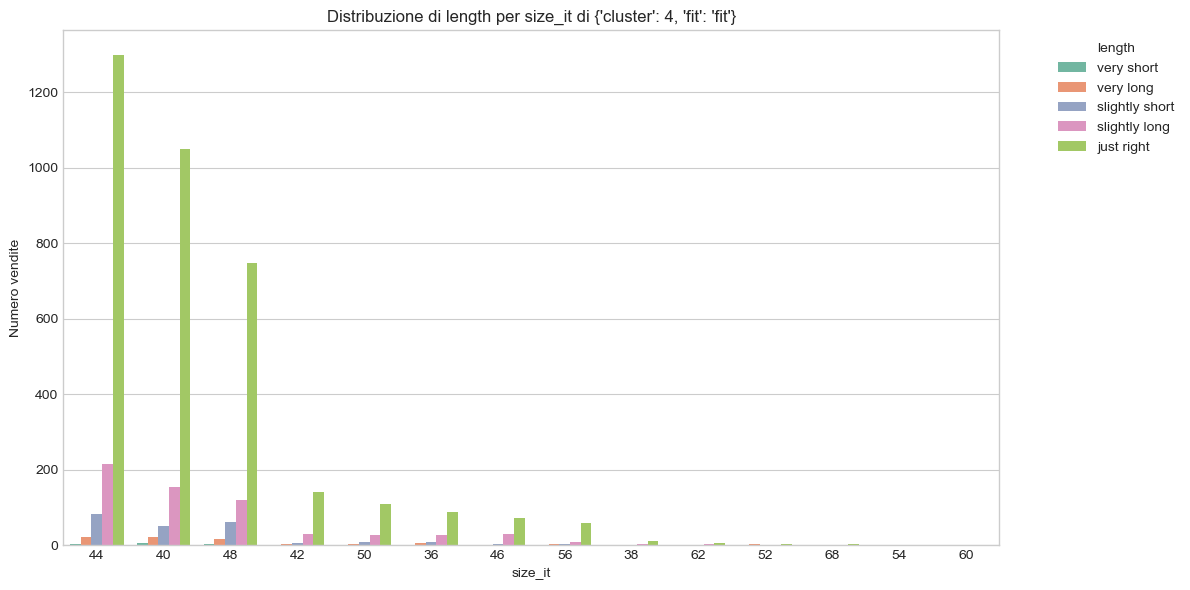

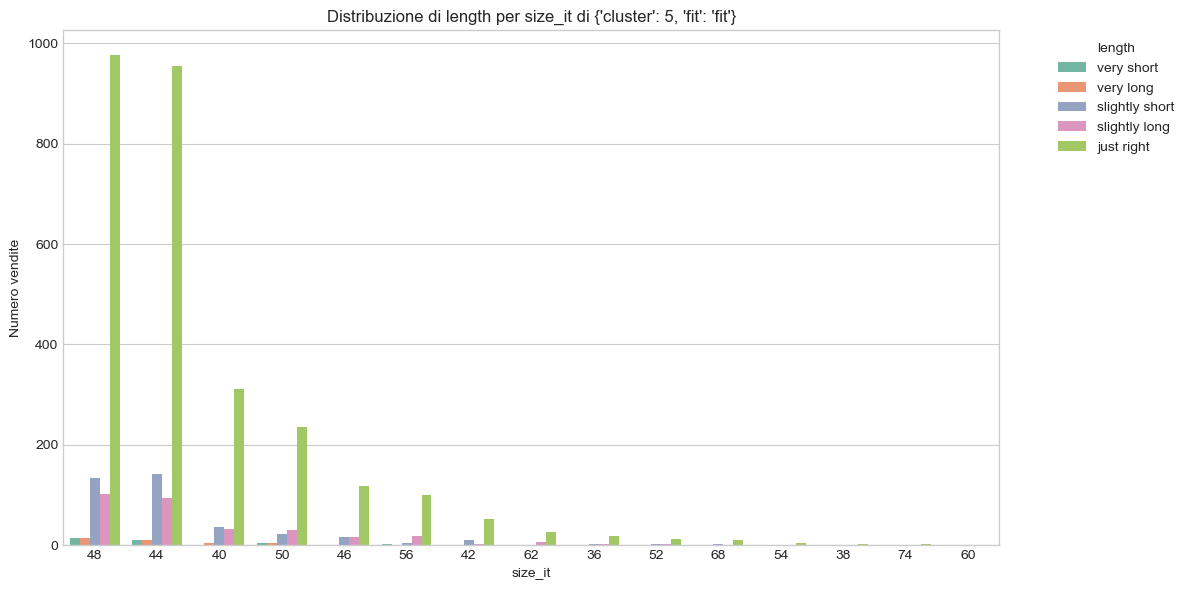

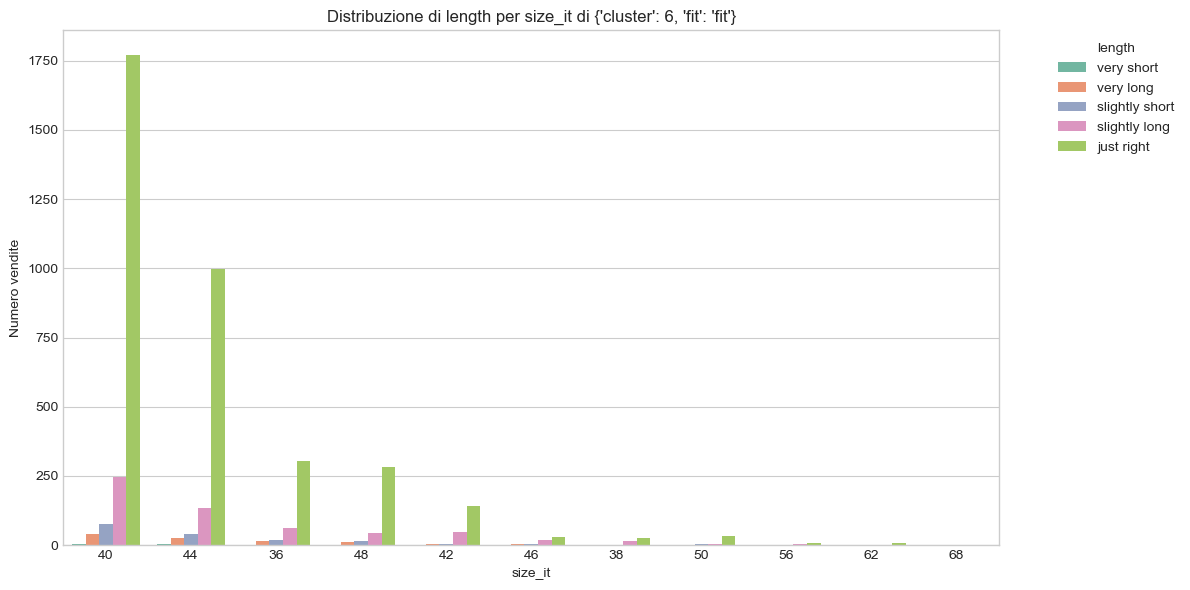

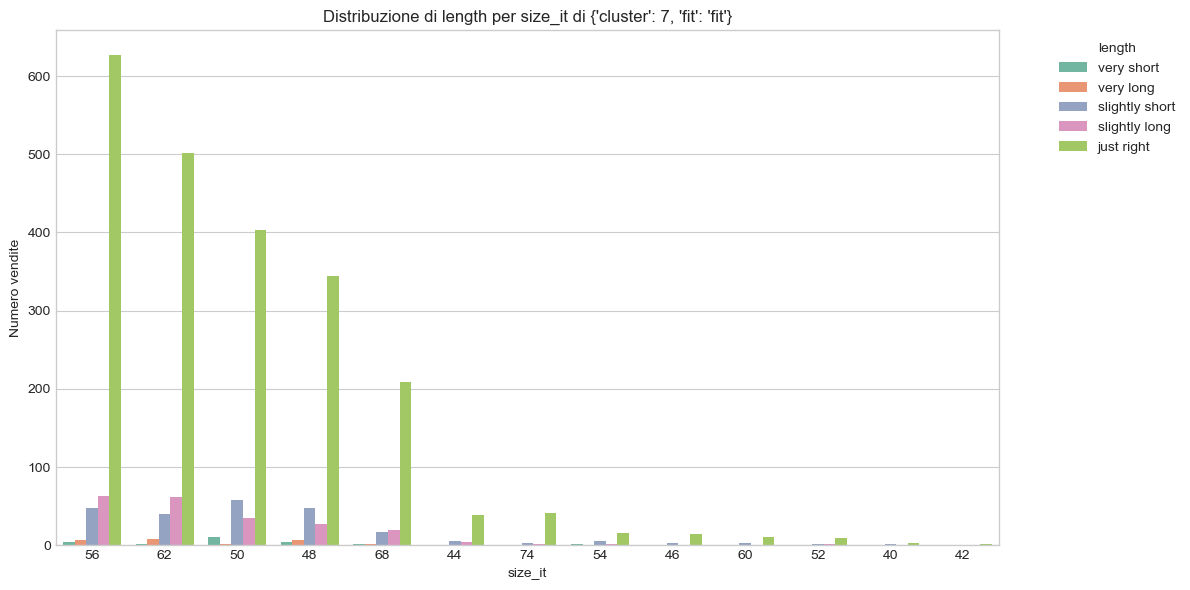

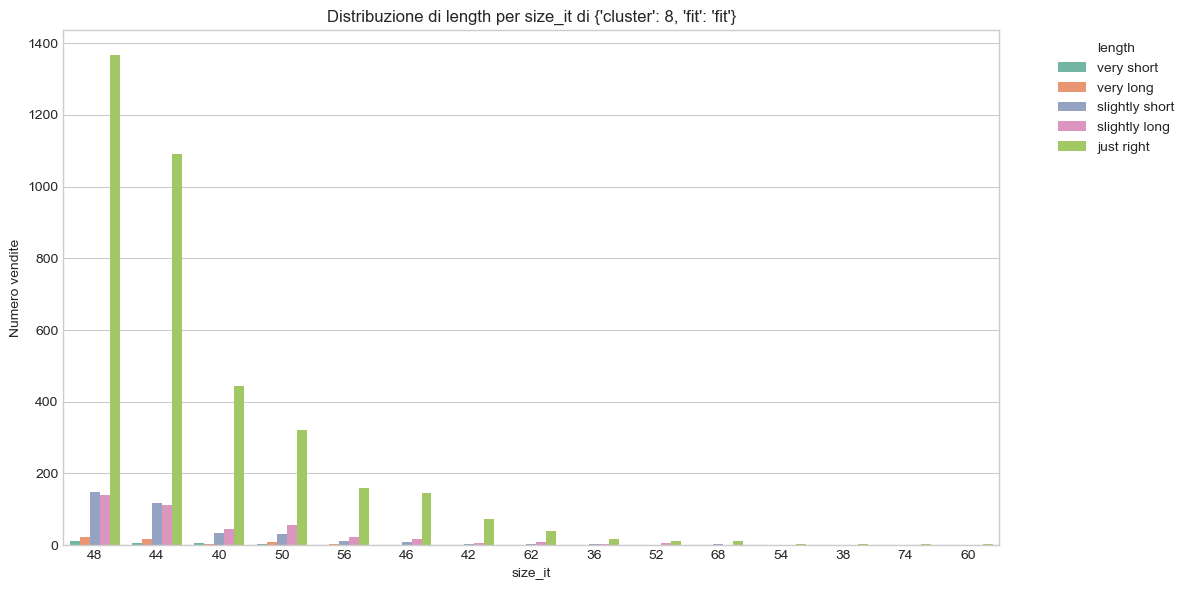

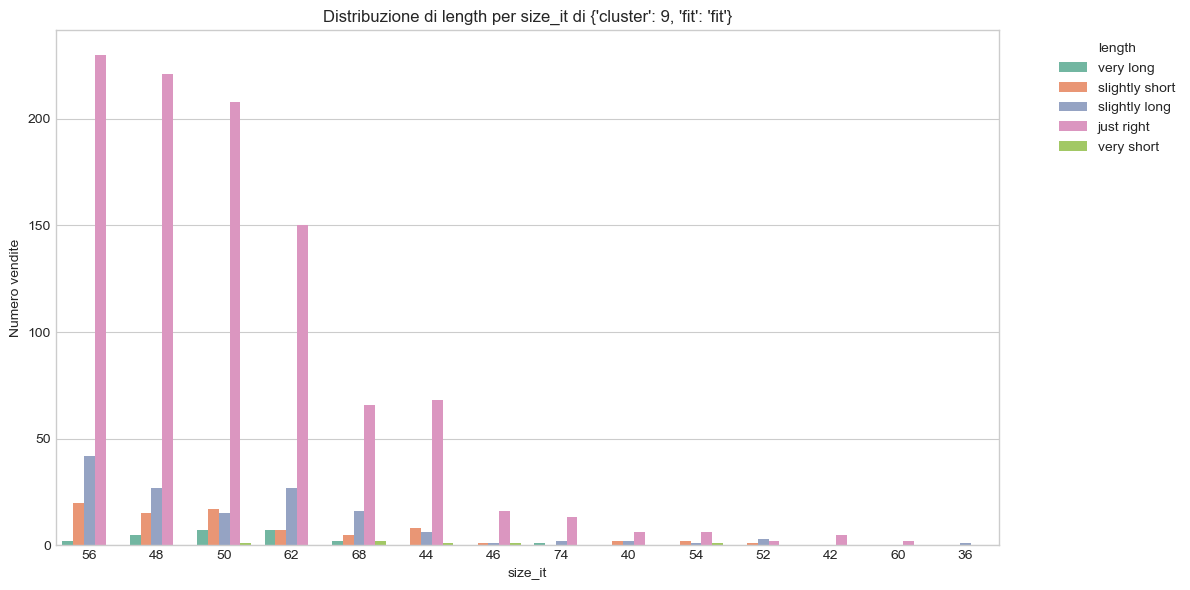

In [256]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='length',
        filters={'cluster': cluster, 'fit':'fit'},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

Non si riscontrano anomali da questo punto di vista: in ogni cluster sono minime le recensioni che 
ad un aderenza corretta non corrispondano una lunghezza corretta. Inoltre, la maggior parte delle eccezioni 
riporta 'slightly', quindi una sfumatura molto soggettiva e non troppo rilevante.
Adesso si può indagare sulla qualità totale riportata per ogni taglia per ogni cluster senza filtrare altre condizioni:

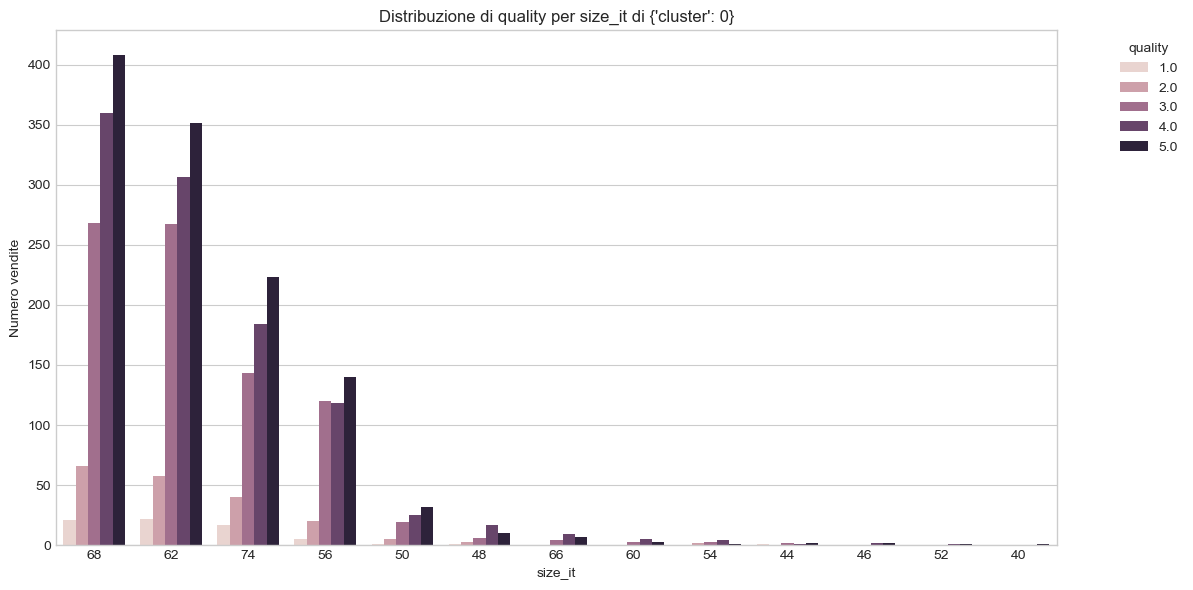

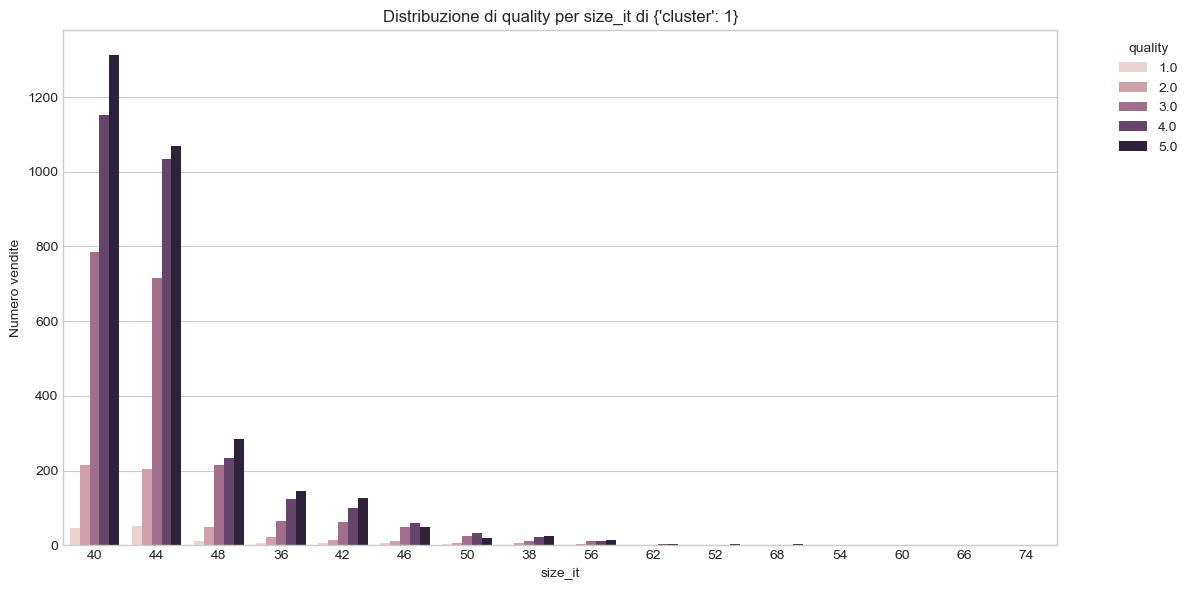

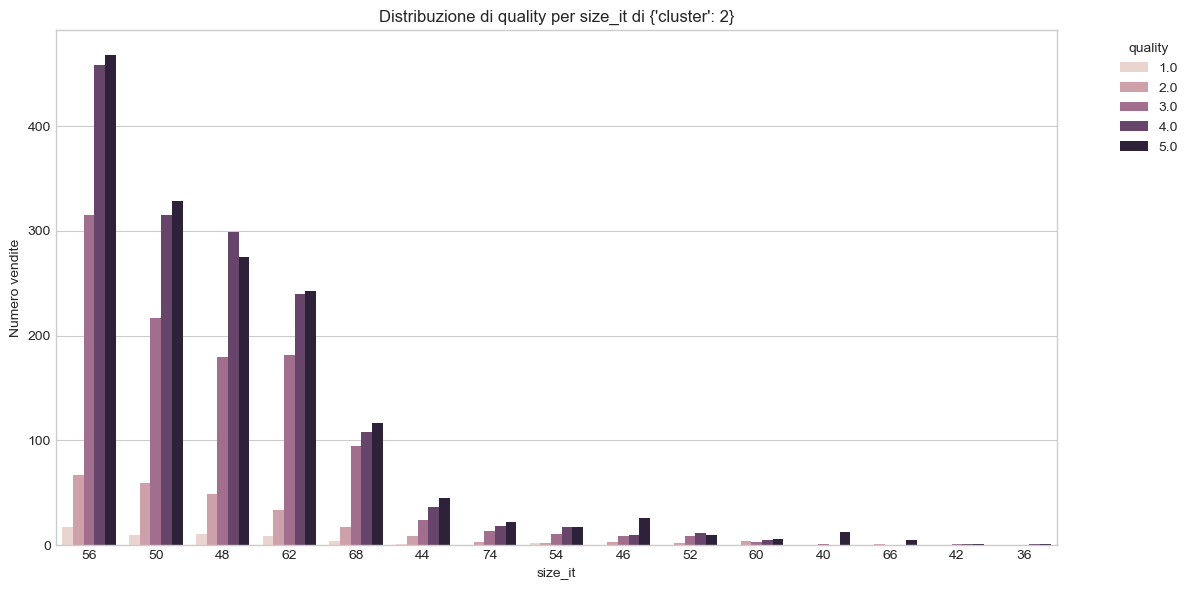

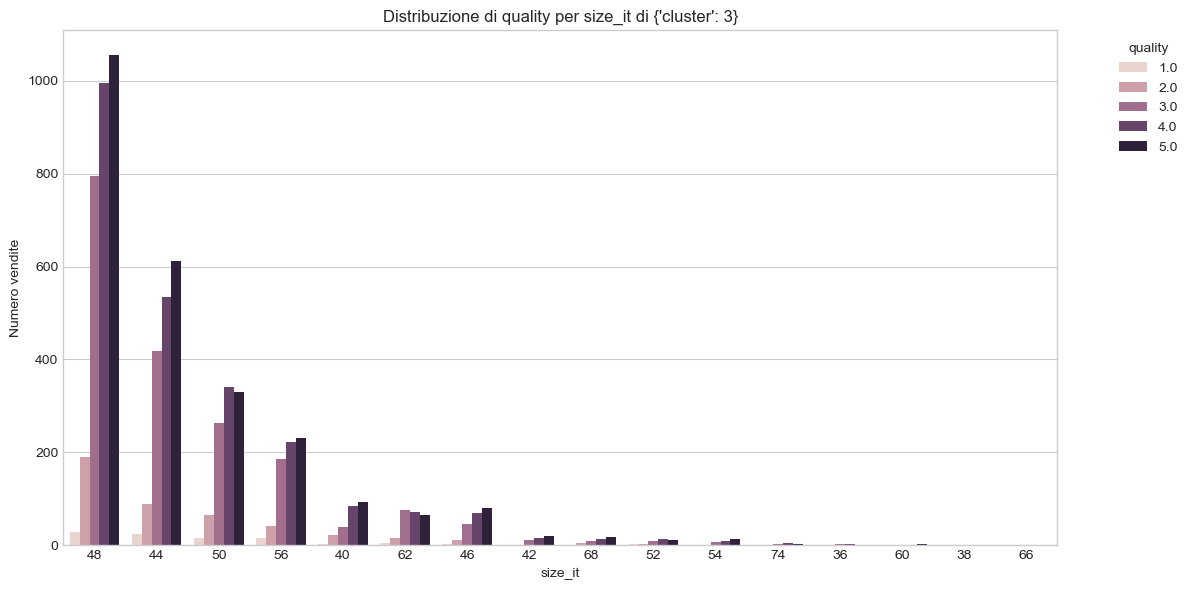

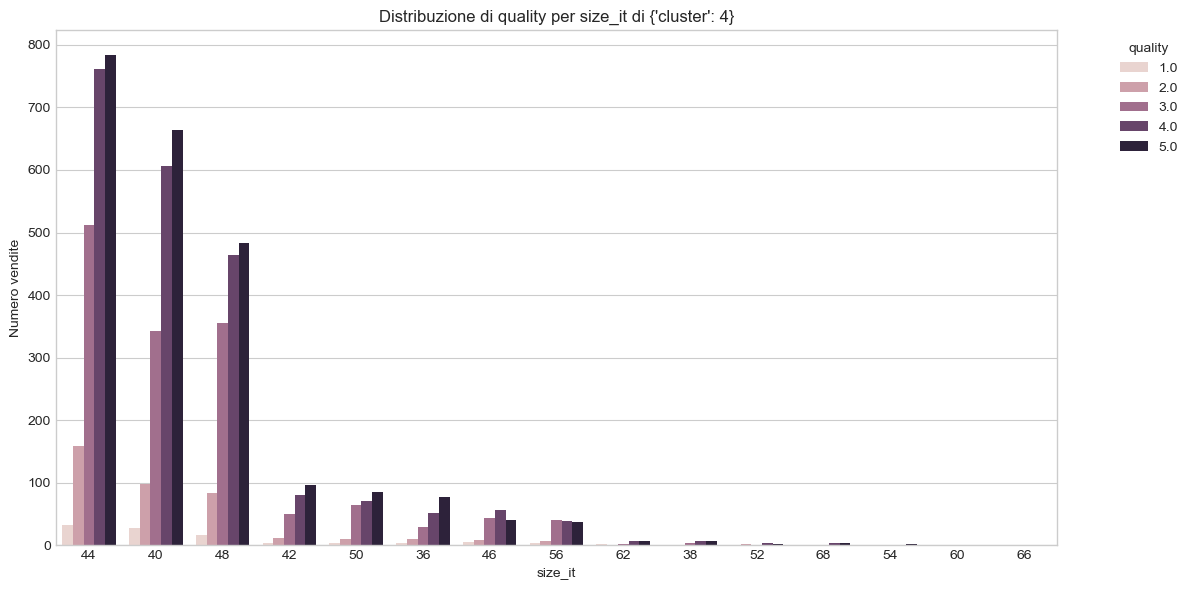

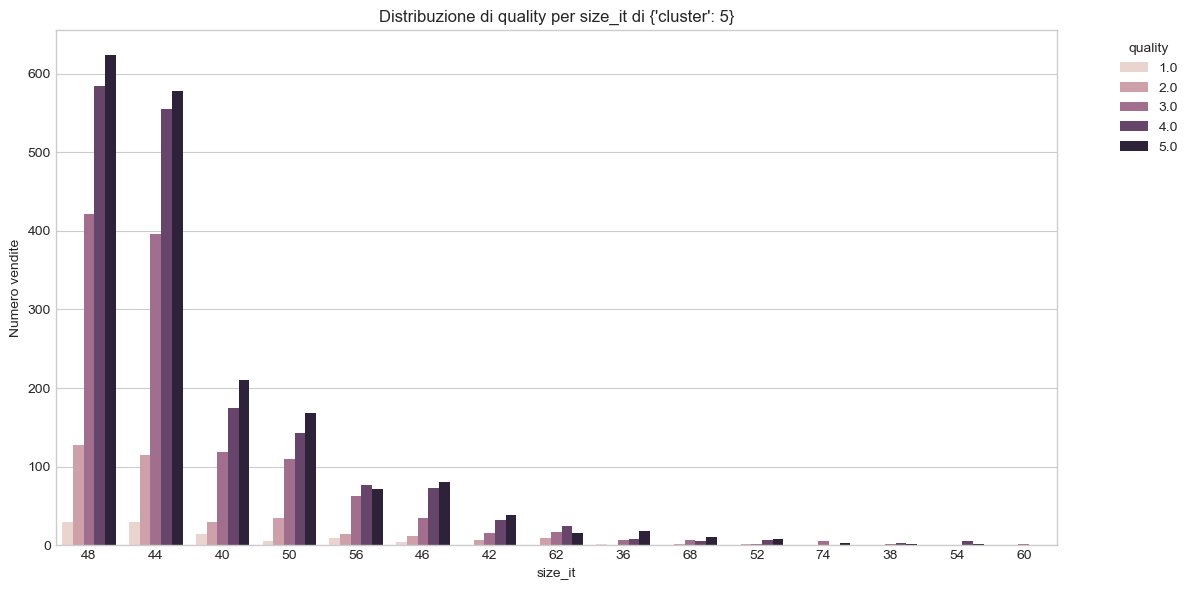

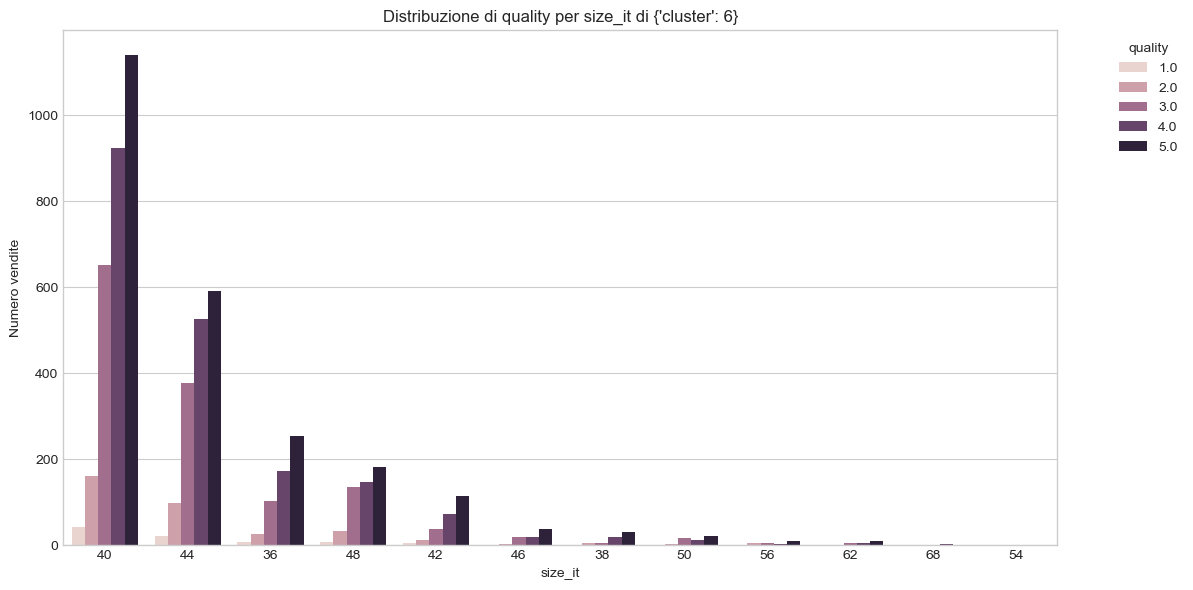

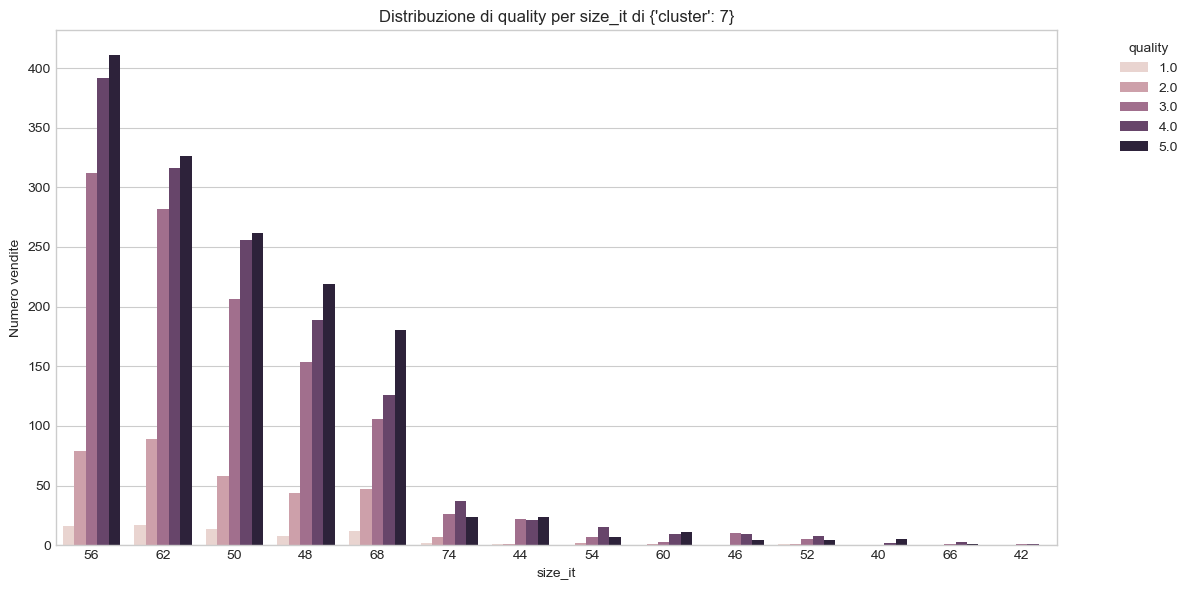

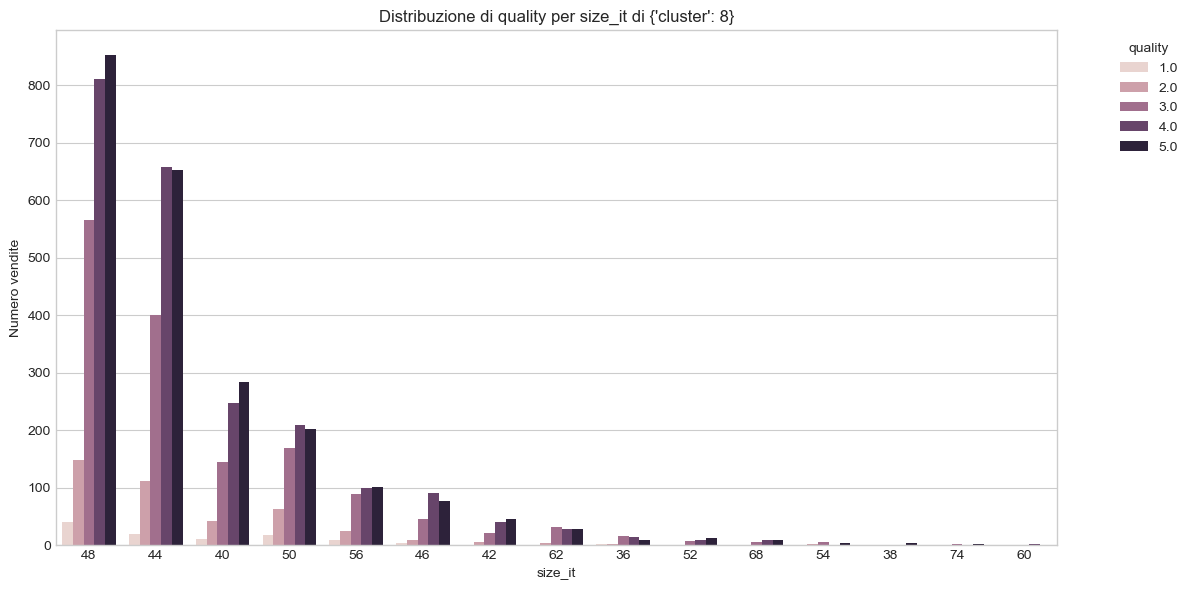

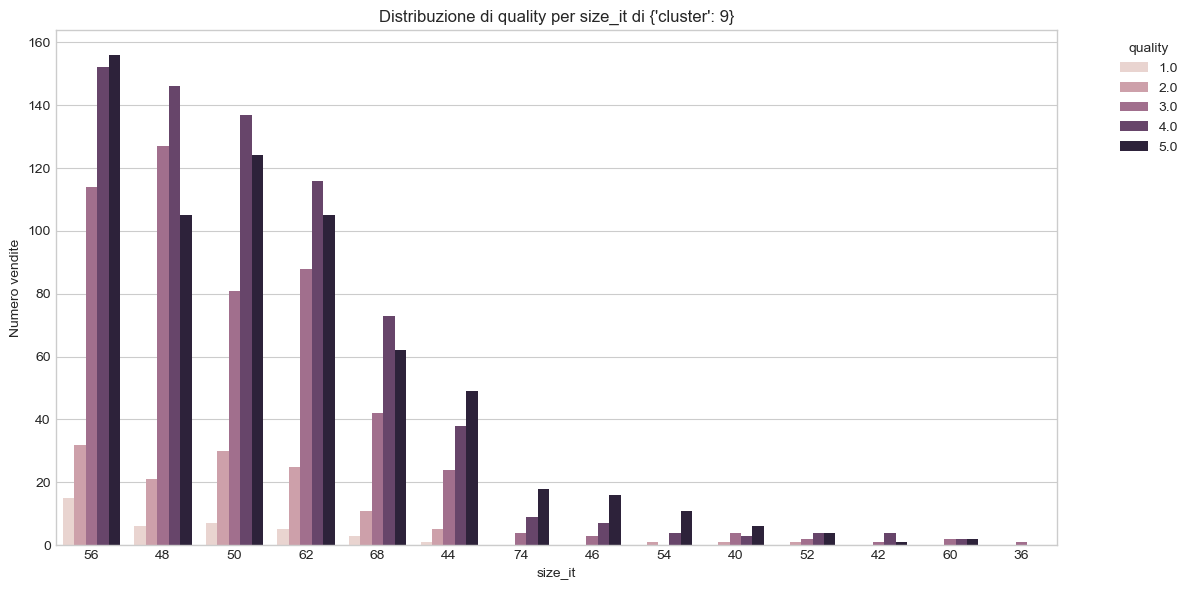

In [257]:
nested_quality_by_size = {}

for cluster in sorted(df_clustering['cluster'].unique()):
    distrib = plot_nested_distribution(
        df_clustering,
        group_col='size_it',
        target_col='quality',
        filters={'cluster': cluster,},
        normalize_within_group=True,
        kind='bar'
    )
    nested_quality_by_size[cluster] = distrib
    #print(f"\nDistribuzione qualità per taglia nel cluster {cluster}:\n{distrib}")

è interessante notare come innanzitutto le recensioni da 1 o 2 stelle siano complessivamente un numero 
minimo rispetto al totale. Invece 3,4,5 stelle complessivamente hanno una distribuzione molto simile tra loro:
infatti, in nessuna taglia di nessun cluster le 5 stelle spiccano ampiamente sulle altre recensioni, 
hanno sempre un quantitativo molto simile di 4 stelle, e 3 stelle sempre poco dietro. 
Addirittura nel cluster 9 per 4 taglie molto acquistate le recensioni 4 stelle (a volte anche 3) sono più 
presenti delle 5 stelle.
Da questo si deduce quanto la qualità vera e propria del prodotto conta nella considerazione del cliente,
ed è importante valutare attentamente la recensine scritta.
Prima di questo però, prendendo in esame i due esempi più estremi, ovvero la taglia 48 del cluster 9 e 
la taglia 40 del cluster 6, si possono vedere i grafici della qualità percepita in base alla lunghezza e fit:

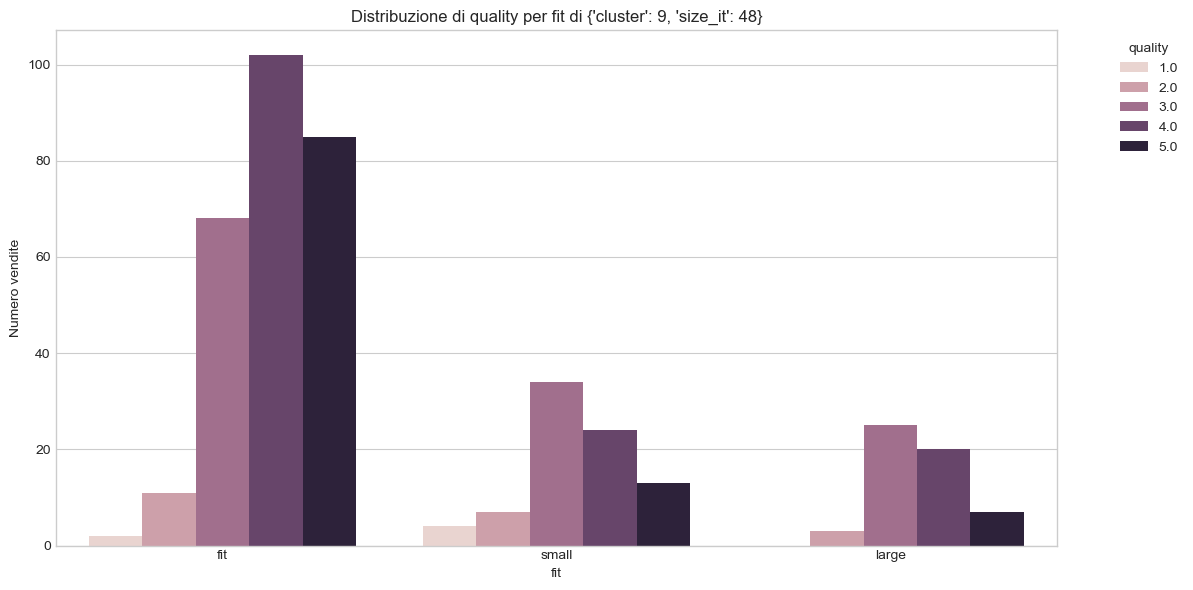

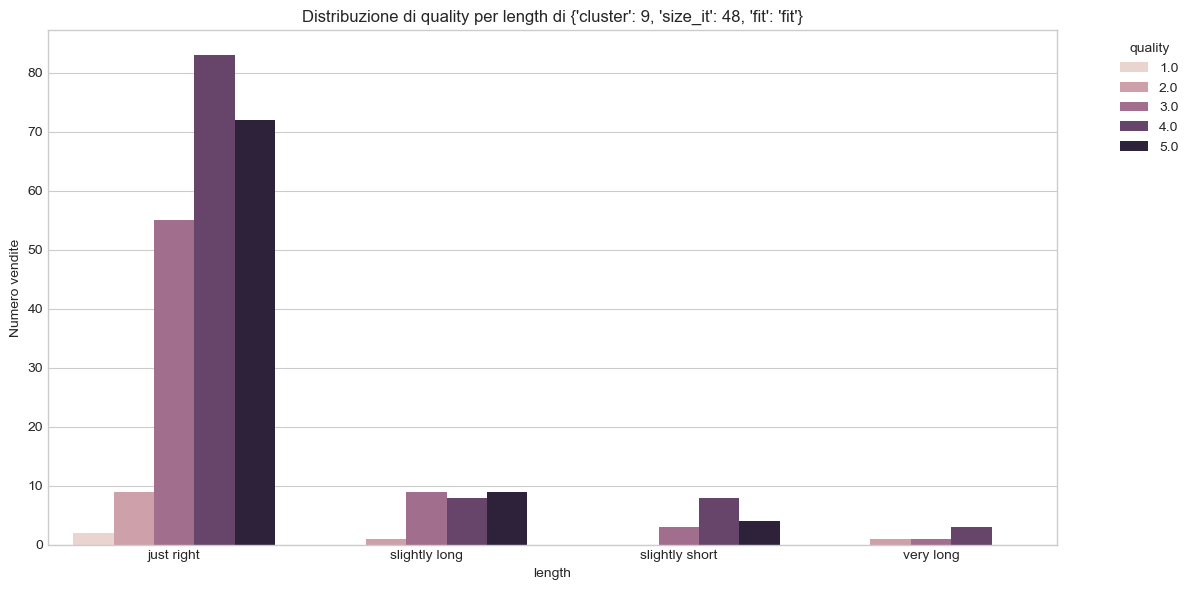

In [268]:
df_counts, (fig, ax) = plot_nested_distribution(
    df_clustering,
    group_col= 'fit',
    target_col='quality',
    filters={'cluster': 9, 'size_it': 48},
    normalize_within_group=True,
    kind='bar')

df_counts, (fig, ax) = plot_nested_distribution(
    df_clustering,
    group_col= 'length',
    target_col='quality',
    filters={'cluster': 9, 'size_it': 48, 'fit':'fit'},
    normalize_within_group=True,
    kind='bar')

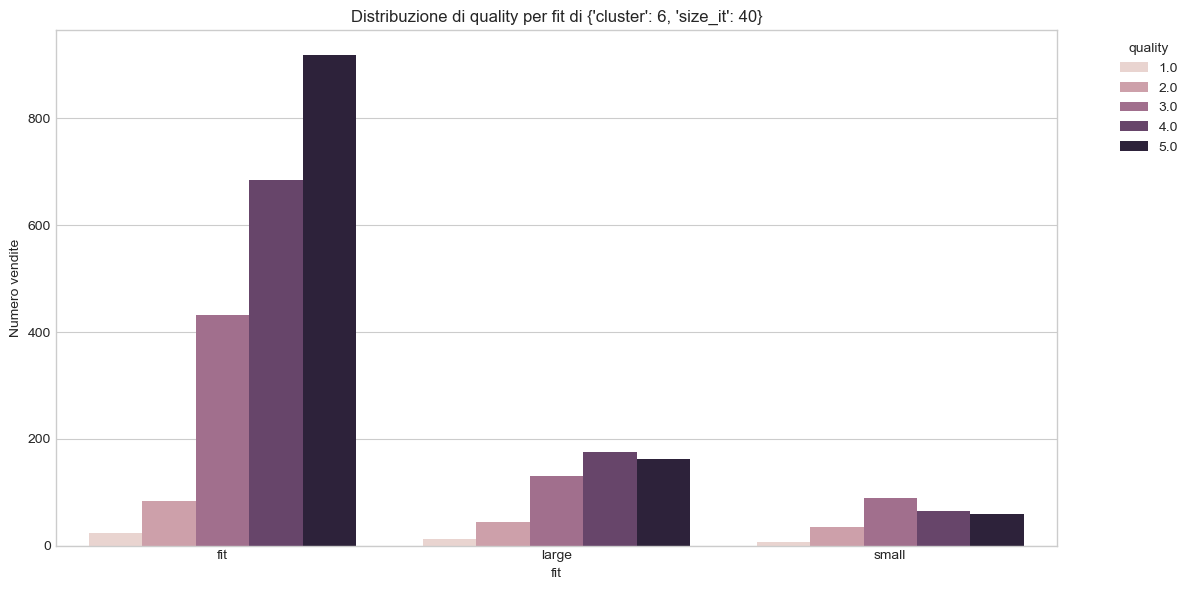

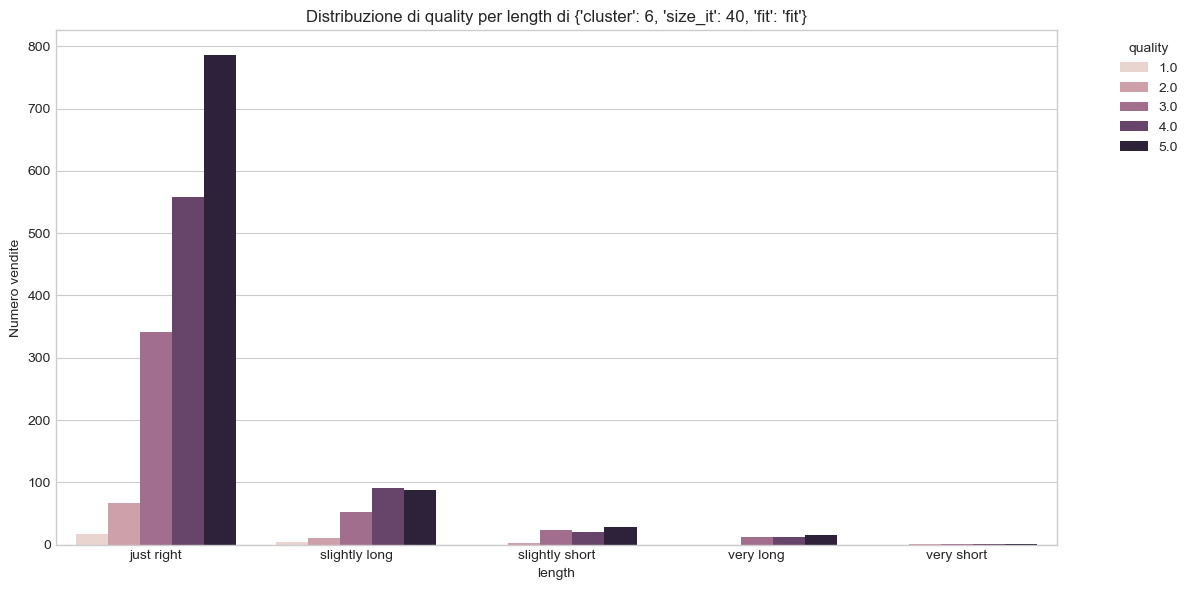

In [269]:
df_counts, (fig, ax) = plot_nested_distribution(
    df_clustering,
    group_col= 'fit',
    target_col='quality',
    filters={'cluster': 6, 'size_it': 40},
    normalize_within_group=True,
    kind='bar')

df_counts, (fig, ax) = plot_nested_distribution(
    df_clustering,
    group_col='length',
    target_col='quality',
    filters={'cluster': 6, 'size_it': 40, 'fit':'fit'},
    normalize_within_group=True,
    kind='bar')

Da questi 4 grafici emerge la situazione della percezione della qualità in base all'aderenza e alla lunghezza 
del capo della combo taglia-cluster merno apprezzata e di quella più apprezzata. 
Appare davvero chiaro come non vi è una correlazione tra aderenza corretta e apprezzamento massimo.
è opportuno adesso leggere le recensioni scritte di entrambe per valutare quello che pensano le clienti:

In [272]:
def mostra_review_testuali(df, filters=None, n=None):
    """
    Estrae e visualizza chiaramente le review testuali ('review_text') da un DataFrame
    applicando filtri precisi su colonne come 'cluster', 'category', 'fit', ecc.

    Parametri:
    - df: DataFrame da cui estrarre le review
    - filters: dizionario con le condizioni di filtro, es. {'cluster': 2, 'category': 'dresses', 'fit': 'small'}
    - n: numero massimo di review da mostrare

    Output:
    - Stampa ordinata delle review selezionate con eventuale info aggiuntiva (es. item_id o user_name)
    """
    df_filtrato = df.copy()
    if filters:
        for col, val in filters.items():
            df_filtrato = df_filtrato[df_filtrato[col] == val]
    
    # Rimuove righe con review vuote o nulle
    df_filtrato = df_filtrato[df_filtrato['review_text'].notna() & (df_filtrato['review_text'].str.strip() != '')]
    
    # Mostra le prime n review con un contesto utile
    for i, row in df_filtrato.head(n).iterrows():
        print(f"\n--- REVIEW #{i} ---")
        print(f"Item ID: {row.get('item_id', 'N/A')} | Utente: {row.get('user_name', 'N/A')}")
        print(f"Categoria: {row.get('category', 'N/A')} | Fit: {row.get('fit', 'N/A')} | Cluster: {row.get('cluster', 'N/A')}")
        print(f"Review:\n{row['review_text']}")


In [275]:
mostra_review_testuali(df_clustering, 
                       filters={'cluster': 9, 'size_it': 48, 'fit': 'fit', 'quality': 3.0})


--- REVIEW #4371 ---
Item ID: 152702 | Utente: annaonacoustic
Categoria: new | Fit: fit | Cluster: 9
Review:
Have worn this dress to formal events for the last year now and I still love this dress  the color is fantastic and it's actually very comfortable!

--- REVIEW #5237 ---
Item ID: 155530 | Utente: phardilek
Categoria: wedding | Fit: fit | Cluster: 9
Review:
I don't think it hits right at the stomach, and think it accentuates that I don't have a flat stomach and makes me look larger. I'm undecided on keeping it, since it was incredibly comfortable and not expensive.

--- REVIEW #5548 ---
Item ID: 161514 | Utente: talulaspongecake
Categoria: dresses | Fit: fit | Cluster: 9
Review:
LOVE This dress.  Bought it for a casual wedding, and it's perfect. The length is just right. The fabric has stretch, so it fits tight at the top and flows from the waist down.

--- REVIEW #5721 ---
Item ID: 161514 | Utente: Ultra
Categoria: dresses | Fit: fit | Cluster: 9
Review:
This dress will go well

Queste recensioni 3 stelle non sono quasi mai negative e alcune sembrano completamente positive.
Nelle recensioni con dei punti critici, le utenti, nonostante esprimano apprezzamenti verso l'articolo, spiegano perchè non siano pienamente soddisfatte:
- alcune parti non aderiscono perfettamente al proprio corpo nonostante il resto sì creando un aspetto strano;
- il tessuto non è di grande qualità, oppure si stropiccia facilmente o vi sono dei difetti sulla lampo;
- a volte il tessuto è troppo leggero per essere utilizzato in autunno;
- l'indumento a volte non è pratico da indossare perchè richiede necessariamente il lavaggio a mano;
- comprare fuori dagli Stati Uniti comporta un consistente sovrapprezzo.

è abbastanza chiaro che non vi è una motivazione precisa che giustifica i risultati di questo esempio, ma anzi si nota come nella sostanza il voto 3 stelle non sia percepito dall'utente come negativo.

Può essere interessante fare il confronto tra le misure delle donne che hanno aquistato le taglie 
dei due cluster prese in considerazione prima:

In [312]:
def scatter_hips_taglia(df, cluster_id=None, size_it=None):
    """
    Crea un grafico a dispersione delle misure dei fianchi ('hips_cm') 
    e del sottoseno (cm) per tutte le donne che appartengono a un determinato 
    cluster e hanno acquistato una specifica taglia italiana ('size_it').

    Parametri:
    - df: DataFrame contenente le colonne 'cluster', 'size_it' e 'hips_cm'
    - cluster_id: id del cluster da filtrare (es. 1, 2, 3...)
    - size_it: taglia italiana da considerare (es. 42, 44...)

    Output:
    - Mostra un grafico a dispersione con un punto per ogni osservazione
    """
    df_filtered = df[
        (df['cluster'] == cluster_id) &
        (df['size_it'] == size_it) &
        df['hips_cm'].notna() &
        df['bra_size_cm'].notna()
    ]

    if df_filtered.empty:
        print(f"Nessun dato trovato per cluster {cluster_id} e taglia {size_it}.")
        return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x='bra_size_cm', y='hips_cm', alpha=0.6)
    plt.title(f"Distribuzione delle misure fianchi (hips) - Cluster {cluster_id}, Taglia {size_it}")
    plt.xlabel("Sottoseno (cm)")
    plt.ylabel("Fianchi (cm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

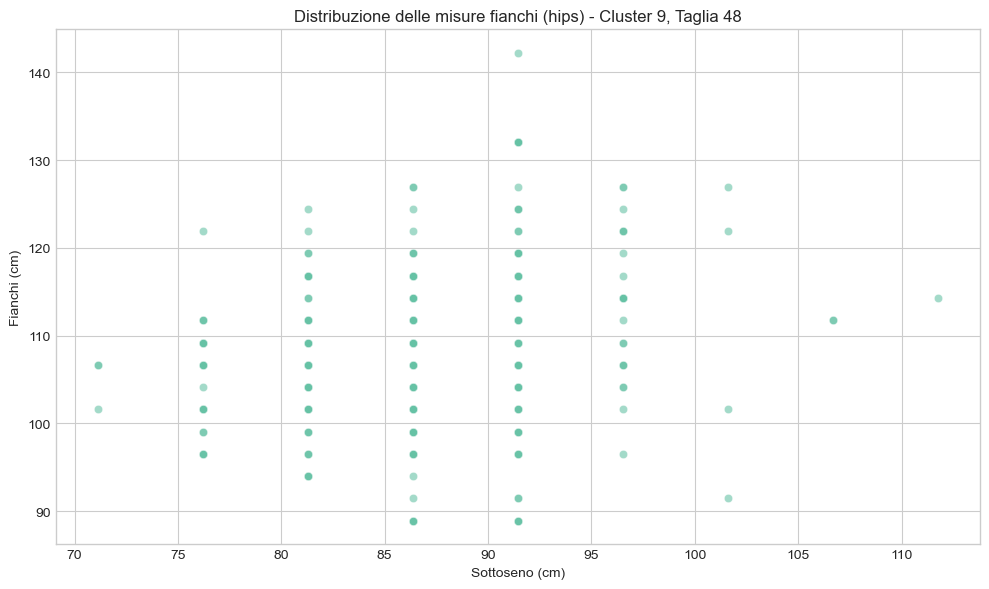

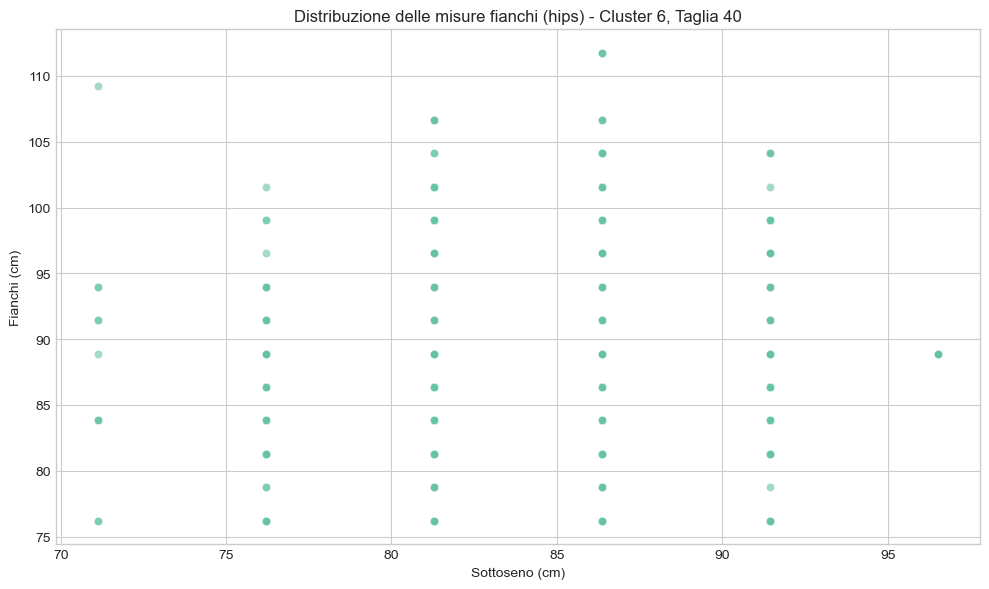

In [283]:
scatter_hips_taglia(df_clustering, cluster_id=9, size_it=48)
scatter_hips_taglia(df_clustering, cluster_id=6, size_it=40)

Questa differenza di percezione di soddisfazione del prodotto può essere dovuta alla grande varietà di misure sottoseno e fianchi delle donne del cluster 9 rispetto a quelle del cluster 6. Adeso è utile anche un confronto generale sulla 'quality':

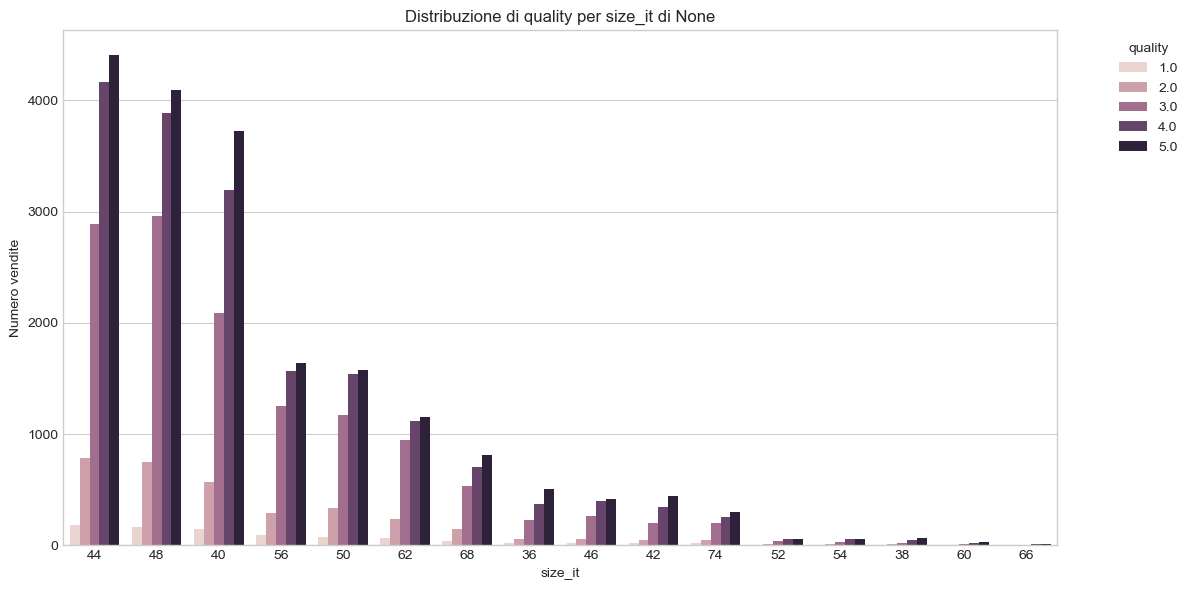

In [290]:
df_counts, (fig, ax) = plot_nested_distribution(
    df_clustering,
    group_col= 'size_it',
    target_col='quality',
    normalize_within_group=True,
    kind='bar')

La stessa tendenza si può notare chiaramente anche senza prendere in considerazione i cluster. Adesso può essere interessante raggruppare la 'quality' per ogni articolo, così da valutare se vi è qualche articolo particolarmente apprezzato:

In [302]:
get_nested_distribution2(
    df_clustering,
    group_col= 'item_id',
    target_col= 'quality',
    normalize_within_group=True).head(50)

item_id  quality  count  proportion
0   539980      5.0    516       38.45
1   539980      4.0    457       34.05
2   539980      3.0    306       22.80
3   539980      2.0     49        3.65
4   539980      1.0     14        1.04
5   668696      5.0    503       48.60
6   668696      4.0    332       32.08
7   668696      3.0    155       14.98
8   668696      2.0     36        3.48
9   668696      1.0      9        0.87
10  397005      5.0    349       35.50
11  397005      4.0    402       40.90
12  397005      3.0    190       19.33
13  397005      2.0     36        3.66
14  397005      1.0      6        0.61
15  175771      5.0    327       35.12
16  175771      4.0    327       35.12
17  175771      3.0    236       25.35
18  175771      2.0     33        3.54
19  175771      1.0      8        0.86
20  407134      5.0    211       23.98
21  407134      4.0    267       30.34
22  407134      3.0    263       29.89
23  407134      2.0    102       11.59
24  407134      1.0     37        4.20
25  391519      5.0    327       41.03
26  391519      4.0    286       35.88
27  391519      3.0    150       18.82
28  391519      2.0     27        3.39
29  391519      1.0      7        0.88
30  412737      5.0    157       21.33
31  412737      4.0    229       31.11
32  412737      3.0    236       32.07
33  412737      2.0    103       13.99
34  412737      1.0     11        1.49
35  169727      5.0    124       17.89
36  169727      4.0    239       34.49
37  169727      3.0    237       34.20
38  169727      2.0     79       11.40
39  169727      1.0     14        2.02
40  757731      5.0    256       37.98
41  757731      4.0    241       35.76
42  757731      3.0    127       18.84
43  757731      2.0     38        5.64
44  757731      1.0     12        1.78
45  486643      5.0    162       24.04
46  486643      4.0    218       32.34
47  486643      3.0    190       28.19
48  486643      2.0     81       12.02
49  486643      1.0     23        3.41

Negli articoli più numerosi nessuno spicca per recensioni 4 stelle. Essendo la lista estremamente ampia è oppurtuno applicare dei filtri per vedere se la valutazione 5.0 di qualche articolo raggiunge cifre consistenti e valutare anche a quale categoria appartengono:

In [310]:
df_quality = get_nested_distribution2(
    df_clustering,
    group_col='item_id',
    target_col='quality',
    normalize_within_group=True
)

# Filtra le righe con percentuale > 50 e count > 50
filtro = (df_quality['proportion'] > 50) & (df_quality['count'] > 50)
df_filtrato = df_quality[filtro]

df_items_category = df_clustering[['item_id', 'category']].drop_duplicates()

# Fai il merge con il risultato filtrato
df_filtrato_con_categoria = df_filtrato.merge(df_items_category, on='item_id', how='left')

# Visualizza
display(df_filtrato_con_categoria)

item_id  quality  count  proportion   category
0    269063      5.0    227       50.11    dresses
1    806856      5.0    232       54.08  outerwear
2    806479      5.0    223       53.10  outerwear
3    723977      5.0    215       52.06    bottoms
4    400541      5.0    191       57.19    dresses
5    445254      5.0    155       57.20       tops
6    171740      5.0    138       55.65    dresses
7    659701      5.0    127       57.21        new
8    394692      5.0     83       56.08       sale
9    417269      5.0     63       54.78        new
10   155530      5.0     52       55.91    wedding

La valutazione 5.0 supera il 50% solo di 11 articoli, e non raggiunge mai il 60%. Non sono percentuali troppo rilevanti e compare ognuna delle 7 categoria almeno una volta.

è interessante vedere quale è la distribuzine generale delle misure delle donne che hanno acquistato una taglia, per ogni tagllia:

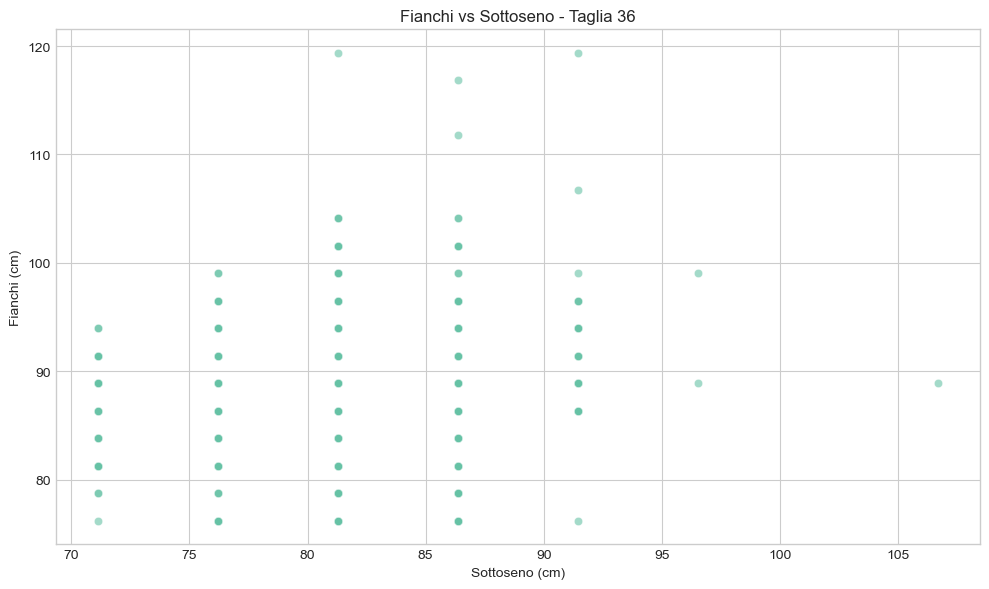

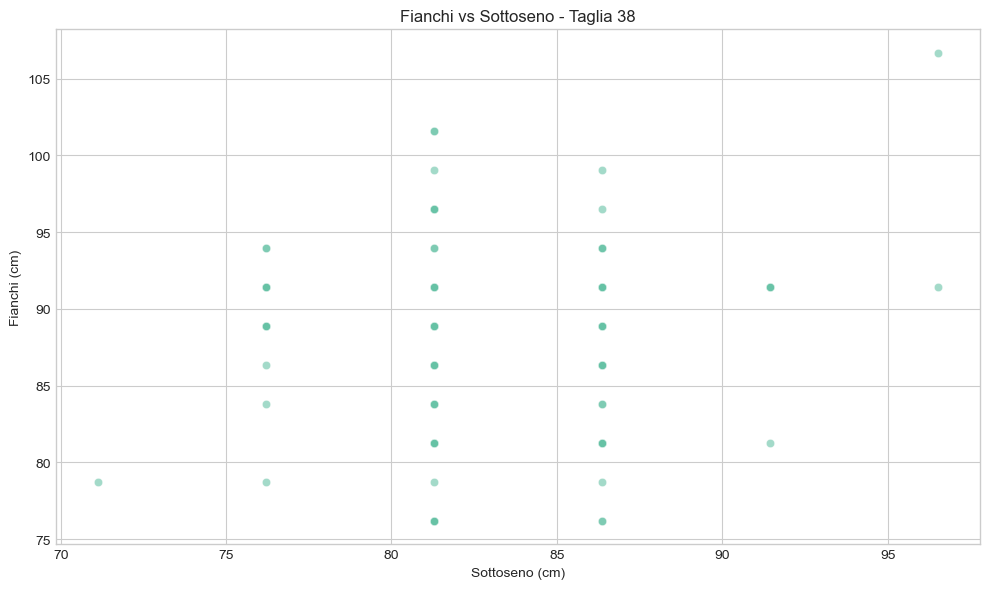

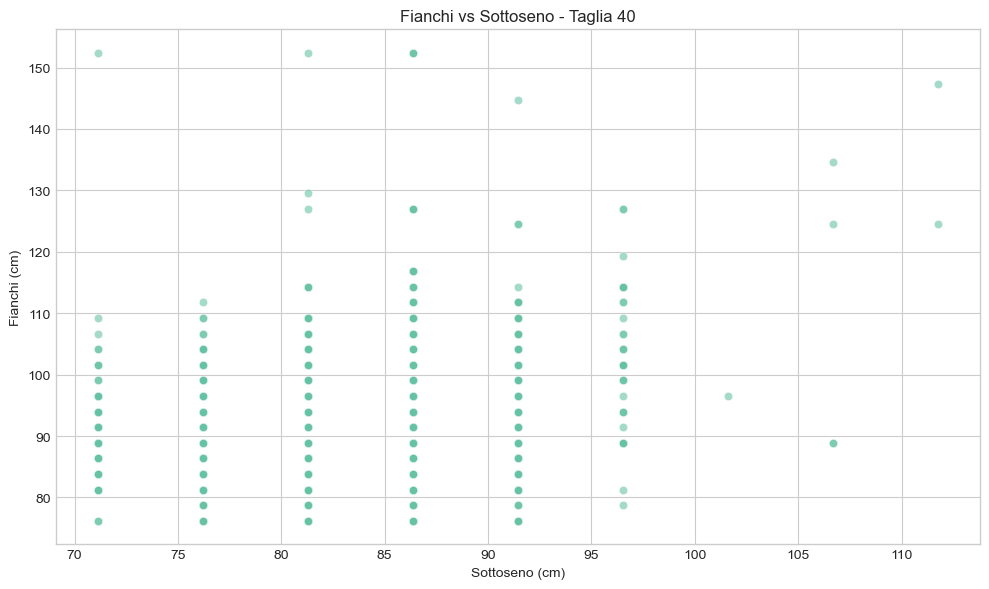

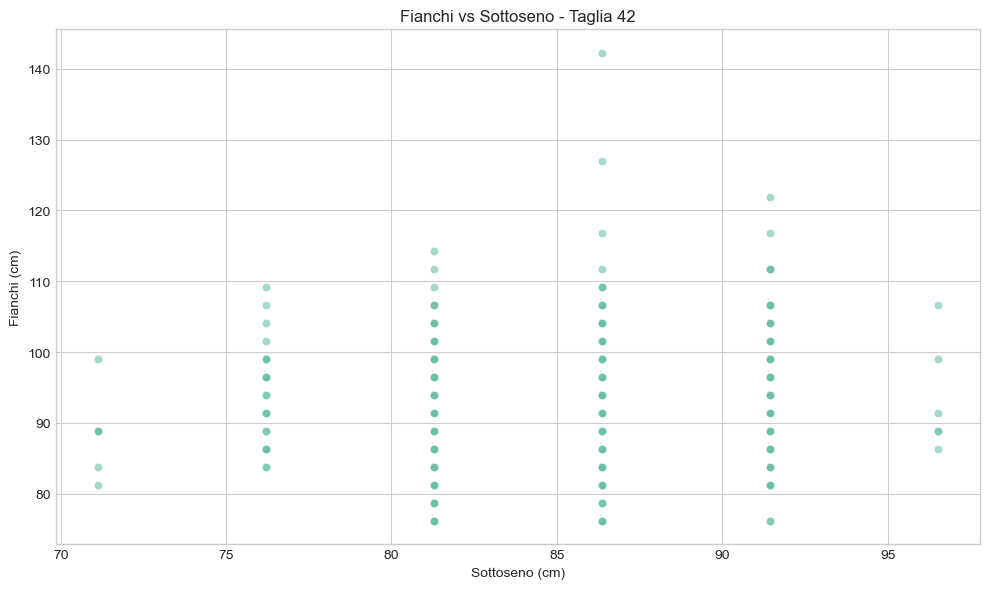

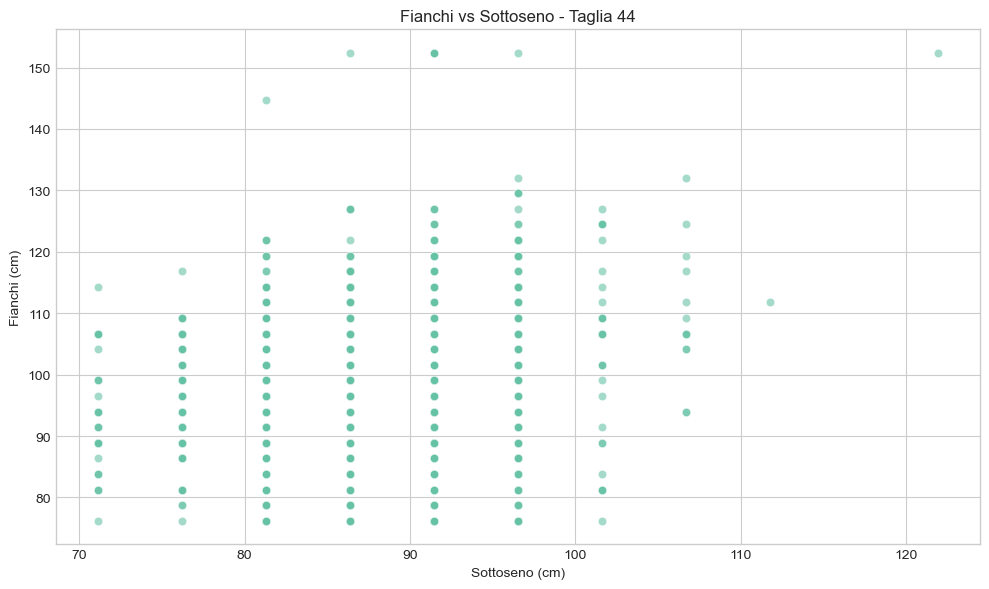

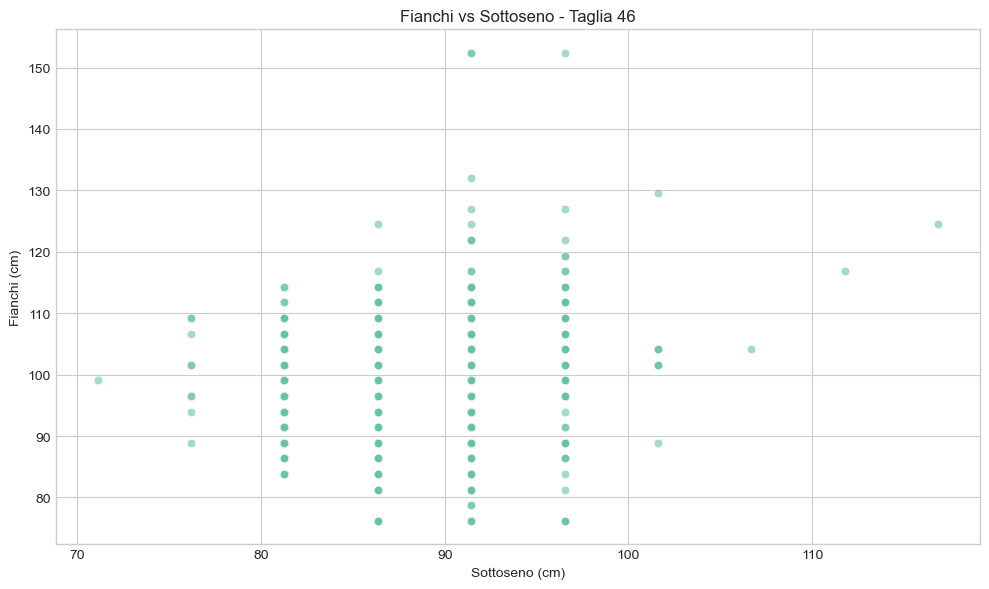

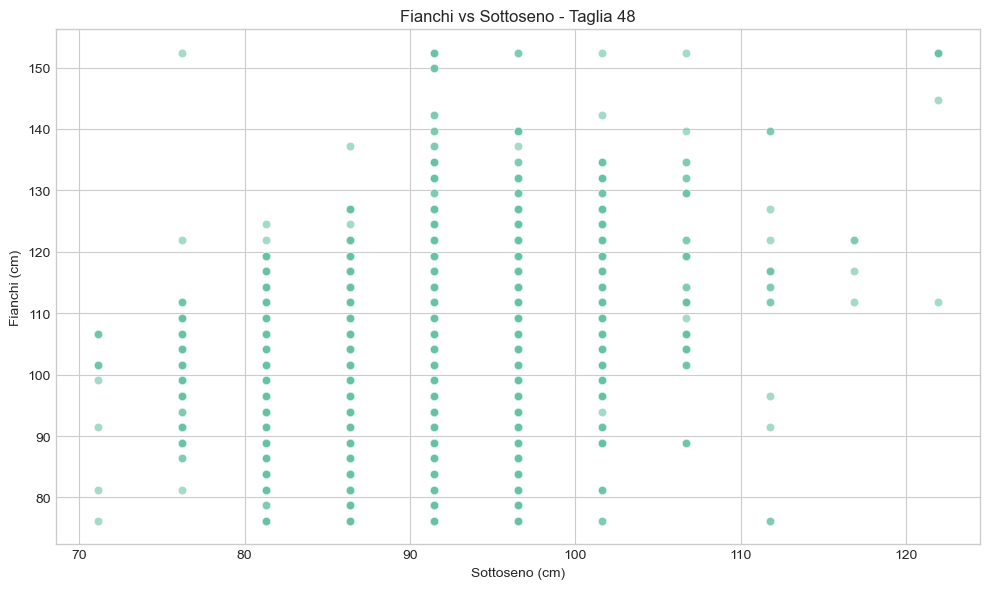

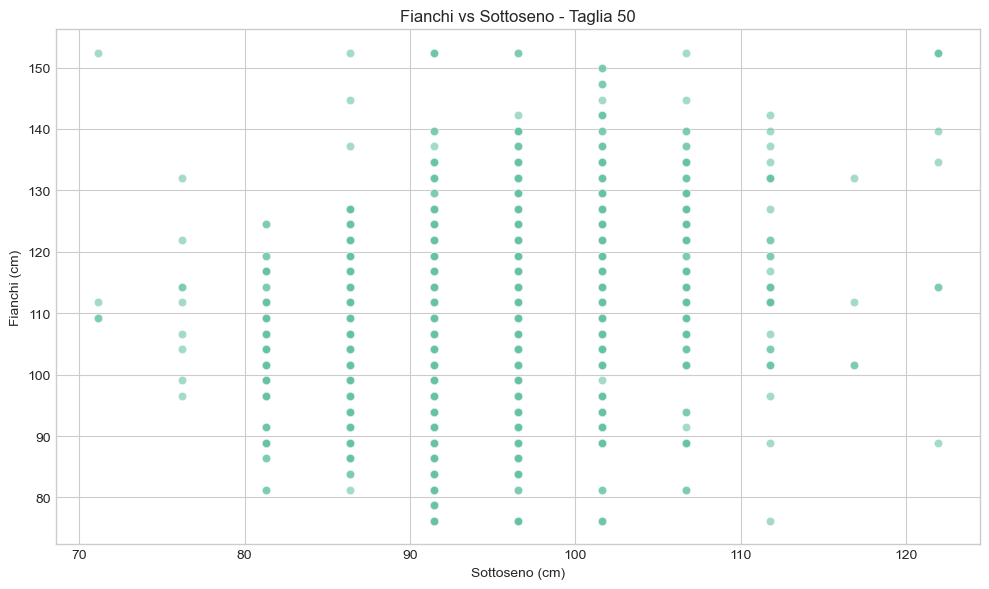

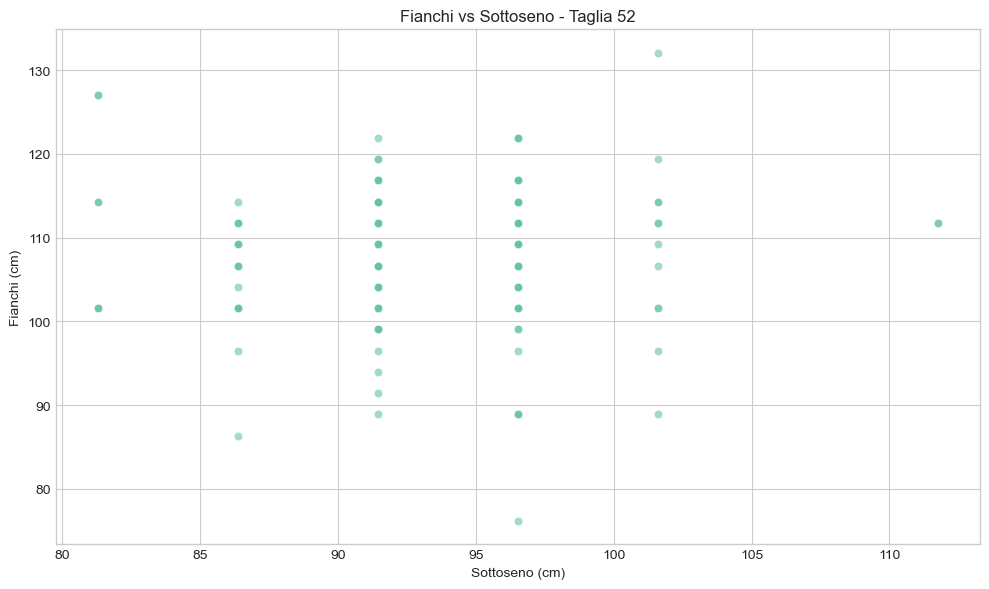

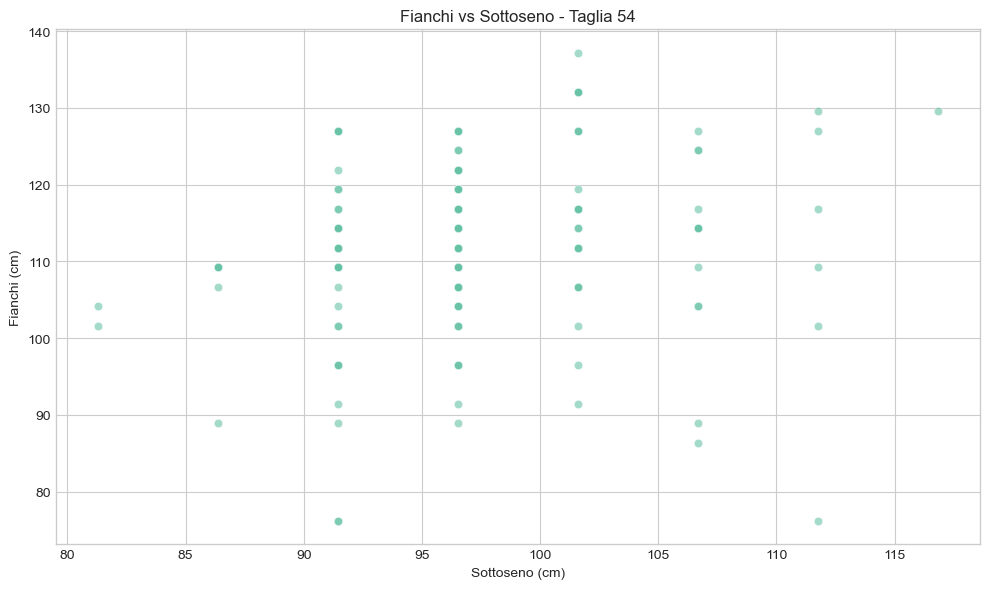

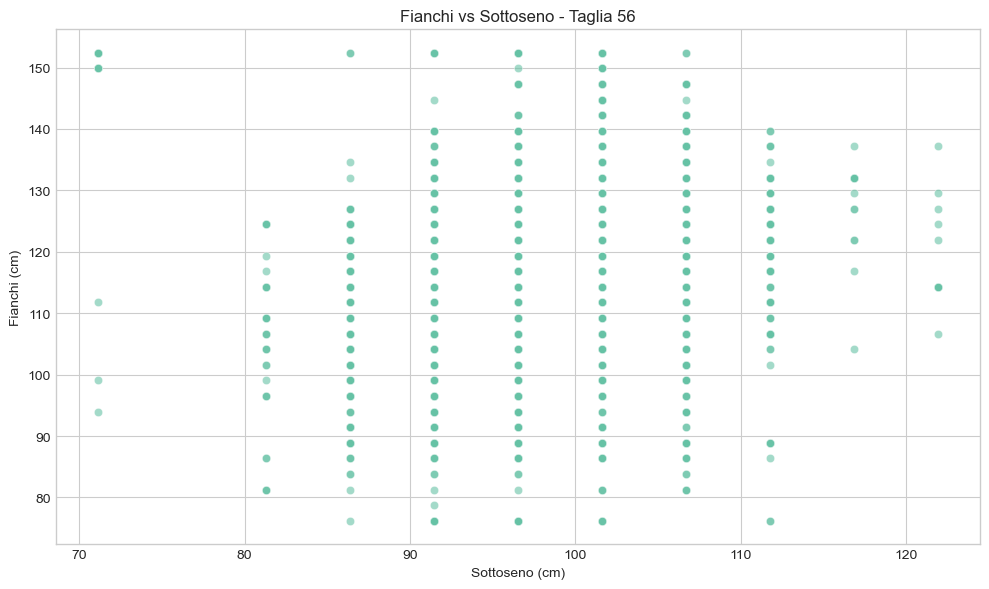

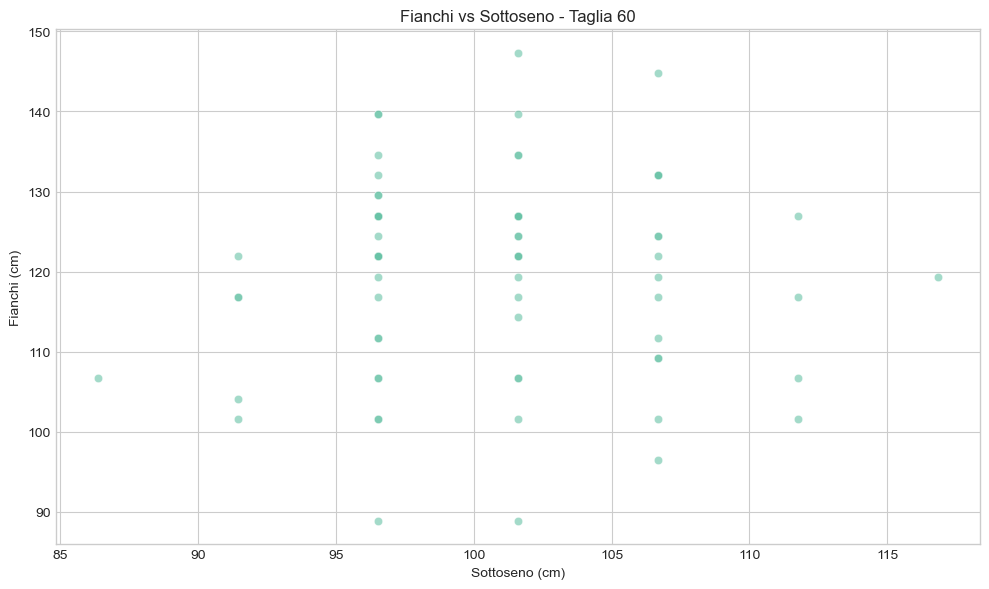

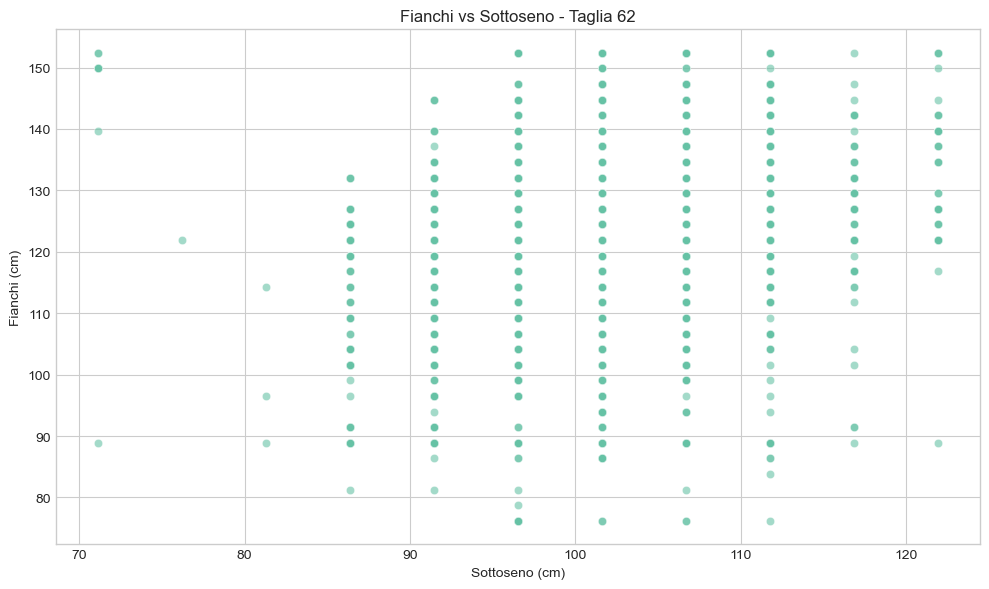

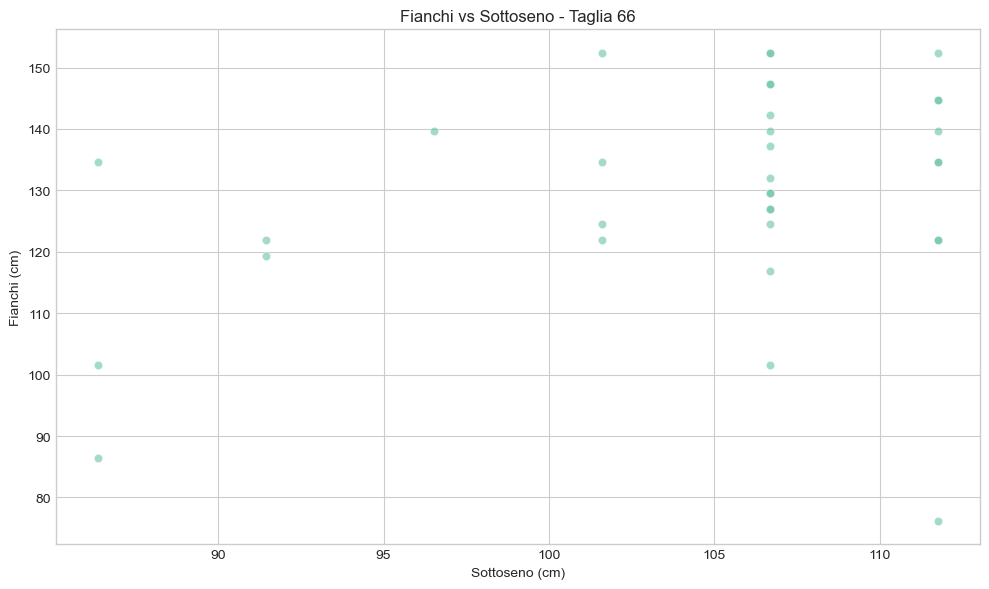

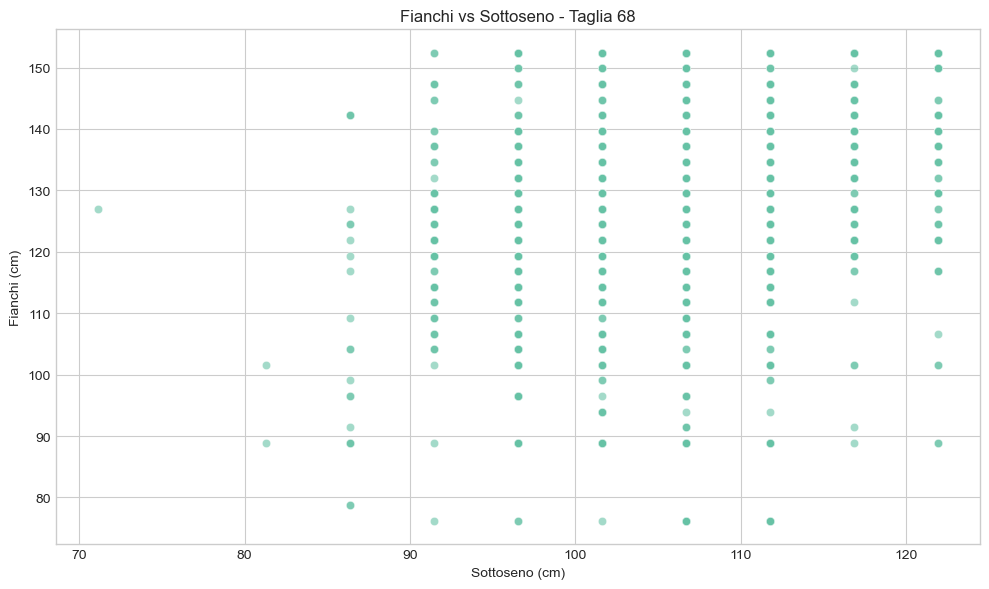

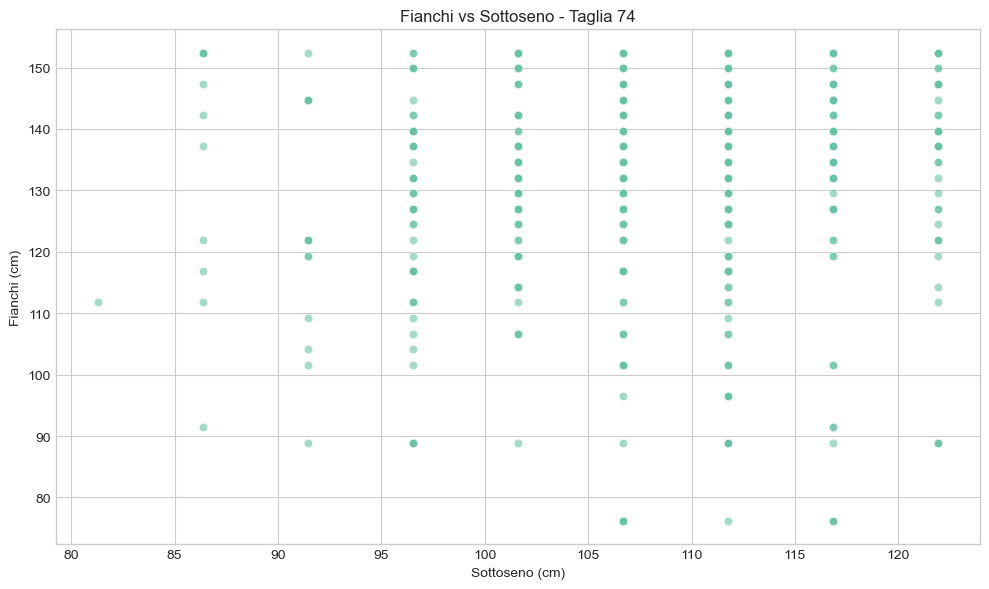

In [315]:
"""
Crea un grafico a dispersione delle misure dei fianchi ('hips_cm') 
rispetto alla circonferenza sottoseno ('bra_size_cm') per ciascuna taglia italiana.

Output:
- Mostra un grafico per ogni taglia (size_it) presente nel DataFrame
"""
taglie = sorted(df_clustering['size_it'].dropna().unique())

for taglia in taglie:
    df_filtered = df[
        (df['size_it'] == taglia) &
        df['hips_cm'].notna() &
        df['bra_size_cm'].notna()
    ]

    if df_filtered.empty:
        print(f"Nessun dato per la taglia {taglia}")
        continue

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x='bra_size_cm', y='hips_cm', alpha=0.6)
    plt.title(f"Fianchi vs Sottoseno - Taglia {taglia}")
    plt.xlabel("Sottoseno (cm)")
    plt.ylabel("Fianchi (cm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Si nota chiaramente come il range delle misure per la maggiorparte delle taglie è estremamente ampio, c'è molta dispersione ed è difficile incasellare una misura specifica per ogni taglia.

Infine, è interssante vedere la distribuzione delle misure dei piedi più riportate:

 Distribuzione taglie italiane:
shoe size
NaN     54623
8.5      3962
8.0      3820
7.5      3691
9.0      3582
7.0      3177
10.0     2409
6.5      1821
9.5      1795
6.0      1331
11.0      856
5.5       587
10.5      354
5.0       314
11.5       90
38.0        1
Name: count, dtype: int64
Valori mancanti: 54623


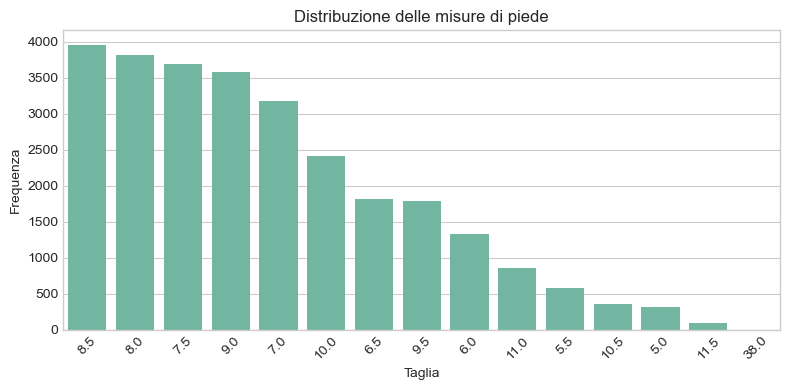

In [316]:
"""
Analisi della variabile di taglia di piede

Questo blocco esamina la variabile 'shoe size': 
1. Calcola la distribuzione dei valori unici.
2. Mostra un conteggio dei valori con un grafico a barre ordinato.
3. Include informazioni su valori mancanti.

Note:
- La palette Seaborn è scelta per ottimizzare la leggibilità.

"""
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')  

print(" Distribuzione taglie italiane:")
print(df['shoe size'].value_counts(dropna=False))
print("Valori mancanti:", df['shoe size'].isnull().sum())
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='shoe size', order=df['shoe size'].value_counts().index)
plt.title("Distribuzione delle misure di piede")
plt.xlabel("Taglia")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CONSIDERAZIONI FINALI PER ALLESTIMENTO E-COMMERCE ABBIGLIAMENTO SECOND HAND

Innanzitutto si capisce quanto sia importante avere anche articoli che non sono stati mai indossati, sia che vengano direttamente dalla fabbrica, sia che hanno semplicemente il cartellino ancora attaccato e sono stati reperiti da privati.
Abiti interi, parti di sopra (magliette, maglie, camicie) e parti di sotto (gonne, pantaloni) hanno volumi di vendita molto importanti e simili tra loro. è importante avere un ampio campionario di tutti di questi indumenti. 

I capispalla hanno volumi di vendita più ridotti, ma può essere utile puntare ache su questa tipologia dato l'apprezzamento generale che gli utenti hanno su questa categoria, che rappresenta più di tutte il vintage e il second-hand. 
Non contrerei invece la mia attenzione sugli abiti da matrimonio, che hanno volumi di vendita davvero minimi. Non è presente la categoria scarpe in questo commercio ma ritengo che possa essere interessante avere un riforimento di scarpe tipicamente femminili come décolleté o stivali, che rientrano a pieno nello spirito del second hand, in particolar modo dal 37 al 41.

In conclusione è fondamentale avere un campionario ampio e che possa accontentare richieste le diversità fisiche del bacino di utenza femminile; ma vi sono delle taglie che vengono scelte da un numero nettamente superiore di utenti anche con fisici nettamente diversi tra loro: 44, 40 e 48. Avere rifornimento molto ampio di queste taglie appare fondamentale in da questo studio. Per quanto riguarda 'Bottoms' anche la taglia 50 è molto importante. Peculiare il fatto che le taglie intermedie tra queste, 42 e 46, abbiano volumi di vedita davvero bassi, forse dovuti alla difficile reperibilità, cosa che ha portato le utenti a virare su 44 e 48. Ma questa è solo un'ipotesi.

Quello che è emerso dalle recensioni scritte è l'attenzione dell'utente verso i dettagli dell'indumento acquistato. valutare per bene la qualità dei prodotti di cui ci si vuole rifornire è importante, così come specificare molto anche nell'annuncio.